# Final Project Submission

- Student Name: Deztany Jackson
- Student Pace: Self Pace
- Scheduled Project Review: April 7, 2023
- Instructor Name: Morgan Jones
- Blog Links: dmvinedata.com



## Binary Classification for Animal Adoption Prediction

![WallstreetJournal,CatandDog](images/cat_dog.jpeg)

## Business Understanding

[Kaggle PetFinder, 2018](https://kaggle.com/competitions/petfinder-adoption-prediction)<br>
[Malaysian Strays, 2021](https://www.thesundaily.my/local/need-to-address-issue-of-strays-population-EE85305030)<br>
[Poltical Animals,2021](https://www.scmp.com/week-asia/society/article/2106109/how-malaysias-dogs-became-political-animals)<br>
[VetFuturist,Unknown](https://vetfuturist.com/stray-animals-malaysia-reality-i-saw-travelling-there-past-months)

**The current goal in  is to build models that support predicting if an animal is adoptable or not.**<br>

Malaysia's Ministry of Tourism is partnering with the local pet adoption agencies to minimize stray animals in the country. They spend about RM10.3 ($2.3Million) managing pounds and euthanization cost.<br>

Pet Finder supplied data for about 19,000 adoption entries for dogs and cats in each of Malaysias states. The ministry cares about correctly predicting adoptable animals well. The adoptable animals will be prioritized in a shelter or pound. It is not determined what will happen with ther other animals. The Ministry of Tourism has another phase to find the best solutions that utilize the animals and minimizes Euthanasia.

**Ministry of Tourism (Main Stakeholder)**
- Want to understand which animals are the most adoptable. (Phase 1:Current Model)<br>
    - Because some facilities and labor is already available more cost efficient
    - Knowing adoptable animals will help with facilities, labor and equipment planning.
    - Supports reducing stray population quickly.
    - Help focus rescuers in  certain areas.
- Find solutions for the other animals while cutting management, labor and euthanation cost. (Phase 2: TBD)<br>
- Their goal is to improve the safety, attraction of area and soothe political upheival about all the strays.<br>

**Adoption Agency (Secondary Stakeholder)**
- Minimize Euthenasia and maximize holding animals as long as possible

**Assumptions:**<br>
- Most cats are more tolerable because of a predominately Islamic and Hindu religion.<br>

**Questions:** <br>
- What model features are most important?<br>

**Metrics:**<br>
- Primarily want Precision to maximize TP and minimize FP of adoptees.<br>
- Secondary we want Recall and F1 to minimize FN.<br>

## Import Libraries

In [153]:
#API to get kaggle data
#import kaggle 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

#Sklearn libraries for most classifier and metrics
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,recall_score,accuracy_score, auc
from sklearn.metrics import precision_score, f1_score,RocCurveDisplay, roc_auc_score
from sklearn.metrics import precision_recall_curve,average_precision_score, make_scorer
from sklearn.metrics import PrecisionRecallDisplay, PredictionErrorDisplay
from sklearn.metrics import confusion_matrix as cm
from sklearn import tree
from sklearn.utils.class_weight import compute_class_weight

# For Neural Net
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.metrics import Accuracy,Precision,Recall
from tensorflow.keras import models, layers, optimizers, activations
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
import keras
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

import time 

#Data Imbalance
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

## Data Download (w/ API - Optional)


**API Download Instructions** <br>
[Kaggle API Instructions](https://www.kaggle.com/docs/api)<br>
- **Preconditions**
    - pip install kaggle
    - import kaggle
    - create ".kaggle" folder at root directory
    - have .kaggle.json in .kaggle folder
    - Have an verified account on Kaggle and join the competition
    - Under Account settings Create New API Token
- **Run command from Kaggle Competitions Petfinder Adoption Kaggle Site**
    - "!kaggle competitions download -c petfinder-adoption-prediction "
- Unzip file (Manually or "unzip" utility)
- Make a "data" directory in current directory
- Copy and move the following files to "data" directory
    a.	train folder <br>
    b.	test folder<br>
    c.	PetFinder-ColorLabels.csv<br>
    d.	BreedLabels.csv<br>
    e.	ColorLabels.csv<br>
    f.	StateLabels.csv<br>


## Data Load

Assumes data was downloaded, unzipped to the data folder in current directory.

In [2]:
# Import training csv file
org_train_df = pd.read_csv("data/train/train.csv")
test_df = pd.read_csv("data/test/test.csv")
state_df = pd.read_csv("data/StateLabels.csv")
color_df = pd.read_csv("data/ColorLabels.csv")
breed_df = pd.read_csv("data/BreedLabels.csv")

# Data Understanding

[Data Description,Kamal Khumar, 2021 ](https://www.kaggle.com/code/kamalkhumar/loan-status-prediction)

### Dataset Description

<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:14px">Feature </th>
<th style="text-align:center; font-weight: bold; font-size:14px">Description</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Data Type</th> 
</tr>
</thead>
<tbody>
<td><b>Type</b></td>
<td>Type of Animal<br> (1=Dog,2=Cat)</td>
<td>Nominal Number</td>    
<tr> 
<td><b>Name</b></td>
<td>Name of Pet<br> (Empty if not named)</td>
<td>String</td>
</tr>
<tr> 
<td><b>Age</b></td>
<td>Age of pet when listed<br> (Months)</td>
<td>Cardinal Number</td>
</tr>
<tr>
<td><b>Breed</b></td>
<td>Breed1 (Primary breed),Breed2 (Secondary breed, if mixed) <br> (Ref Breedlabels dict)</td>
<td>Nominal Number:String </td>
</tr>
<tr>
<td><b>Gender</b></td>
<td>Gender of pet <br> 1=Male, 2=Female, 3=Mixed, if profile represents group of pets)</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Color</b></td>
<td>Colors of pets<br>Ref Colorlabels dict</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Maturity Size</b></td>
<td>Number of Rooms <br>(1=Sm, 2=Med,3=Lg,4=XLg,0=Not Spec)</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Fur Length</b></td>
<td>Fur Length<br>(1=Shrt, 2=Med,3=Lg,4=Lng,0=Not Spec) </td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Vaccinated</b></td>
<td>Pet has been vaccinated<br>(1=Yes,2=No,3=Not Sure)</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Dewormed</b></td>
<td>Pet has been dewormed<br>(1=Yes,2=No,3=Not Sure)</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Sterilized</b></td>
<td>Pet has been spayed/neutered<br>(1=Yes,2=No,3=Not Sure)</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Health</b></td>
<td>Health Condition<br>(1=Healthy,2=Minor Inj,3=Serious Inj,0=Not Spec)</td>
<td>Nominal</td>
</tr>
<tr>
<td><b>Quantity</b></td>
<td>Number of pets represented in profile<br></td>
<td>Cardinal Number</td>
</tr>
<tr>
<td><b>Fee</b></td>
<td>Adoption fee<br> (0=Free)</td>
<td>Cardinal Number</td>
</tr>
<tr>
<td><b>state</b></td>
<td>State location in Malaysia <br>(Ref to StateLabels dict)</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>RescuerID</b></td>
<td>Unique hash ID of rescuer <br></td>
<td>String</td>
</tr>
<tr>
<td><b>VideoAmt</b></td>
<td>Total uploaded videos for pet <br></td>
<td>Cardinal Number</td>
</tr>
<tr>
<td><b>PhotoAmt</b></td>
<td>Total uploaded videos for pet <br></td>
<td>Cardinal Number</td>
</tr>
<tr>
<td><b>Description</b></td>
<td>Profile write-up <br>(Primarily Eng, also Malay or Chinese)</td>
<td>String Object</td>  
</tr>
<tr>    
<td><b>AdoptionSpreed</b></td>
<td>Categorical speed of adoption. Lower is faster.<br>(Adopted[0,1,2,3] = 1, Not Adopted[4]=0)</td>
<td>Nominal Number</td>  
</tr>
<tr>    
<td><b>PetID</b></td>
<td>Unique hash ID of pet profile<br></td>
<td>String Object</td> 
</tbody>
</table>

## Exploring Dataset

[EDA Cheatsheet Datasans,2022](https://datasans.medium.com/exploratory-data-analysis-cheatsheet-everything-you-might-need-36230538484d)

The dataset from Kaggle had several files that will be used in the modeling effort.<br>
- Training set (14993 entries)
- Test set (3972 entries) 
- Breed labels (307 entries)
- Color labels ( 7 entries)
- State labels (15 entries)

In [3]:
#Copy original dataset fo
train_df = org_train_df.copy()

In [4]:
#Viewing the dataset
train_df.head(5)

Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize  ...  Health  Quantity  Fee  State  \
0             1  ...       1         1  100  41326   
1             2  ...       1         1    0  41401   
2             2  ...       1         1    0  41326   
3             2  ...       1         1  150  41401   
4             2  ...       1         1    0  41326   

                          RescuerID  VideoAmt  \
0  8480853f516546f6cf33aa88cd76c379         0   
1  3082c7125d8fb66f7dd4bff4192c8b14         0   
2  fa90fa5b1ee11c86938398b60abc32cb         0   
3  9238e4f44c71a75282e62f7136c6b240         0   
4  95481e953f8aed9ec3d16fc4509537e8         0   

                                         Description      PetID PhotoAmt  \
0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3      1.0   
1  I just found it alone yesterday near my apartm...  6296e909a      2.0   
2  Their pregnant mother was dumped by her irresp...  3422e4906      7.0   
3  Good guard dog, very alert, active, obedience ...  5842f1ff5      8.0   
4  This handsome yet cute boy is up for adoption....  850a43f90      3.0   

   AdoptionSpeed  
0              2  
1              0  
2              3  
3              2  
4              2  

[5 rows x 24 columns]

In [5]:
#Notice the objects, nulls and amount
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

There is a mix of ints, floats, and objects. There are only missing values for Names and Descriptions.

In [6]:
#Review the training statistics and patterns
train_df.describe()

Type           Age        Breed1        Breed2        Gender  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       1.457614     10.452078    265.272594     74.009738      1.776162   
std        0.498217     18.155790     60.056818    123.011575      0.681592   
min        1.000000      0.000000      0.000000      0.000000      1.000000   
25%        1.000000      2.000000    265.000000      0.000000      1.000000   
50%        1.000000      3.000000    266.000000      0.000000      2.000000   
75%        2.000000     12.000000    307.000000    179.000000      2.000000   
max        2.000000    255.000000    307.000000    307.000000      3.000000   

             Color1        Color2        Color3  MaturitySize     FurLength  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       2.234176      3.222837      1.882012      1.862002      1.467485   
std        1.745225      2.742562      2.984086      0.547959      0.599070   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      2.000000      1.000000   
50%        2.000000      2.000000      0.000000      2.000000      1.000000   
75%        3.000000      6.000000      5.000000      2.000000      2.000000   
max        7.000000      7.000000      7.000000      4.000000      3.000000   

         Vaccinated      Dewormed    Sterilized        Health      Quantity  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       1.731208      1.558727      1.914227      1.036617      1.576069   
std        0.667649      0.695817      0.566172      0.199535      1.472477   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        1.000000      1.000000      2.000000      1.000000      1.000000   
50%        2.000000      1.000000      2.000000      1.000000      1.000000   
75%        2.000000      2.000000      2.000000      1.000000      1.000000   
max        3.000000      3.000000      3.000000      3.000000     20.000000   

                Fee         State      VideoAmt      PhotoAmt  AdoptionSpeed  
count  14993.000000  14993.000000  14993.000000  14993.000000   14993.000000  
mean      21.259988  41346.028347      0.056760      3.889215       2.516441  
std       78.414548     32.444153      0.346185      3.487810       1.177265  
min        0.000000  41324.000000      0.000000      0.000000       0.000000  
25%        0.000000  41326.000000      0.000000      2.000000       2.000000  
50%        0.000000  41326.000000      0.000000      3.000000       2.000000  
75%        0.000000  41401.000000      0.000000      5.000000       4.000000  
max     3000.000000  41415.000000      8.000000     30.000000       4.000000

- Most of animals are puppies or kittens<br>
- There a few outliers for expensive prices, but most are under 30, most are free<br>
- Substantial amount with multiple animals<br>
- Small percentage of animals come with video<br>
- Most animals have an associated picture or multiple<br>
- It seems most animals are not adopted<br>

In [7]:
#Understanding of colors
color_df

ColorID ColorName
0        1     Black
1        2     Brown
2        3    Golden
3        4    Yellow
4        5     Cream
5        6      Gray
6        7     White

The color account for primary and secondary.

In [8]:
#Breed labels
breed_df.head(-1)

BreedID  Type         BreedName
0          1     1     Affenpinscher
1          2     1      Afghan Hound
2          3     1  Airedale Terrier
3          4     1            Akbash
4          5     1             Akita
..       ...   ...               ...
301      301     2         Tonkinese
302      302     2            Torbie
303      303     2     Tortoiseshell
304      304     2    Turkish Angora
305      305     2       Turkish Van

[306 rows x 3 columns]

In [9]:
# Cat Breeds
(breed_df["Type"] ==2).sum()

66

Most (241) of the breeds are for Type 1 (Dog). 

The breeds account for primary and secondary.

In [10]:
#State labels
state_df

StateID        StateName
0     41336            Johor
1     41325            Kedah
2     41367         Kelantan
3     41401     Kuala Lumpur
4     41415           Labuan
5     41324           Melaka
6     41332  Negeri Sembilan
7     41335           Pahang
8     41330            Perak
9     41380           Perlis
10    41327     Pulau Pinang
11    41345            Sabah
12    41342          Sarawak
13    41326         Selangor
14    41361       Terengganu

In [11]:
#Printing out Summary Value Counts for each column in datatrame
for a in train_df.columns:
    print("Value Count of:",a)
    print(train_df[a].value_counts())
    print("\n")

Value Count of: Type
1    8132
2    6861
Name: Type, dtype: int64


Value Count of: Name
Baby                      66
Lucky                     64
No Name                   54
Brownie                   54
Mimi                      52
                          ..
Maroo                      1
4 PUPPIES FOR ADOPTION     1
Trish                      1
Lab Mix Puppy 2            1
Fili                       1
Name: Name, Length: 9060, dtype: int64


Value Count of: Age
2      3503
1      2304
3      1966
4      1109
12      967
       ... 
69        1
74        1
81        1
44        1
100       1
Name: Age, Length: 106, dtype: int64


Value Count of: Breed1
307    5927
266    3634
265    1258
299     342
264     296
       ... 
176       1
214       1
125       1
123       1
81        1
Name: Breed1, Length: 176, dtype: int64


Value Count of: Breed2
0      10762
307     1727
266      599
265      321
299      138
       ...  
104        1
36         1
17         1
257        1
279       

There doesn't seem to be any "odd" value characters except for names.

In [12]:
#Checking for Duplicates
train_df.duplicated().sum()

0

In [13]:
#Checking for Null
train_df.isna().sum()

Type                0
Name             1257
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        12
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

Due to the goal of this model, name and description will most likely not be used in the predictive modeling. Therefore missing values are not an issue.

<b> Object Understanding <b>

In [14]:
#Rescuer ID
train_df["RescuerID"].duplicated().sum()
# Drop, want to focus on the puppy characteristics

9398

In [15]:
#RescuirID Quanitity
train_df.groupby(["RescuerID", "Type"])["Quantity"].count()

RescuerID                         Type
0007e457eb0583479bb888d54764911f  2       1
0008ef529da74e9701db7eaaa4d9115a  1       2
000a5830787b64da2d61b0bbceb7676d  2       4
000acff3d6148772579b3e623988131b  1       1
001b9870d4db6d26e2b52520dfbce249  2       1
                                         ..
ffc64c6fa1aff33c6aa6523a12225ec3  2       1
ffd648ffe5e574b912fcb92a8e0d5520  1       2
ffe9d666deaad333538c341dc3a39d9a  1       3
ffed83297757c1c19681024e7ee670aa  1       4
fff59afa6278380c938b2a5880ecae79  2       3
Name: Quantity, Length: 5891, dtype: int64

There are a lot of rescuers who have picked up a lot of animals. The rescuers are not a primary factor in this model. If later understanding where are more about the rescue process or metadata, this would be okay to keep.

In [16]:
#Check duplicate petIDs = 0
train_df["PetID"].duplicated().sum()

0

In [17]:
#Check duplicate names, if more than emply cells what is it = 5932, not with same ids though

train_df["Name"].duplicated().sum()

5932

In [18]:
#Looking into name examples
name_df = train_df.groupby("Name", axis=0)
name_df.sum()



Type  Age  Breed1  Breed2  Gender  \
Name                                                                      
!                                        1    1     307     307       3   
! Med Long Fur Kittens                   2    6     265     265       3   
!!! URGENT!!!                            2    3     265       0       2   
!!!!                                     1    2     307       0       2   
!!.                                      1    1     307     307       3   
...                                    ...  ...     ...     ...     ...   
ð¸ð·ð Take Me PLEASE ð         2   11     265       0       2   
ðððð                         2    2     266       0       1   
ððSolid Black Kittenðð       2    2     266       0       1   
ðð 3 Kittens & A Mama ðð     2    2     266       0       2   
ð°ð¾88ð¾ð°FattFatt               1   24     307     218       3   

                                      Color1  Color2  Color3  MaturitySize  \
Name                                                                         
!                                          1       2       3             1   
! Med Long Fur Kittens                     2       5       6             2   
!!! URGENT!!!                              2       4       7             2   
!!!!                                       2       3       0             1   
!!.                                        2       3       0             1   
...                                      ...     ...     ...           ...   
ð¸ð·ð Take Me PLEASE ð           1       2       4             2   
ðððð                           6       7       0             2   
ððSolid Black Kittenðð         1       0       0             2   
ðð 3 Kittens & A Mama ðð       4       5       6             2   
ð°ð¾88ð¾ð°FattFatt                 2       4       5             2   

                                      FurLength  Vaccinated  Dewormed  \
Name                                                                    
!                                             1           2         2   
! Med Long Fur Kittens                        2           1         1   
!!! URGENT!!!                                 2           2         2   
!!!!                                          1           2         2   
!!.                                           1           2         2   
...                                         ...         ...       ...   
ð¸ð·ð Take Me PLEASE ð              2           1         1   
ðððð                              1           2         2   
ððSolid Black Kittenðð            1           2         2   
ðð 3 Kittens & A Mama ðð          1           2         1   
ð°ð¾88ð¾ð°FattFatt                    1           2         2   

                                      Sterilized  Health  Quantity  Fee  \
Name                                                                      
!                                              2       1         5    0   
! Med Long Fur Kittens                         1       1         3  135   
!!! URGENT!!!                                  2       1         3    0   
!!!!                                           2       1         1  150   
!!.                                            2       1         3    0   
...                                          ...     ...       ...  ...   
ð¸ð·ð Take Me PLEASE ð               1       1         1    0   
ðððð                               2       1         1    0   
ððSolid Black Kittenðð             2       1         1    0   
ðð 3 Kittens & A Mama ðð           2       1         4    0   
ð°ð¾88ð¾ð°FattFatt                     1       1         4    8   

                                      State  VideoAmt  PhotoAmt  AdoptionSpeed  
Name                                    

<B> Quantity <B>

Checking different conditions to understand Quanity, Animal Type and Adoption Speed.

In [19]:
#Checking number of multiples
train_df[(train_df["Quantity"] > 1) & (train_df["Type"] == 1)& (train_df["AdoptionSpeed"] < 4)]


Type                                     Name  Age  Breed1  Breed2  \
7         1                  Siu Pak & Her 6 Puppies    0     307       0   
30        1                             Benji & Kimi    4     205     218   
48        1                             Cute Puppies    1     307       0   
50        1                              Blackie Duo    1     307     141   
64        1                           Little Yelpers    2     213     307   
...     ...                                      ...  ...     ...     ...   
14872     1                        Charlie's Angels~    1     307       0   
14879     1  Toby RIP Zoe Sammy Adpt Holly Hazel Mia    2     307       0   
14890     1                 Lovely Happy Puppies :))    2     307       0   
14908     1                       FIDO, LUNA & MOLEX    4     307       0   
14970     1                  KL Puppies For Adoption    2     307       0   

       Gender  Color1  Color2  Color3  MaturitySize  ...  Health  Quantity  \
7           2       1       2       7             2  ...       1         6   
30          3       2       7       0             1  ...       1         2   
48          3       1       2       0             2  ...       1         9   
50          2       1       0       0             2  ...       1         2   
64          3       1       3       7             2  ...       1         7   
...       ...     ...     ...     ...           ...  ...     ...       ...   
14872       2       1       7       0             2  ...       1         3   
14879       3       1       2       7             2  ...       1         5   
14890       3       1       4       0             2  ...       1         4   
14908       3       3       0       0             2  ...       1         3   
14970       2       2       5       0             2  ...       1         2   

       Fee  State                         RescuerID  VideoAmt  \
7        0  41326  1fba5f6e5480946254590d48f9c5198d         0   
30       0  41326  aa66486163b6cbc25ea62a34b11c9b91         0   
48       0  41326  fa90fa5b1ee11c86938398b60abc32cb         0   
50       0  41326  8b6c5cd067ada5f54ca5ffc7f7b5d896         0   
64       0  41326  e62135526c27156b8479420aad166317         0   
...    ...    ...                               ...       ...   
14872    0  41326  e2018c94cee1a56ea2aff51f18fb8cd0         0   
14879    0  41327  cccb18b8f8b81862f9a1ebc65d651d22         0   
14890    0  41401  5e21416ee557e7470d1113dd98a7e3ae         0   
14908    0  41326  1f139bc7f77c28b5f2c41a9fc9ab9189         0   
14970    0  41401  aab827a9ea617772101d6a7610a46faa         0   

                                             Description      PetID PhotoAmt  \
7      Siu Pak just give birth on 13/6/10 to 6puppies...  97aa9eeac      9.0   
30     Benji and his sister Kimi are a handsome pair ...  1a76190c5      5.0   
48     We are cute and good girls and boys. We need a...  af1035c81      3.0   
50     2 adorable female black pups rescued from USJ ...  6fecc5cf7     13.0   
64     ~ PLEASE CLICK ON OUR PHOTOS FOR A CLEARER VIE...  b0dec8779     21.0   
...                                                  ...        ...      ...   
14872  Somebody abandoned these 3 female 1 month old ...  09bc86c05     20.0   
14879  All gorgeous, all unique, all homeless, please...  2f29e9d88      1.0   
14890  4 lovely puppies were born on the territory of...  97e47e7c0      7.0   
14908  WERE BORN TO VERY SMART STRAY MUMMIES, WHO ARE...  481cbcedb      2.0   
14970  One stray dog came to my house and gave birth ...  82ee2f3e9      3.0   

       AdoptionSpeed  
7                  3  
30                 3  
48                 3  
50                 3  
64                 3  
...              ...  
14872              1  
14879              3  
14890              1  
14908              3  
14970              3  

[964 rows x 24 columns]

In [20]:
train_df[(train_df["Quantity"] > 1) & (train_df["Type"] == 2)& (train_df["AdoptionSpeed"] < 4)]

Type                            Name  Age  Breed1  Breed2  Gender  \
13        2         2 Mths Old Cute Kitties    2     265       0       3   
33        2                             NaN    4     266       0       2   
41        2  Drax Aka Fatso, Quill & Rocket    1     266       0       3   
42        2                            Novy   24     292     285       2   
55        2                         Kitties    3     265       0       3   
...     ...                             ...  ...     ...     ...     ...   
14936     2                          Kitten    2     292       0       3   
14976     2                   Cici N Shelly   84     264     264       3   
14982     2            âªMami's Babies âª    2     266       0       2   
14988     2                             NaN    2     266       0       3   
14990     2                         Monkies    2     265     266       3   

       Color1  Color2  Color3  MaturitySize  ...  Health  Quantity  Fee  \
13          1       6       7             1  ...       1         7    0   
33          1       6       7             1  ...       1         2    0   
41          1       2       7             1  ...       1         3    0   
42          7       0       0             2  ...       2         6    0   
55          4       6       7             1  ...       1         2    0   
...       ...     ...     ...           ...  ...     ...       ...  ...   
14936       2       5       0             1  ...       1         4    0   
14976       1       7       0             2  ...       1         2   50   
14982       1       4       7             2  ...       1         3    0   
14988       1       0       0             2  ...       1         4    0   
14990       5       6       7             3  ...       1         5   30   

       State                         RescuerID  VideoAmt  \
13     41326  2c118b2a1d1b4cf1f735089c7c0a07c0         0   
33     41326  7d58438884ab468dce87c7e252bbd6e4         0   
41     41326  dc161f335e8afdc4b7db7a0d1006450a         0   
42     41326  813db17af7694027ab11db3245900c99         0   
55     41401  ccab255657ce17ccbde14b74e89353de         0   
...      ...                               ...       ...   
14936  41336  5232bdd1444960a257ccec9a41404320         0   
14976  41326  a9213c8947a57403d0ad1df5d3bee5ad         0   
14982  41336  d73b10f170720b7edc3c12fc93b1fc63         0   
14988  41326  61c84bd7bcb6fb31d2d480b1bcf9682e         0   
14990  41326  6f40a7acfad5cc0bb3e44591ea446c05         0   

                                             Description      PetID PhotoAmt  \
13     Hi Pet Lovers! This is my first posting and I ...  4a9793dfb      1.0   
33     Two gorgeous kittens have just lost their mumm...  9415bc79e      7.0   
41     3 kittens for adoption, DOB 7 Jun , litter tra...  8ee223a17      1.0   
42     she is tame siamese persian. she loves to be p...  9a38d4275      1.0   
55     Rescued these 2 brother & sister kitties below...  f6551137d     15.0   
...                                                  ...        ...      ...   
14936                               Kittens for adoption  edcaed3a4      4.0   
14976  hey there 2 ekor kucing yang sudah lama dibela...  98ae7d88d      3.0   
14982  Homeless souls awaiting for a good home..We do...  54b6c1d72     16.0   
14988  I have 4 kittens that need to be adopt urgentl...  dc0935a84      3.0   
14990  Mix breed, good temperament kittens. Love huma...  d981b6395      5.0   

       AdoptionSpeed  
13                 1  
33                 3  
41                 2  
42                 1  
55                 2  
...              ...  
14936              3  
14976              3  
14982              3  
14988              2  
14990              3  

[1347 rows x 24 columns]

In [21]:
pd.crosstab(train_df["Breed1"],train_df["Quantity"])

Quantity    1    2    3    4    5    6   7   8   9   10  11  12  13  14  15  \
Breed1                                                                        
0            4    0    1    0    0    0   0   0   0   0   0   0   0   0   0   
1            0    2    0    0    0    0   0   0   0   0   0   0   0   0   0   
3            0    0    0    1    0    0   0   0   0   0   0   0   0   0   0   
5            2    0    0    0    0    0   0   0   0   0   0   0   0   0   0   
7            1    0    0    0    0    0   0   0   0   0   0   0   0   0   0   
...        ...  ...  ...  ...  ...  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   
303         35    3    3    1    0    0   0   0   0   0   0   0   0   0   0   
304          5    1    0    0    1    0   0   0   0   0   0   0   0   0   0   
305          5    3    0    0    0    0   0   0   0   0   0   0   0   0   0   
306         45    5    3    2    1    0   0   0   0   0   0   0   0   0   0   
307       4630  483  227  187  140  105  52  39  29   8   7   4   1   1   1   

Quantity  16  17  18  20  
Breed1                    
0          0   0   0   0  
1          0   0   0   0  
3          0   0   0   0  
5          0   0   0   0  
7          0   0   0   0  
...       ..  ..  ..  ..  
303        0   0   0   0  
304        0   0   0   0  
305        0   0   0   0  
306        0   0   0   0  
307        2   3   0   8  

[176 rows x 19 columns]

In [22]:
# Count how many animals are from each state
np.round(pd.pivot_table(train_df, values = "Quantity", sort=True,
                       index = ["State","Type"],aggfunc=np.sum))



Quantity
State Type          
41324 1          133
      2           72
41325 1           68
      2           95
41326 1         7247
      2         6211
41327 1          937
      2          403
41330 1          529
      2          168
41332 1          392
      2          214
41335 1           65
      2           91
41336 1          462
      2          414
41342 1            9
      2           18
41345 1            7
      2           26
41361 1            3
      2           28
41367 1            3
      2           20
41401 1         2558
      2         3447
41415 1            3
      2            7

- 25 percent of the multiple groups have been adopted.<br>
- 3428 values greater than one<br>
- Two states account for the majority of entries
- **Assumption**: Will assume entries with more than one has a quanity are adopted at the same speed and the attribute descriptions apply to each animal. This is the best assumption for the prediciton and analysis.

## Data Visualizations

In [23]:
# Cite
#https://www.kaggle.com/code/yashvi/car-price-prediction-eda-rfe-with-random-forest
#Multiple https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic  
#Different Sns plots: https://towardsdatascience.com/14-data-visualization-plots-of-seaborn-14a7bdd16cd7
#https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

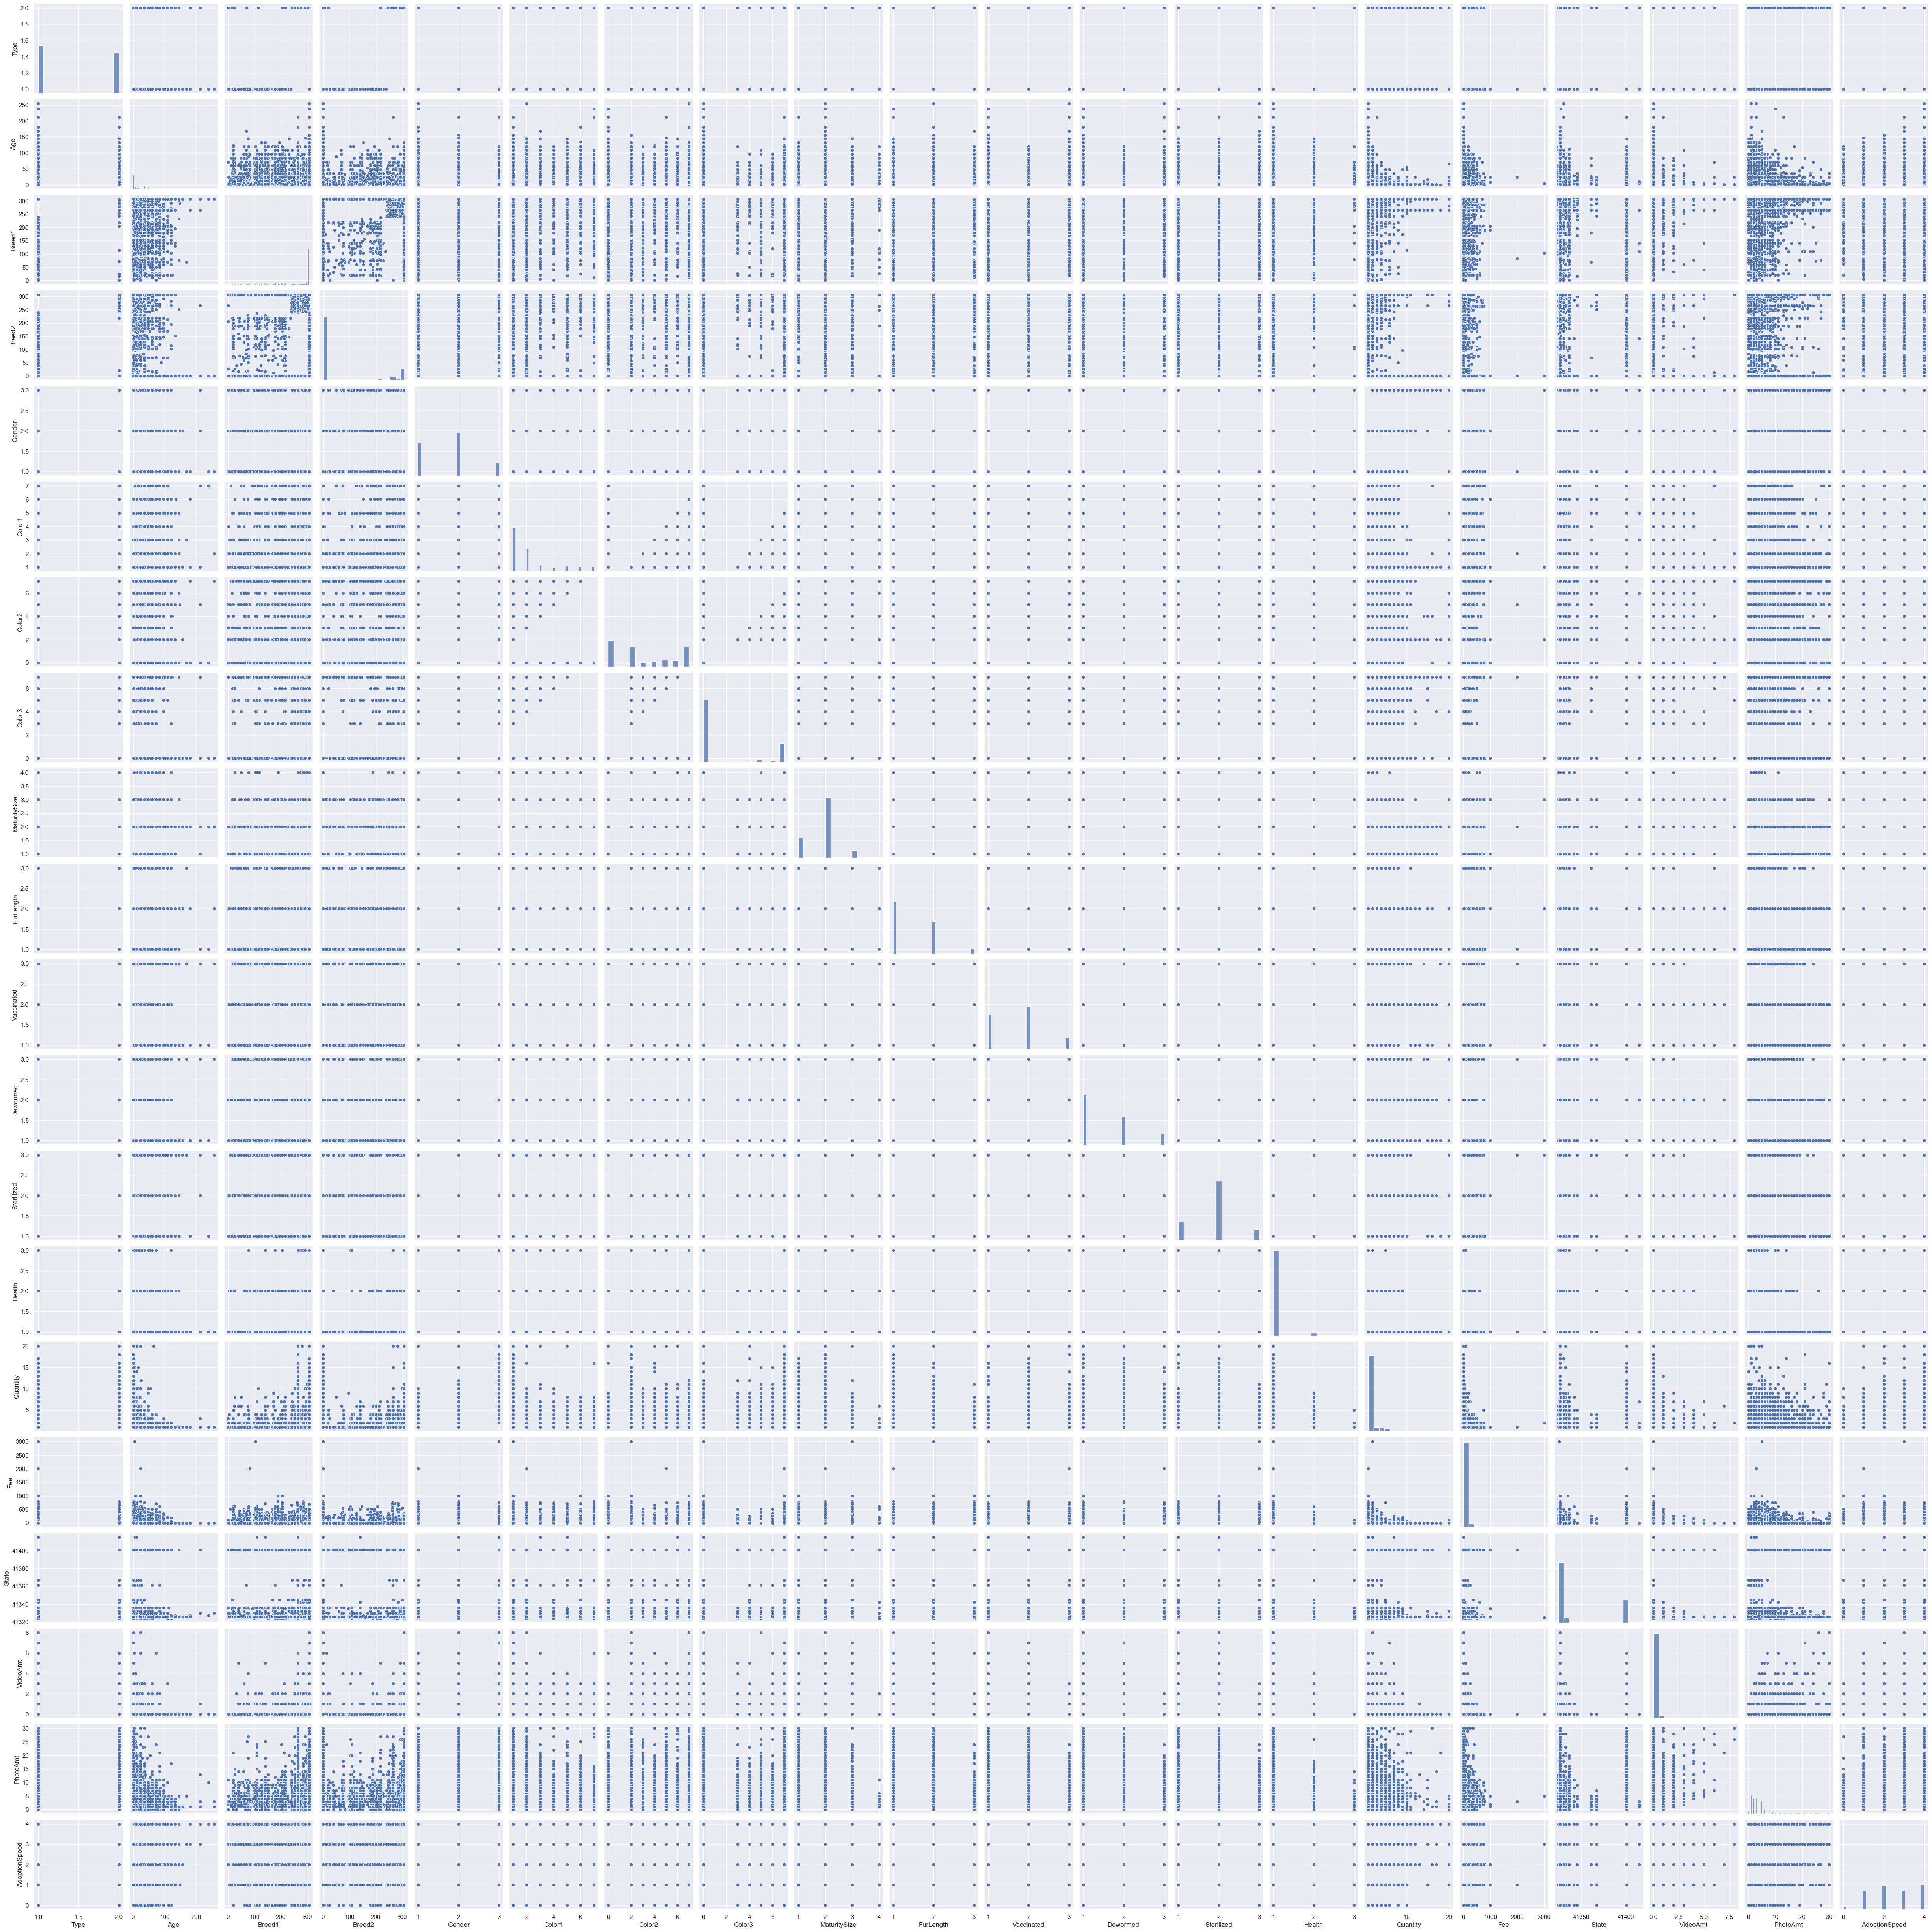

In [24]:
#Pair plot for quick view of the datasets distribution 
sns.set(rc={'figure.figsize':(20,20)})
sns.pairplot(train_df)

<b> Correlation <b>

In [25]:
#Print out correlation values in dataframe
corr = train_df.corr()
corr

Type       Age    Breed1    Breed2    Gender    Color1  \
Type           1.000000 -0.147162  0.057724 -0.043568  0.060843  0.097680   
Age           -0.147162  1.000000 -0.314346 -0.041010 -0.123423  0.090378   
Breed1         0.057724 -0.314346  1.000000 -0.157053  0.071321 -0.035510   
Breed2        -0.043568 -0.041010 -0.157053  1.000000  0.056907 -0.020324   
Gender         0.060843 -0.123423  0.071321  0.056907  1.000000 -0.115351   
Color1         0.097680  0.090378 -0.035510 -0.020324 -0.115351  1.000000   
Color2         0.246333 -0.039427 -0.007081  0.003015  0.026507 -0.113290   
Color3         0.201693 -0.053546 -0.000682  0.035679  0.259309 -0.282897   
MaturitySize  -0.171811  0.093673 -0.010507  0.049879 -0.091819 -0.029468   
FurLength      0.003036  0.153092 -0.108059  0.106220 -0.030404  0.066967   
Vaccinated     0.102907 -0.136061  0.046518  0.005638  0.078702 -0.017475   
Dewormed       0.025508 -0.053360  0.013216 -0.009817  0.091431 -0.019318   
Sterilized     0.006737 -0.189450  0.052698 -0.005989  0.040645 -0.037050   
Health        -0.006864  0.103215 -0.034893 -0.029285 -0.045177  0.024410   
Quantity       0.036423 -0.113076  0.090194  0.038125  0.494489 -0.116688   
Fee           -0.042134  0.089168 -0.189526  0.013508 -0.050491  0.054180   
State          0.124549  0.024523 -0.026832 -0.037993  0.002564  0.024012   
VideoAmt      -0.005967 -0.015969  0.020626  0.001569  0.016816 -0.006435   
PhotoAmt       0.049368 -0.084778  0.043395  0.045953  0.098435 -0.041323   
AdoptionSpeed -0.091240  0.100510  0.107834 -0.018642  0.057622 -0.044192   

                 Color2    Color3  MaturitySize  FurLength  Vaccinated  \
Type           0.246333  0.201693     -0.171811   0.003036    0.102907   
Age           -0.039427 -0.053546      0.093673   0.153092   -0.136061   
Breed1        -0.007081 -0.000682     -0.010507  -0.108059    0.046518   
Breed2         0.003015  0.035679      0.049879   0.106220    0.005638   
Gender         0.026507  0.259309     -0.091819  -0.030404    0.078702   
Color1        -0.113290 -0.282897     -0.029468   0.066967   -0.017475   
Color2         1.000000  0.088742     -0.065155  -0.008764    0.026193   
Color3         0.088742  1.000000     -0.051730   0.013581    0.054053   
MaturitySize  -0.065155 -0.051730      1.000000   0.095142   -0.087722   
FurLength     -0.008764  0.013581      0.095142   1.000000   -0.006010   
Vaccinated     0.026193  0.054053     -0.087722  -0.006010    1.000000   
Dewormed       0.005812  0.048617     -0.067352   0.016463    0.722596   
Sterilized     0.007370  0.038899     -0.066321   0.032092    0.471204   
Health        -0.004307 -0.024782     -0.012957   0.028096    0.078893   
Quantity       0.019876  0.272548     -0.042832  -0.038388    0.125287   
Fee           -0.017308 -0.019839      0.041144   0.159693   -0.121868   
State          0.026944  0.010554     -0.062584  -0.029317    0.032737   
VideoAmt       0.023983  0.019526      0.017032  -0.014740   -0.032685   
PhotoAmt       0.059113  0.103662      0.015593  -0.031557   -0.052719   
AdoptionSpeed -0.038579 -0.007014      0.045653  -0.091337   -0.059043   

               Dewormed  Sterilized    Health  Quantity       Fee     State  \
Type           0.025508    0.006737 -0.006864  0.036423 -0.042134  0.124549   
Age           -0.053360   -0.189450  0.103215 -0.113076  0.089168  0.024523   
Breed1         0.013216    0.052698 -0.034893  0.090194 -0.189526 -0.026832   
Breed2        -0.009817   -0.005989 -0.029285  0.038125  0.013508 -0.037993   
Gender         0.091431    0.040645 -0.045177  0.494489 -0.050491  0.002564   
Color1        -0.019318   -0.037050  0.024410 -0.116688  0.054180  0.024012   
Color2         0.005812    0.007370 -0.004307  0.019876 -0.017308  0.026944   
Color3         0.048617    0.038899 -0.024782  0.272548 -0.019839  0.010554   
MaturitySize  -0.067352   -0.066321 -0.012957 -0.042832  0.041144 -0.062584   
FurLength      0.016463    0.032092  0.028096 -0.038388 

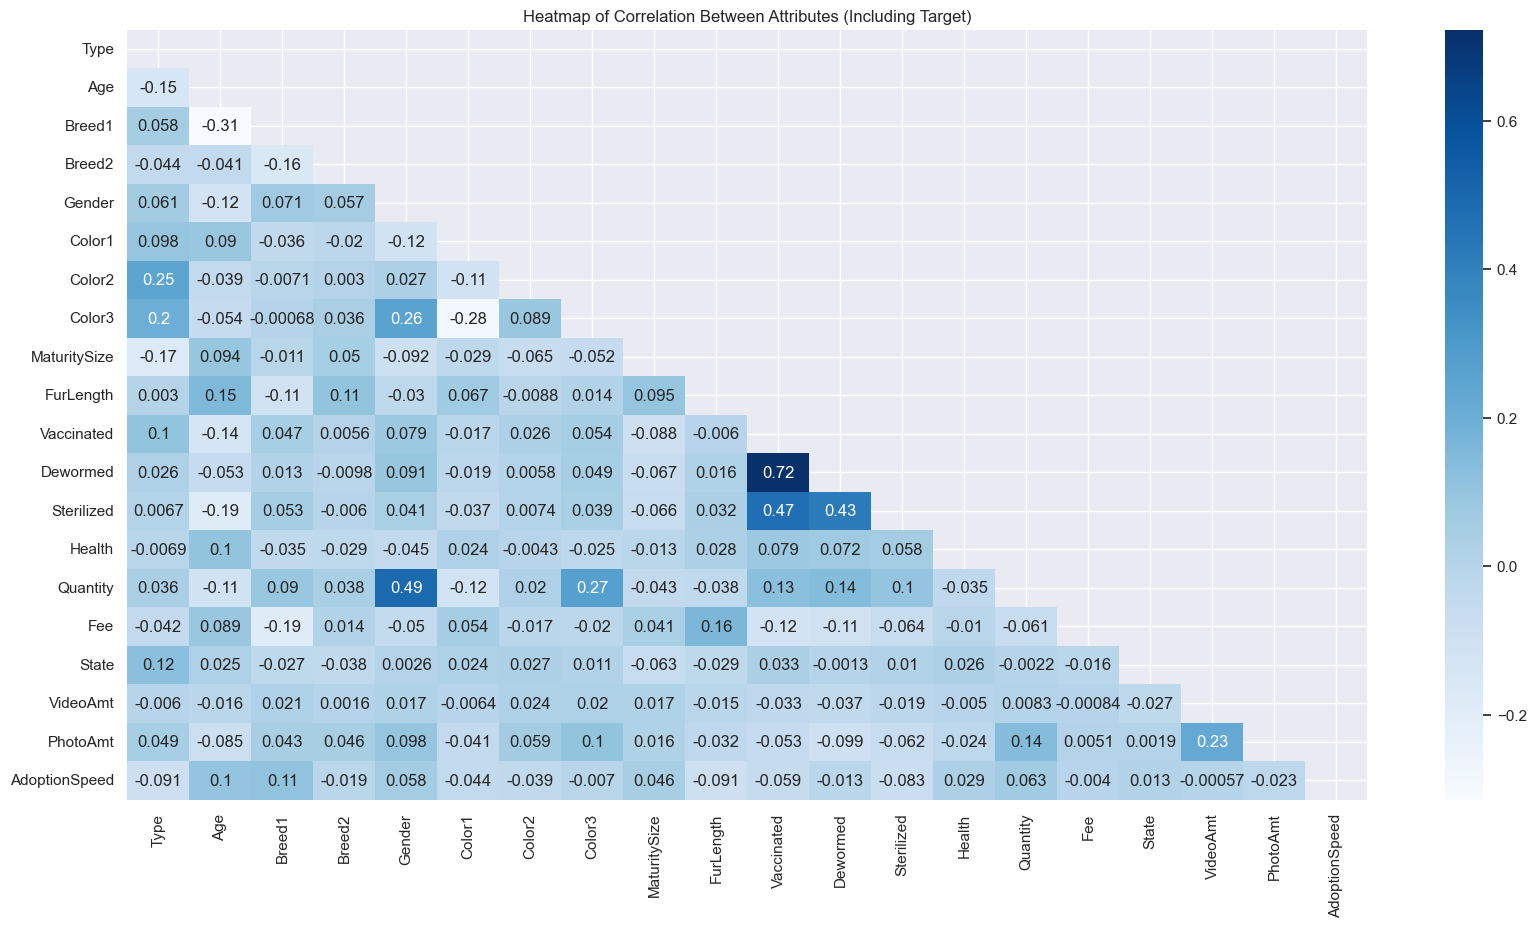

In [26]:
# Set up figure and axes
fig, ax = plt.subplots(figsize=(20,10),facecolor = "white")

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    #Color of the heatmap
    cmap="Blues",
    # Specifies that we want labels, not just colors
    annot=True,
    
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

- Age, Breed1, MaturitySize, Gender and Quanity have the highest correlation with adoptionspeed. Further understanding will be done on these features
- Expecting different correlations being more important like type, breed, color, pictures and health.
- Most of the other features have a weak correlation, which is suprising.
- Will drop Dewormed.

<b> Adoption Speeds <b>

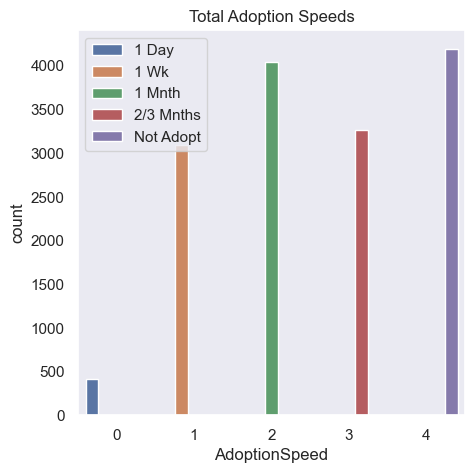

In [27]:
#Adoption Speeds
fig,ax = plt.subplots(figsize = (5,5))
a = sns.countplot(data = train_df, x ="AdoptionSpeed",  hue = "AdoptionSpeed", ax =ax)
ax.set_title("Total Adoption Speeds")
ax.legend(["1 Day","1 Wk", "1 Mnth", "2/3 Mnths", "Not Adopt"])
ax.grid(which ="both", axis = "y")

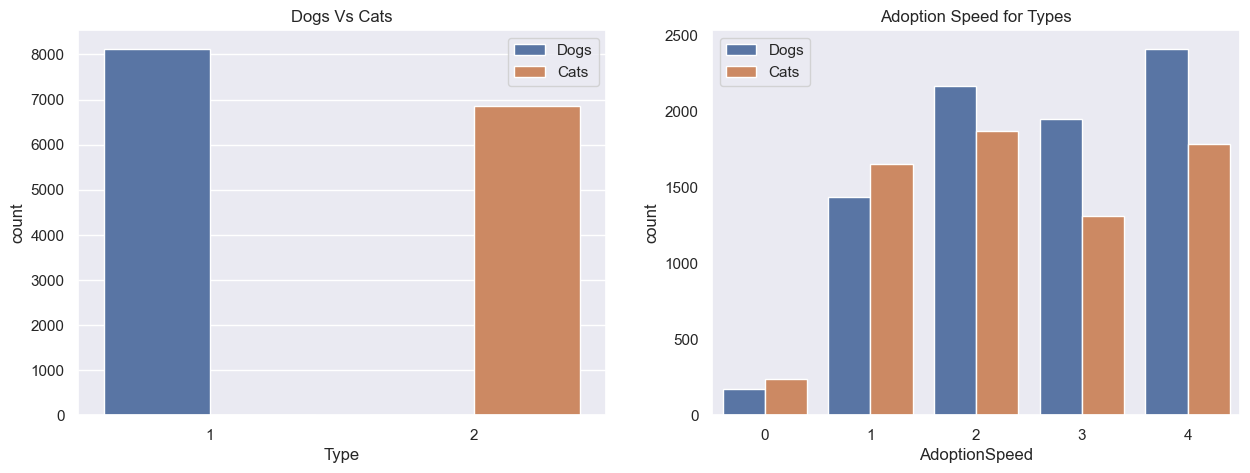

In [28]:
#Plot Cats versus dogs and adoption
fig,ax = plt.subplots(1,2,figsize =(15,5))

sns.countplot(x = "Type",hue = "Type", data = train_df, ax =ax[0])
ax[0].set_title("Dogs Vs Cats")
ax[0].legend(["Dogs","Cats"])

cplot = sns.countplot(x = "AdoptionSpeed",hue = "Type", data = train_df, ax =ax[1])
ax[1].set_title("Adoption Speed for Types")
ax[1].legend(["Dogs","Cats"])
ax[1].grid(which ="both", axis = "y")

There are slightly more dog entries than cats. Cats are adopted faster (within one month),Dogs are adopted around month 1-3 or not at all.

In [29]:
#Age and Adoptionspeed Crosstab
pd.crosstab(train_df["AdoptionSpeed"], train_df["Age"])

Age            0    1     2    3    4    5    6    7    8    9    ...  132  \
AdoptionSpeed                                                     ...        
0               10   54   115   44   24    7   20    7    4    5  ...    0   
1               50  643   865  408  211  100   80   43   36   24  ...    1   
2               44  754  1120  586  265  157  117   59   68   51  ...    1   
3               39  511   783  458  260  135  115   62   70   31  ...    3   
4               36  342   620  470  349  196  226  110  131   73  ...    3   

Age            135  144  147  156  168  180  212  238  255  
AdoptionSpeed                                               
0                0    0    0    0    0    0    0    0    0  
1                0    0    1    0    0    0    0    0    0  
2                0    1    0    1    0    0    0    0    0  
3                1    1    0    0    1    1    2    0    0  
4                0    2    0    0    0    1    1    1    2  

[5 rows x 106 columns]

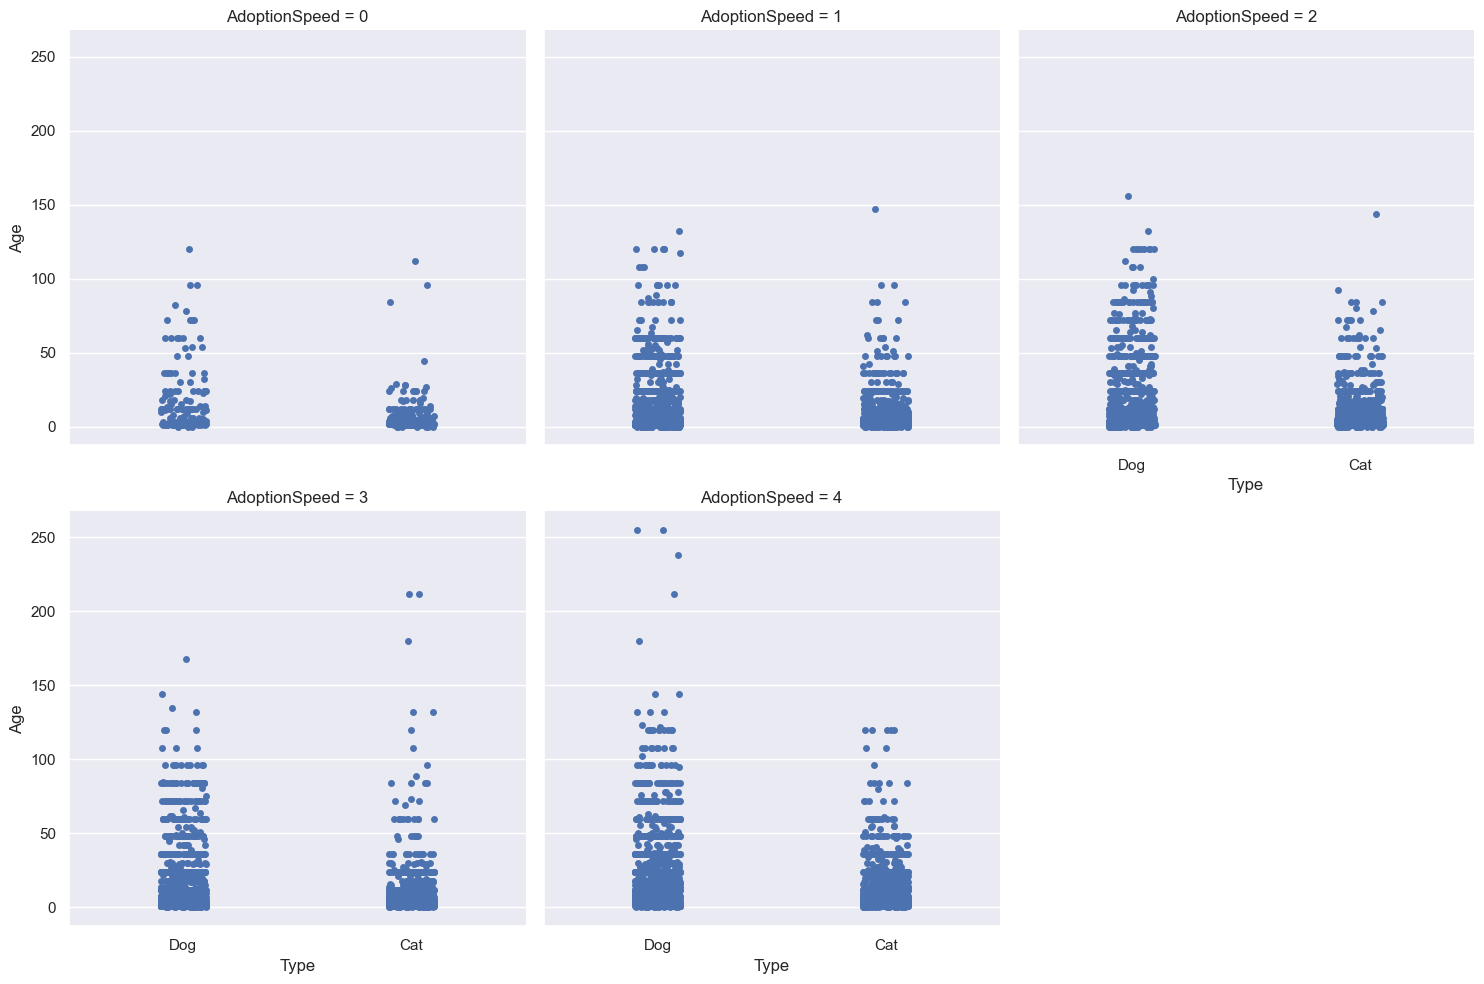

In [30]:
#Exploring Age and Gender
ag = sns.catplot(data = train_df, y = "Age", x = "Type", col_wrap = 3, col = "AdoptionSpeed")
ag.set_xticklabels(["Dog","Cat"])


Puppies and kittens are adopted at the various rates and not adopted. The old dogs aren't usually adopted.  

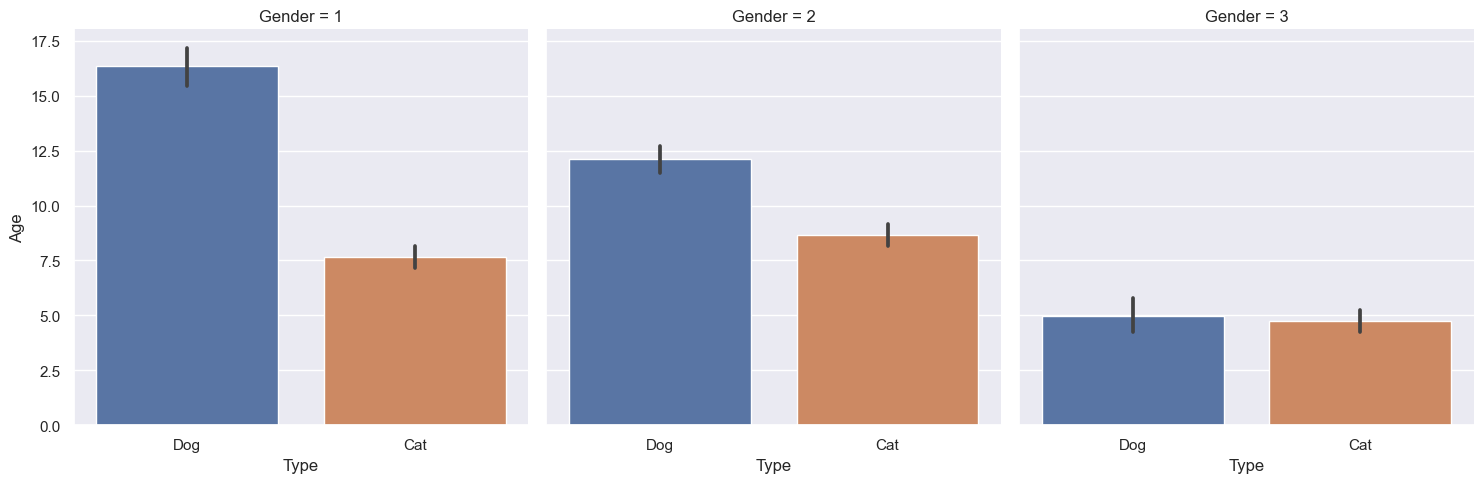

In [31]:
#Age, Type, Gender
ag = sns.catplot(data = train_df, y = "Age", x = "Type", col = "Gender", kind = "bar")
ag.set_xticklabels(["Dog","Cat"])


The gender by type are proportional to the animal type splits. Gender 3 indicates an entry with multiple quantities.

---

In [32]:
#Looking at how animals are listed
pd.crosstab(train_df["AdoptionSpeed"], train_df["Breed1"])

Breed1         0    1    3    5    7    10   11   15   16   17   ...  298  \
AdoptionSpeed                                                    ...        
0                0    0    0    0    0    0    0    0    0    0  ...    1   
1                0    0    0    1    0    0    0    3    0    1  ...    0   
2                1    0    0    0    0    0    0    0    0    0  ...    0   
3                2    0    0    0    0    3    0    3    0    3  ...    0   
4                2    2    1    1    1    0    2    3    1    2  ...    0   

Breed1         299  300  301  302  303  304  305  306   307  
AdoptionSpeed                                                
0               10    1    0    0    2    0    1    5    81  
1               82    5    3    0    8    0    0    9   859  
2               95    6    1    1   17    4    1   14  1575  
3               64    3    1    0    4    0    3   10  1381  
4               91    6    0    0   11    3    3   18  2031  

[5 rows x 176 columns]

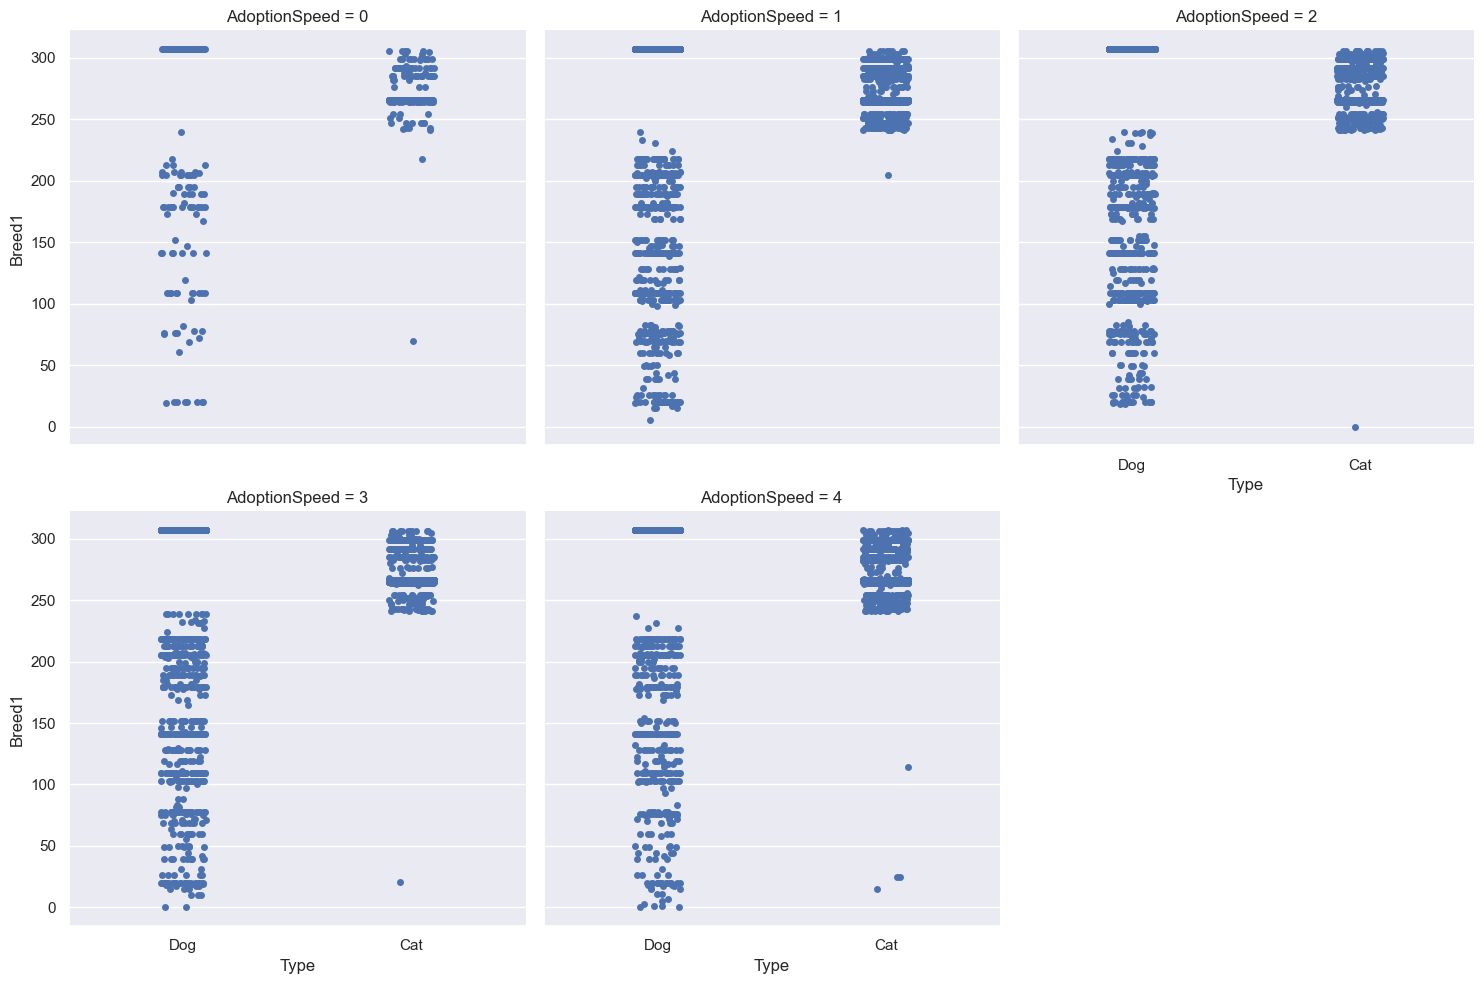

In [33]:
#"Primary Breed by Adoption Speed for Dogs and Cats"
ag = sns.catplot(data = train_df, y = "Breed1", x = "Type",col_wrap = 3, col = "AdoptionSpeed")
ag.set_xticklabels(["Dog","Cat"])


---

In [34]:
#Looking at how animals are listed
pd.crosstab(train_df["AdoptionSpeed"], train_df["Quantity"])

Quantity         1    2    3    4    5   6   7   8   9   10  11  12  13  14  \
AdoptionSpeed                                                                 
0               331   35   20   13    7   1   0   2   0   1   0   0   0   0   
1              2439  290  158  106   42  29  11   7   4   2   0   0   0   0   
2              3163  362  181  129   90  51  22  15   9   3   3   2   1   0   
3              2552  307  148   97   65  38  21  12  11   2   1   2   0   0   
4              3080  428  219  186  129  66  30  16   9  11   6   2   1   2   

Quantity       15  16  17  18  20  
AdoptionSpeed                      
0               0   0   0   0   0  
1               1   0   0   0   1  
2               0   2   2   0   2  
3               1   0   1   0   1  
4               2   1   0   1   8

[(0.0, 15.0)]

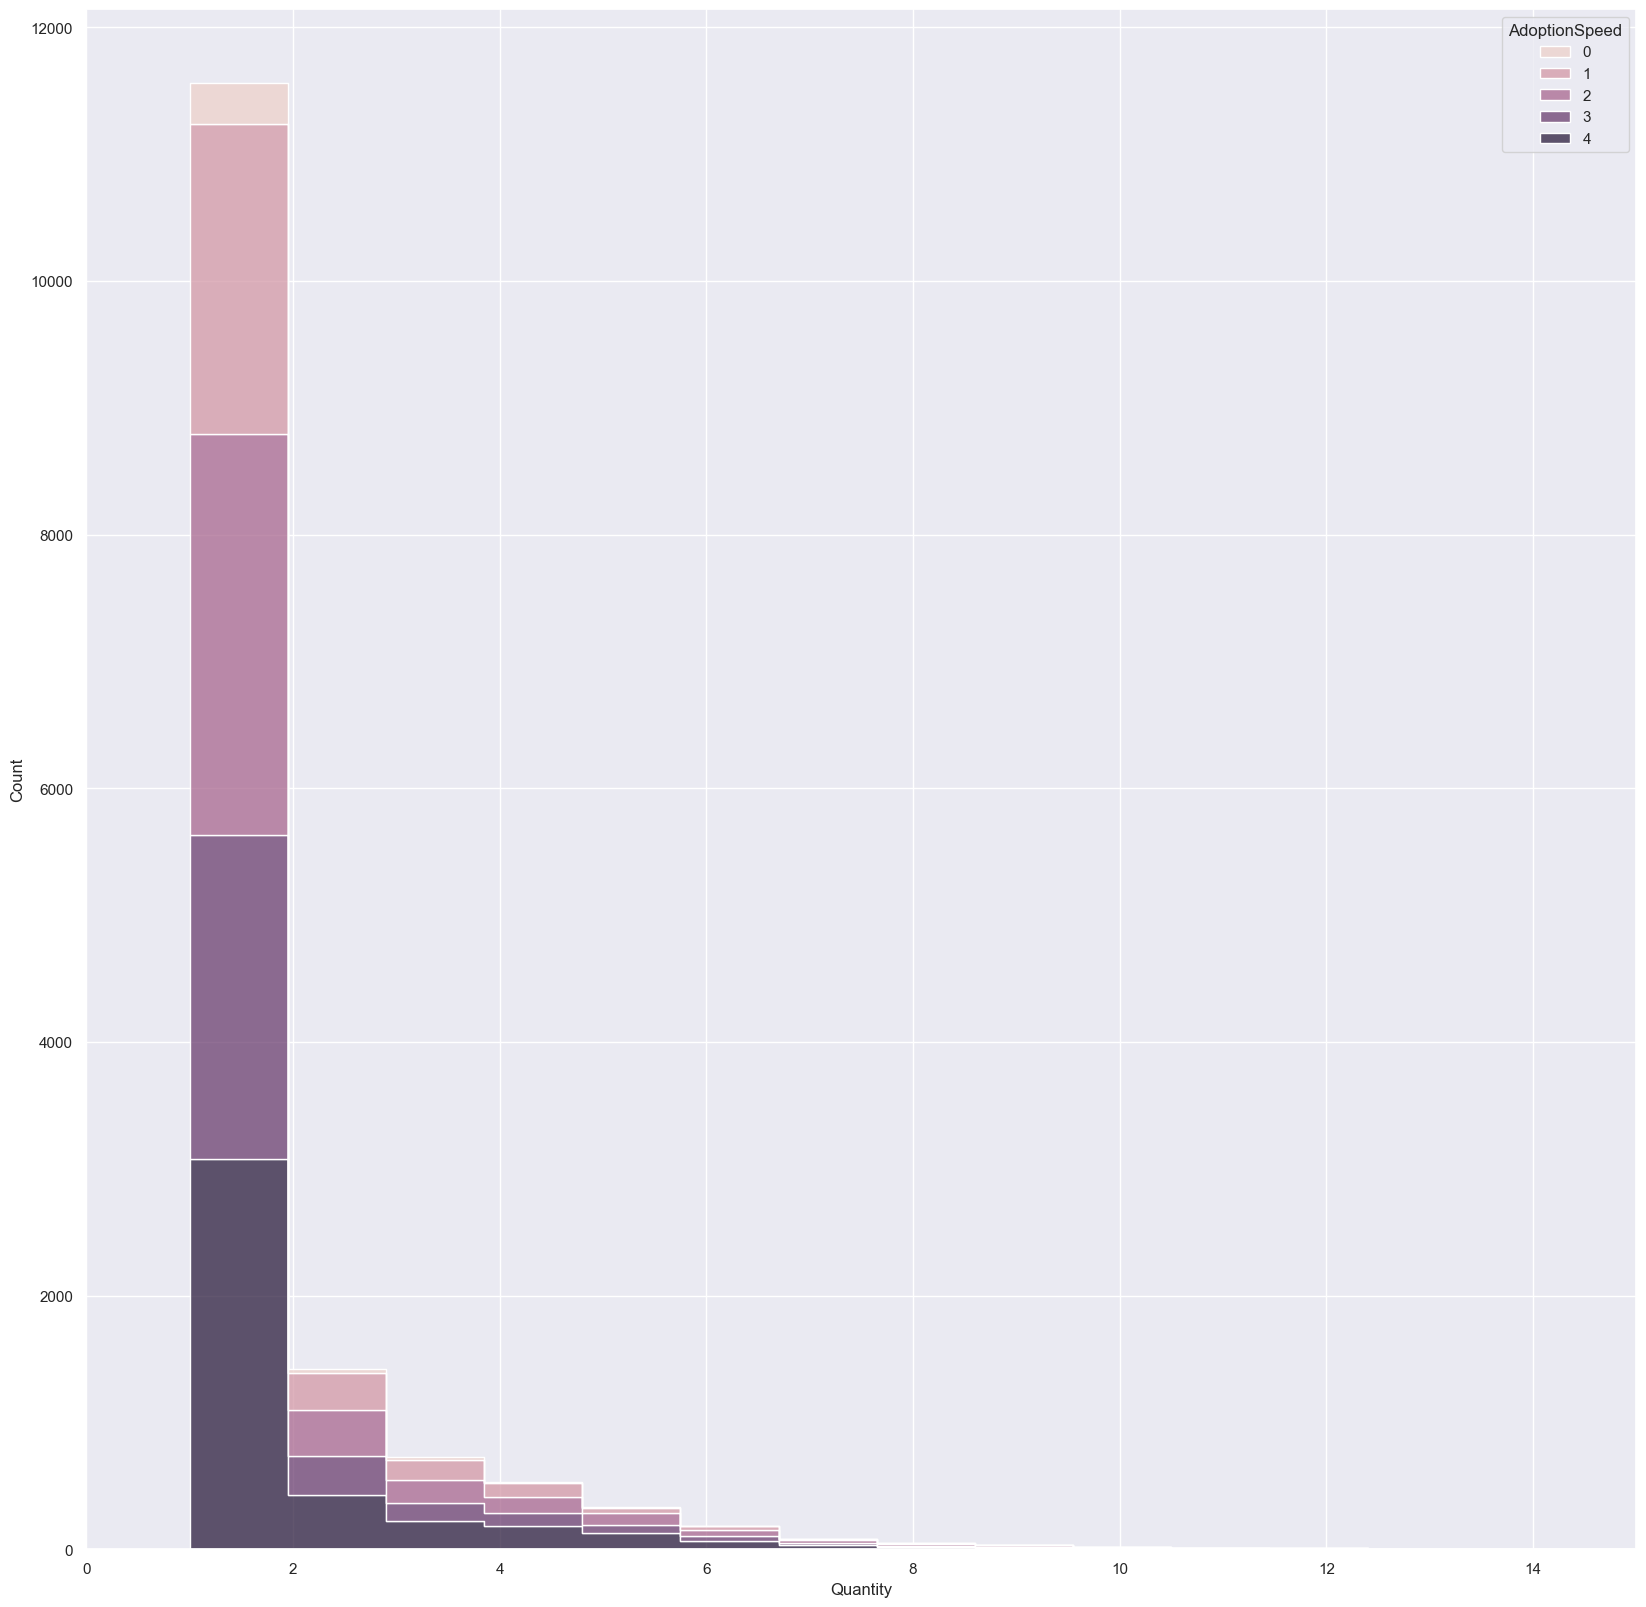

In [35]:
#AdoptionSpeed, Quantity Histogram
ag = sns.histplot(data = train_df,x  = "Quantity",hue = "AdoptionSpeed",multiple = "stack", element= "step", bins = 20)
ag.set(xlim = (0,15))

Most adoptions and non adoptions are from an entry with a quanity of one.  The more the quantity this value decreased

---

<b> Vaccination and Deworking Colinearity <b>

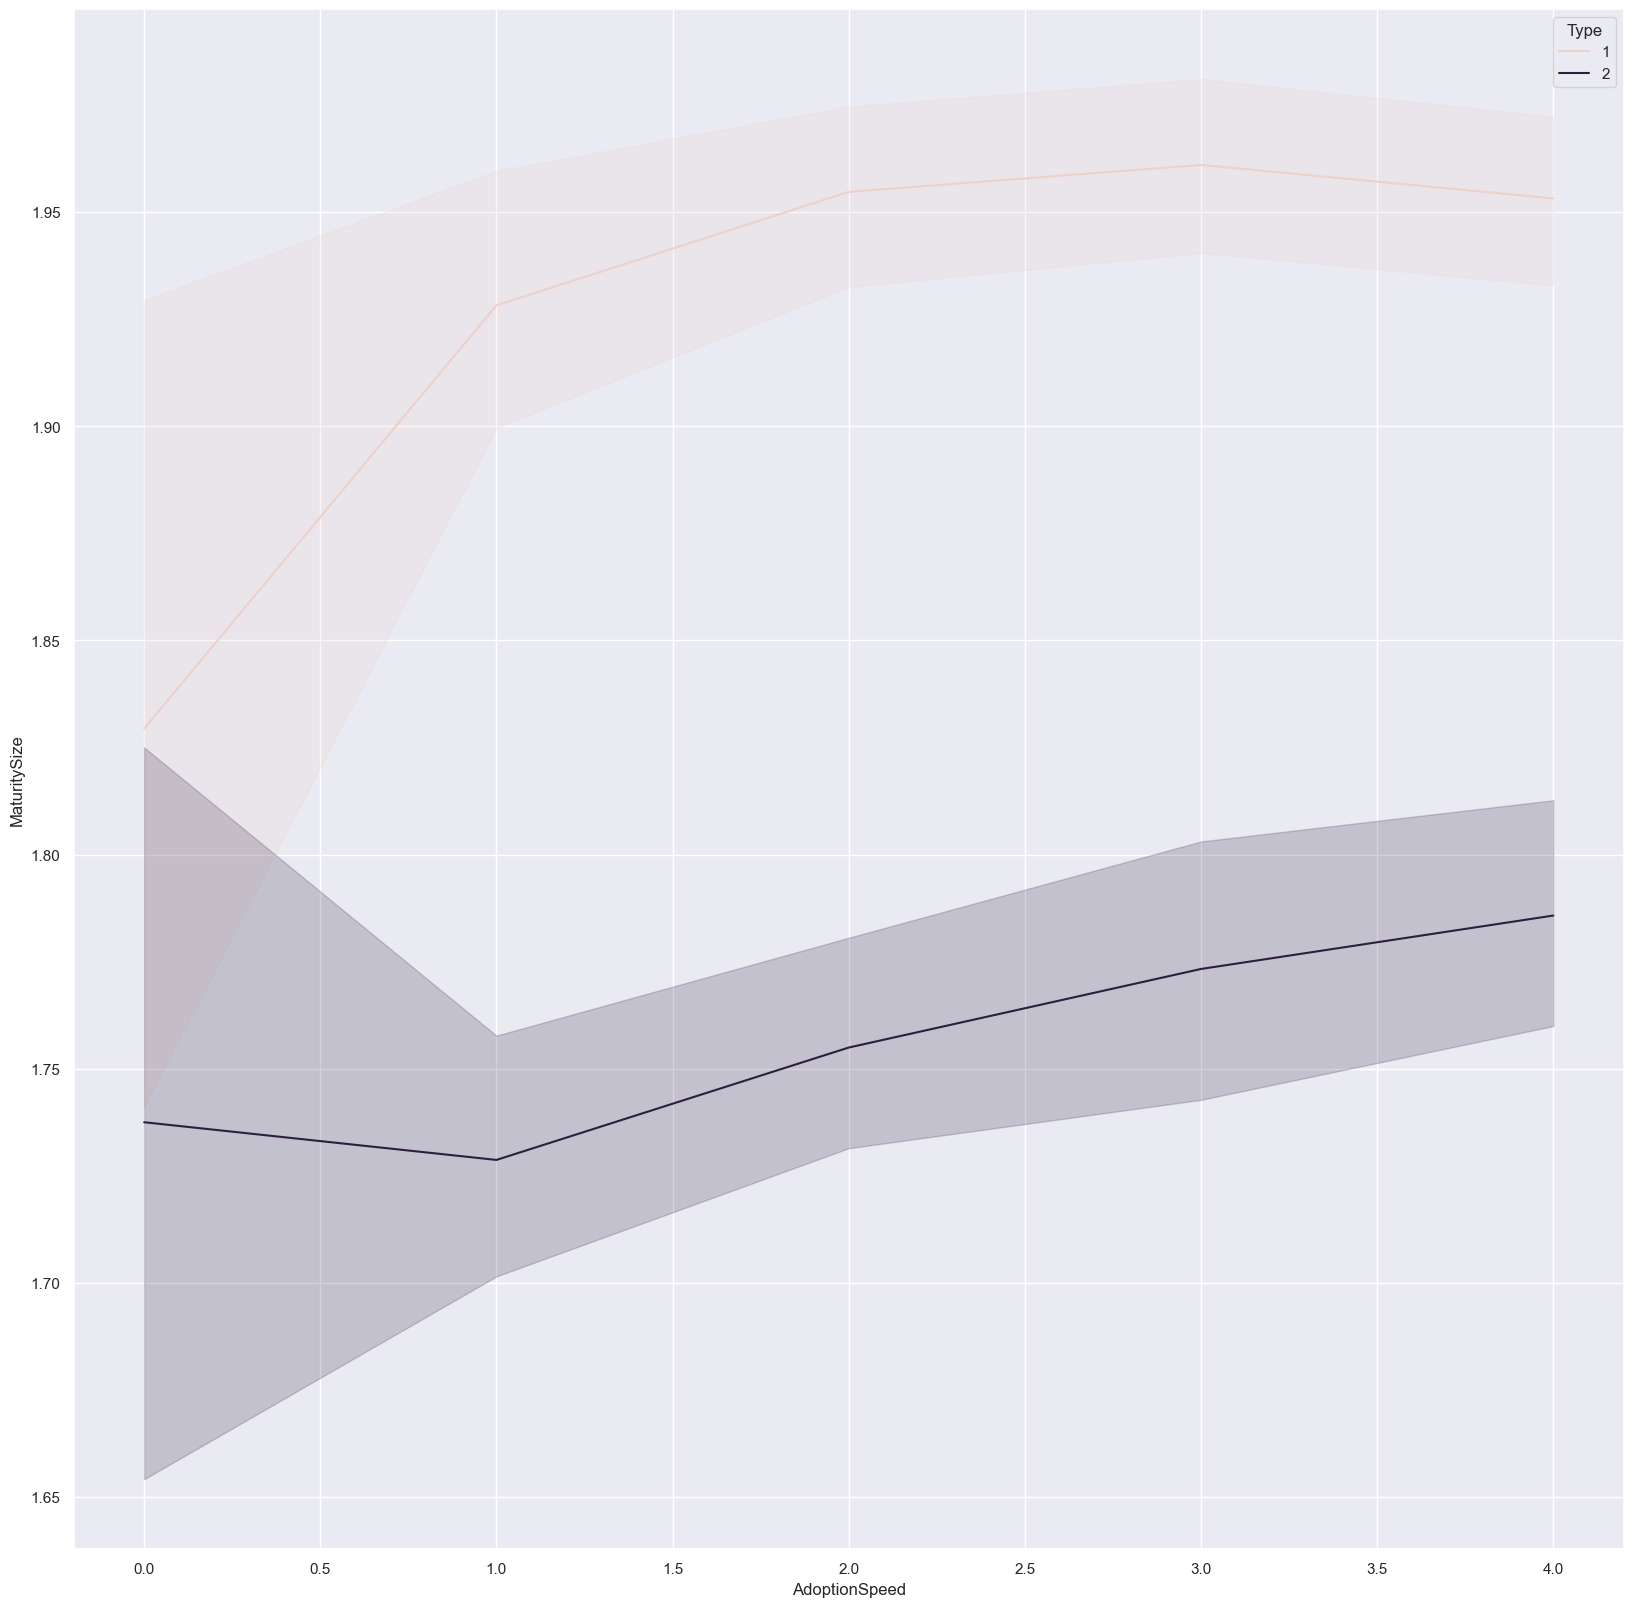

In [36]:
#Vaccinated by Deworm
ag = sns.lineplot(data = train_df, y = "MaturitySize", hue = "Type", x="AdoptionSpeed")


Most kittens are adopted when they are smalled.  Dogs start of being adopted at a larger size.

Text(0.5, 1.0, 'Vaccinited Vs Dewormed')

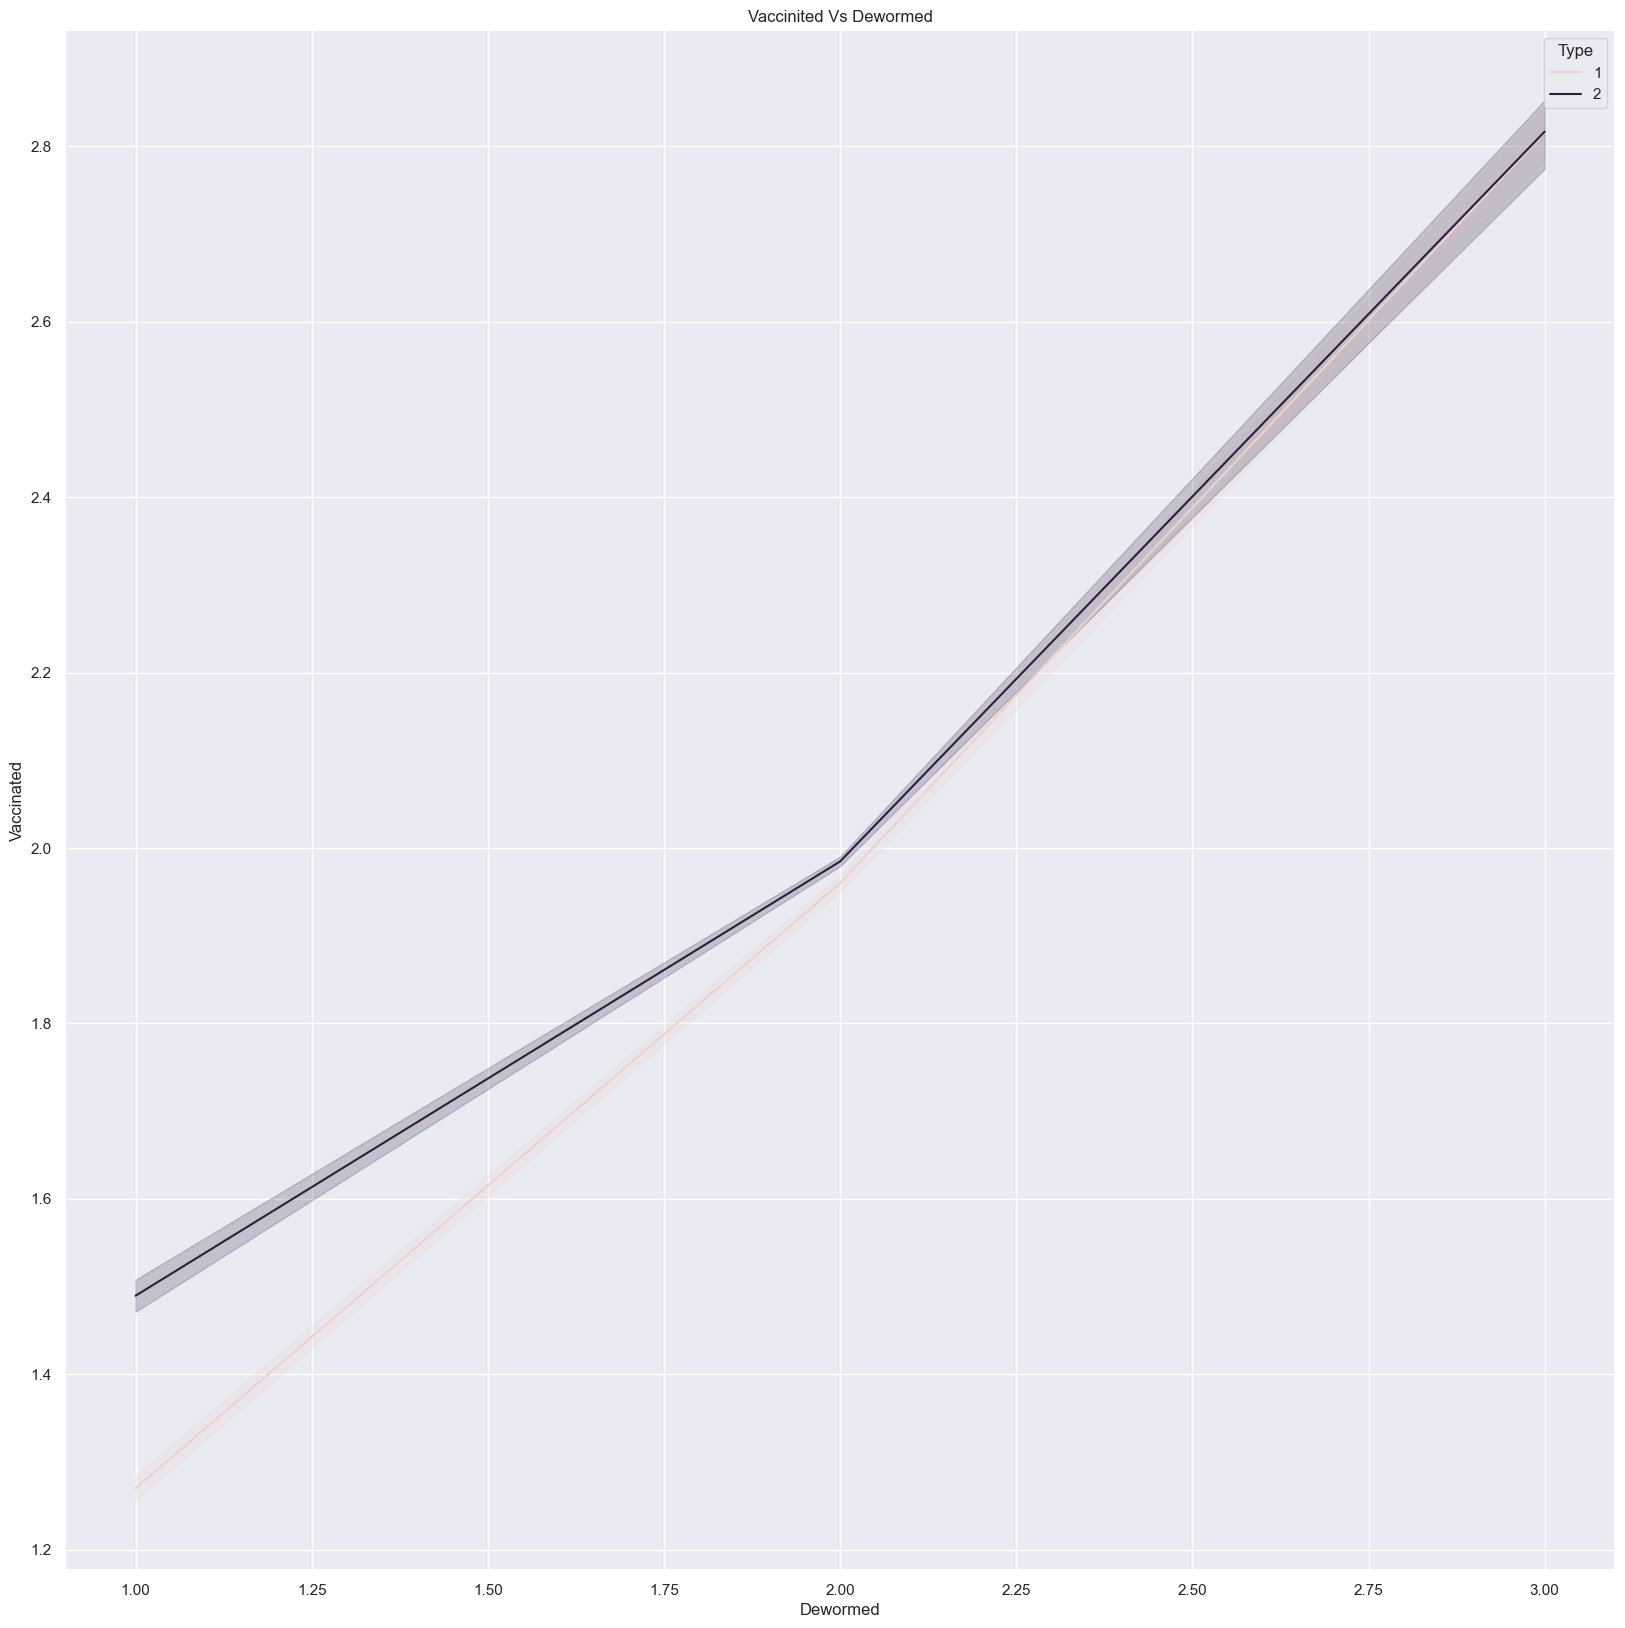

In [37]:
#Vaccinated by Deworm
ag = sns.lineplot(x = "Dewormed",y = "Vaccinated", hue= "Type", data = train_df)
ag.set_title("Vaccinited Vs Dewormed")

The relationship between deworming and vaccination is almost linear for both animals. Dewormed can be dropped.

---

## Data Preparation

In [38]:
#Change PhotoAmt to int64, if float it should round numbers to whole number
train_df["PhotoAmt"] = train_df["PhotoAmt"].astype("int64", errors='ignore')
train_df["PhotoAmt"].dtype

dtype('int64')


Rationale for dropping:

- Description best if analyzed looking for keywords using NLP Limitation
- Name best if analyzed looking for keywords using NLP, too many unique names and odd characters...best to drop than guessing
- Limitation, wont be used in prediction, but after seeing results, check the names for that they are...low fidelity correlation
- Because the id is an and not a specific name of a person, drop for prediction, there are over 5000 rescuers, there are




In [39]:
#Create a new dataframe for dropped tracks for end evaluation
drop_df =train_df[["Name","Description","RescuerID","PetID","Dewormed"]].copy()

#Drop uneeded columns
main_df = train_df.drop(columns=["Name","Description","RescuerID","PetID"], axis = 1)

**Binary Classification:** The main goal is to understand if an animal will be adopted or not. Therefore this will turn into a binary classification problem. All the categtories from (0,3) will be converted to a 1 representing adoption. Category number 4 will be converted to 0, representing no adoption.

In [40]:
#Convert target variable to two types 1- Adopted, 0- Not Adopted (Old 3 or less)

main_df["AdoptionSpeed"] = main_df["AdoptionSpeed"].replace([0,1,2,3],1) 
main_df["AdoptionSpeed"] = main_df["AdoptionSpeed"].replace([4],0) 
main_df["AdoptionSpeed"].value_counts()

1    10796
0     4197
Name: AdoptionSpeed, dtype: int64

In [41]:

#Train Test Split of the Data for Modeling
X = main_df.drop("AdoptionSpeed", axis = 1)
y = main_df["AdoptionSpeed"]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, stratify = y)

In [42]:
#Checking to see if the value counts are stratified for imbalance
print(y_train.value_counts())
print(y_test.value_counts())


1    8096
0    3148
Name: AdoptionSpeed, dtype: int64
1    2700
0    1049
Name: AdoptionSpeed, dtype: int64


Text(0.5, 1.0, 'Adoption Distribution')

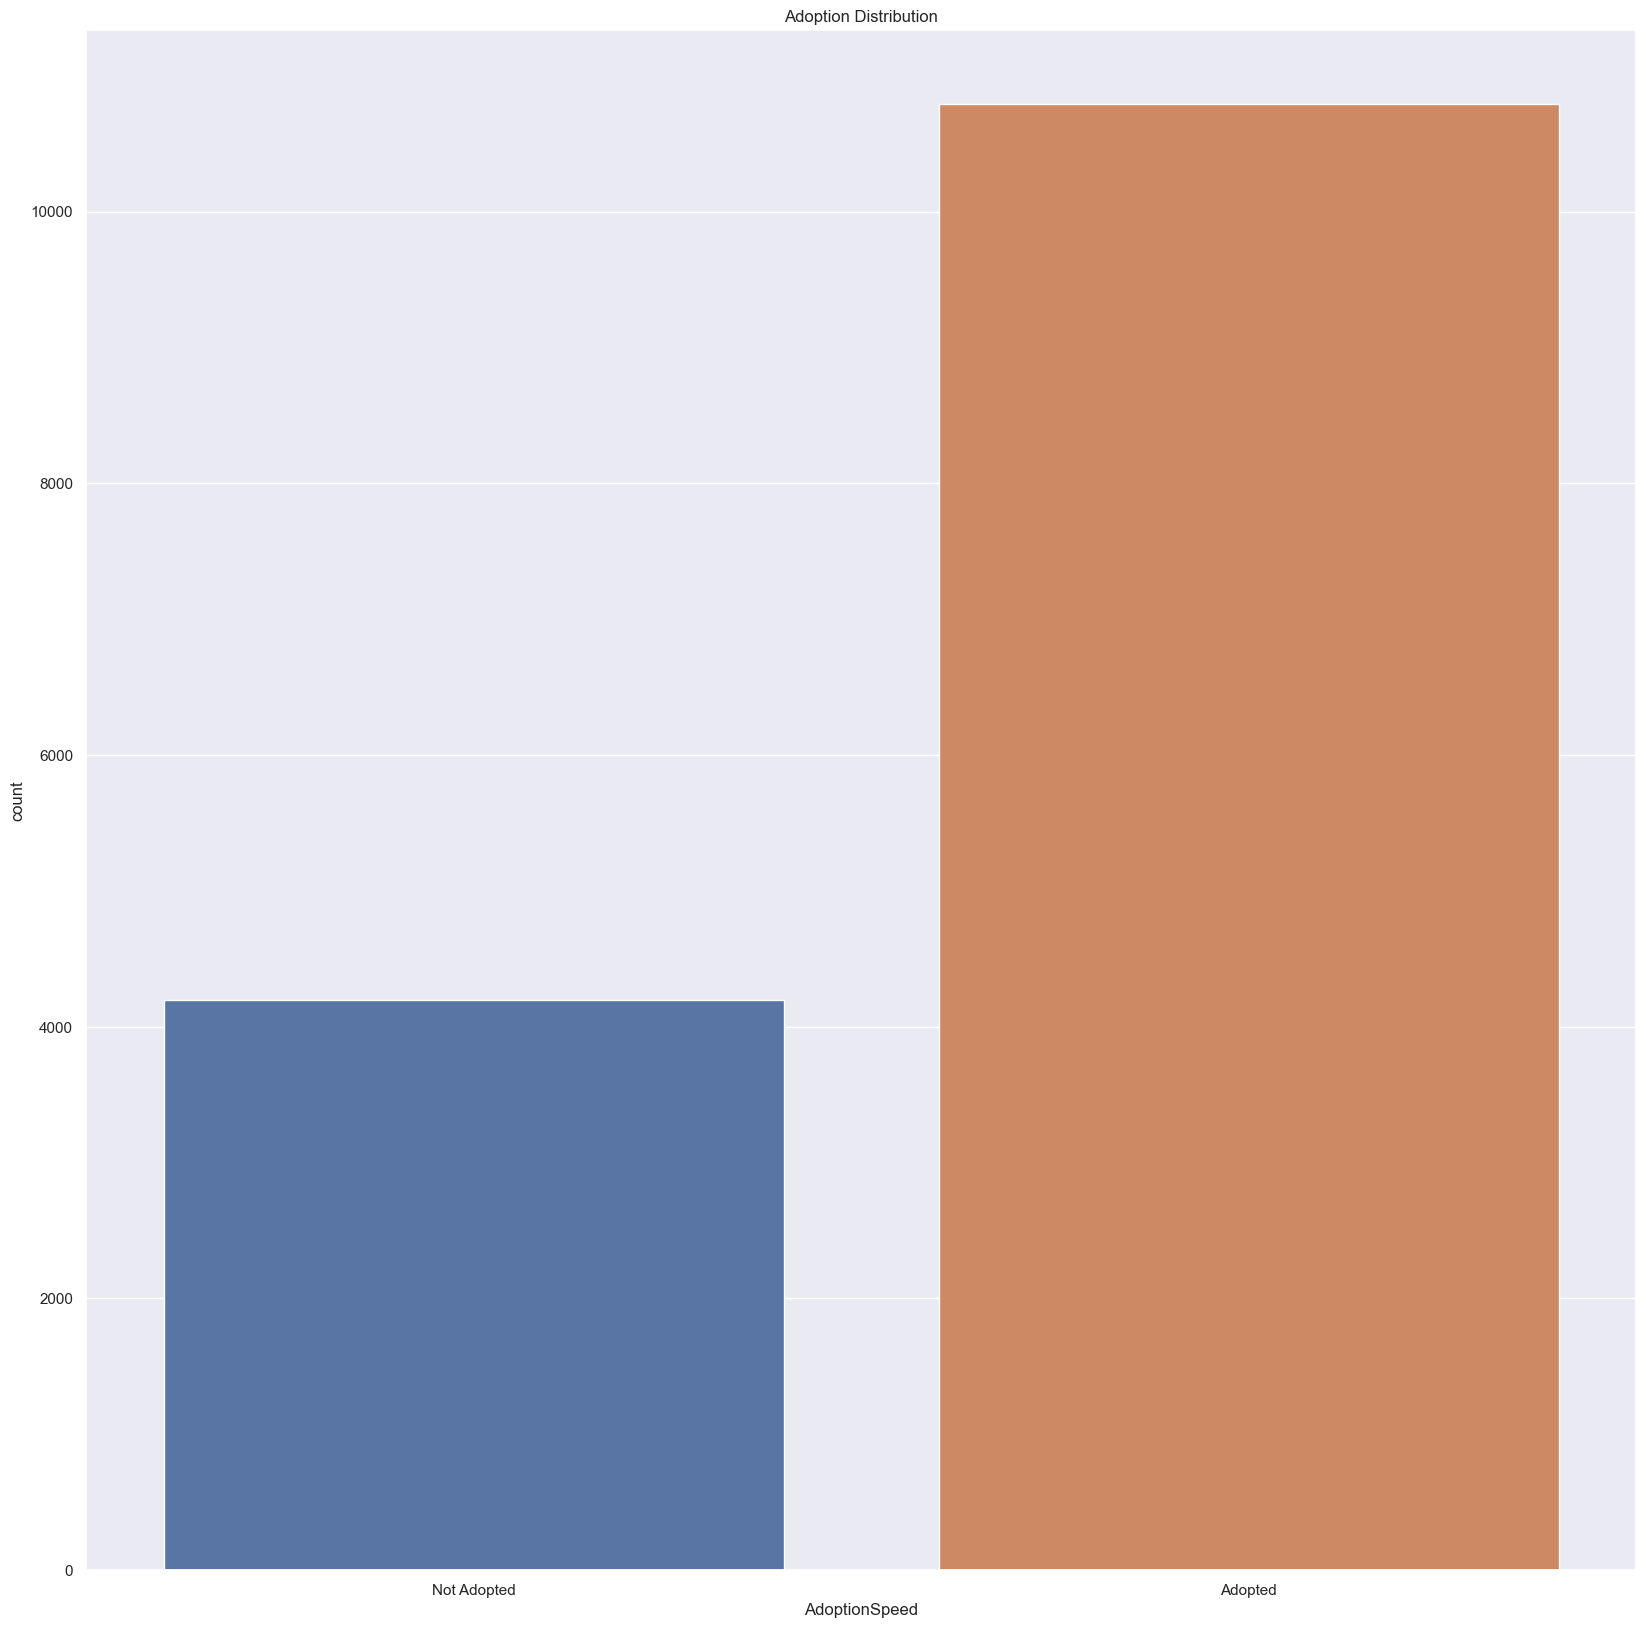

In [43]:
#Exploring Age and Gender
ag = sns.countplot(data = main_df,x = "AdoptionSpeed")
ag.set_xticklabels(["Not Adopted","Adopted"])
ag.set_title("Adoption Distribution")

---

# Modeling

### Main Functions

In [44]:
#Fit and predict with an instatiated model
def fit_pred(instatiated_model,X_train=X_train, X_test = X_test):
    """ This function takes an instatiated model fits it then predicts the train and test target.
    The prediction and prediction probabilities are returned for the train and test variables."""
    #Fit training data
    instatiated_model.fit(X_train,y_train)
    #Predict with Train
    y_train_pred = instatiated_model.predict(X_train)
    y_train_pred_prob  = instatiated_model.predict_proba(X_train)
    #Predict with Test
    y_test_pred = instatiated_model.predict(X_test)
    y_test_pred_prob  = instatiated_model.predict_proba(X_test)
    
    return  y_train_pred, y_train_pred_prob,y_test_pred, y_test_pred_prob

In [45]:
#Calculating precision, recall, f1, acc
def calc_metrics(y_true,y_pred):
    """ Calculates and returns precision, recall, f1, acc metrics from the true and predicted values."""
    y_pred = np.round(y_pred,0)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred,normalize = True)

    print ("The Precision mean score is: {}".format(np.round(precision,2)))
    print ("The Recall mean score is: {}".format(np.round(recall,2)))
    print ("The F1  score is: {}".format(np.round(f1,2)))
    print ("The Accuracy mean score is: {}".format(np.round(acc,2)))
    print("\n")
    return precision, recall, f1, acc

In [46]:
def conf_matrix(y_true,y_pred):
    """Prints confusion matrix for the Adopted and Not adopted true and predicted values. """
    y_pred = np.round(y_pred,0)
    fig, ax = plt.subplots(1,2, figsize = (15,4), facecolor = "white")
    
    ax[0].set_title("Confusion Matrix")
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize=None, display_labels= ["Not", "Adopted"], ax= ax[0])
    ax[1].set_title("Confusion Matrix: Normalized")
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize="all", display_labels= ["Not", "Adopted"], ax= ax[1])
    ax[0].grid(False)
    ax[1].grid(False)

In [47]:
#Printing metric subplots of training and validation per epoch
def nn_eval_metrics(history):
    """ Plots Train and Validation metrics["acc","loss","recall","precision"]
    from a model's evaluation results."""
    
    fig, ax = plt.subplots(1,4, figsize = (25,5))
    fig.suptitle('Model Metrics Results')
    
    metrics = ["recall","acc","loss","precision"]   
    
    for i, metric in enumerate(metrics):
    
        ax[i].plot(history.history[metric])
        ax[i].plot(history.history["val_" + metric])
        ax[i].set_title('Model {}'.format(metric))
        ax[i].set_ylabel(metric)
        ax[i].set_xlabel("Epochs")
        ax[i].legend(['train', 'val'])

In [48]:
def plot_curves(estimator,X,y):
    """Plot the ROC Curve and the Precision Recall Curve.
    These are plotted against the orinal dummy classifier"""
    fig, ax = plt.subplots(1,2, figsize = (10,4), facecolor = "white")
    ax[0].set_title("Precision Recall Curve")
    PrecisionRecallDisplay.from_estimator(estimator,X,y,ax = ax[0])
    PrecisionRecallDisplay.from_estimator(dummy_clf,X,y,ax = ax[0])
    ax[1].set_title("ROC Curve")
    RocCurveDisplay.from_estimator(estimator,X,y, ax = ax[1])
    RocCurveDisplay.from_estimator(dummy_clf,X,y, ax = ax[1])

---

### Model Iteration Sequence

- **Dummy Model**
- **Baseline**
    - Logistic Regression
    - KNN
    - XGBoost
    - Randon Forest
    - Neural Net
- **Pipeline (Scaled and Smoted)and GridsearchCV**
    - Logistic Regression
    - KNN
    - XGBoost
    - Randon Forest
    - Neural Net
- **Feature Importance**
- **Final Model Metrics**


## Change for Classification Model
### The following is the outline of each model iteration:

- Sequence* <br>
- Compile* <br>
- Fit <br>
- Predict <br>
- Eval report* <br>
- Conf_matrix <br>
- Classification_Report <br>
- AUC/ROC & Precision/Recall Curve (Except NN Modeling)
- Model Evaluation <br>

*Neural Net Only

Each iteration will have slight changes for improvement.  They will be described more at the
General descriptions of specific iterations.

### The main metrics focused on are:
- Primarily want **Precision** to maximize TP and minimize FP of adoptees.<br>
- Secondary we want **Recall and F1** to minimize FN.<br>
- Due to a data imbalance the **Precision/Recall curve** will be used primarily.

In [49]:
# Think About
# calculate precision-recall curve for different thresholds
#precision, recall, thresholds = precision_recall_curve(testy, probs) https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

[Dummy Classifier- Abiheet Sahoo, 2020 ](https://towardsai.net/p/data-science/dealing-with-class-imbalance%E2%80%8A-%E2%80%8A-dummy-classifiers)

## Dummy Model

Initial understanding of what would guess randomly based on the frequency of data to set a low level baseline for the other models.

In [50]:
## Dummy Model
#Instantiating and fitting the model
dummy_clf = DummyClassifier(strategy="most_frequent") # Using Most Frequent strategy
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [51]:
dummy_train_pred,_,dummy_test_pred,_= fit_pred(dummy_clf)

In [52]:
#Cross Val results on training data
cv_results = cross_val_score(dummy_clf, X_train, y_train, cv=5)
cv_results.mean()

0.7200284744979579

In [53]:
cv_results = cross_val_score(dummy_clf, X_test, y_test, cv=5)
cv_results.mean()

0.720192256341789

In [54]:
#Printing out Test data classification report with scores 
print("Train Classification Report:\n", classification_report(y_train,dummy_train_pred))
print("Test Classification Report:\n", classification_report(y_test, dummy_test_pred))

Train Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3148
           1       0.72      1.00      0.84      8096

    accuracy                           0.72     11244
   macro avg       0.36      0.50      0.42     11244
weighted avg       0.52      0.72      0.60     11244

Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1049
           1       0.72      1.00      0.84      2700

    accuracy                           0.72      3749
   macro avg       0.36      0.50      0.42      3749
weighted avg       0.52      0.72      0.60      3749



Test Confusion Matrix:



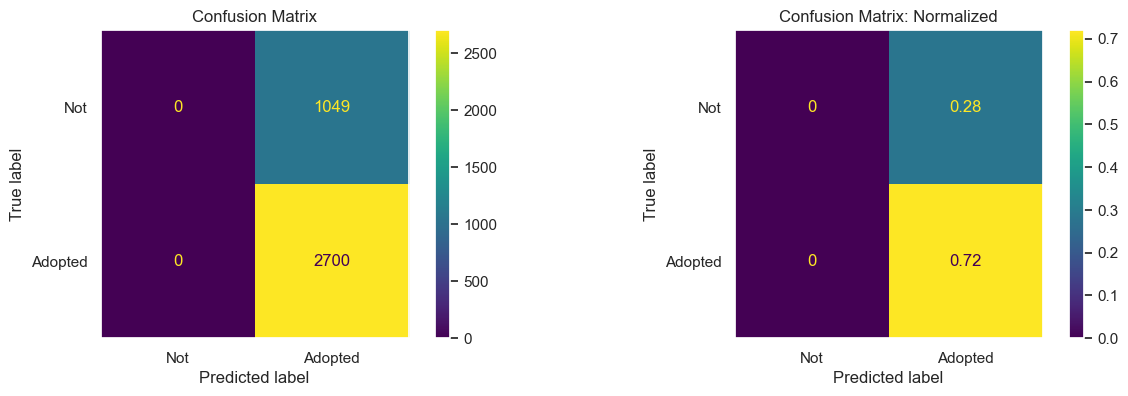

In [55]:
print("Test Confusion Matrix:\n")
conf_matrix(y_test,dummy_test_pred)

**Model Evaluation**
- ~72% Change of predicting if an animal will be adopted on random guessing. 

---

### Baseline  Logistic Regression

In [56]:
#Instantiate
lr_simple = LogisticRegression(random_state = 42,penalty= "none") 
#Fit and Predict
lr_train_pred,_,lr_test_pred,_= fit_pred(lr_simple)

In [57]:
#Metrics
calc_metrics(y_train,lr_train_pred)

The Precision mean score is: 0.73
The Recall mean score is: 0.98
The F1  score is: 0.84
The Accuracy mean score is: 0.72




(0.7268823099415205, 0.9825839920948617, 0.835609243697479, 0.7216293134115973)

Train Confusion Matrix:



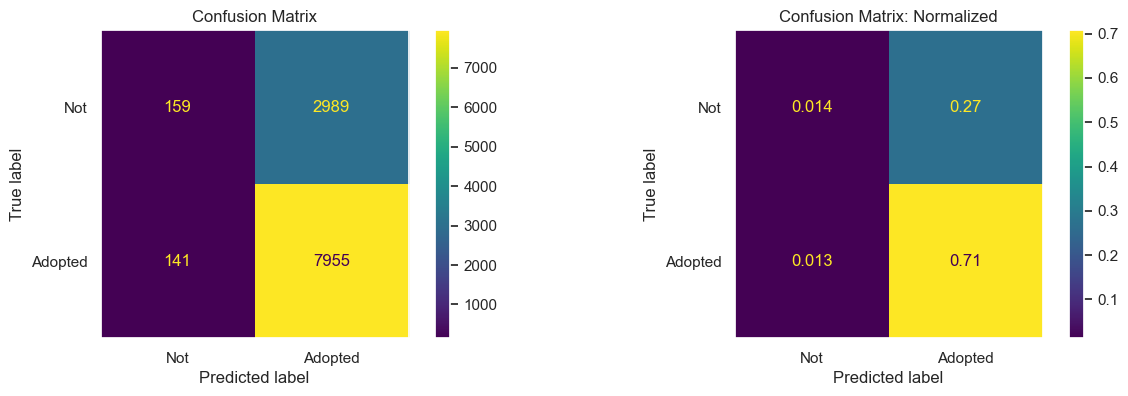

In [58]:
#Confusion Matrix
print("Train Confusion Matrix:\n")
conf_matrix(y_train,lr_train_pred)


Test Confusion Matrix:



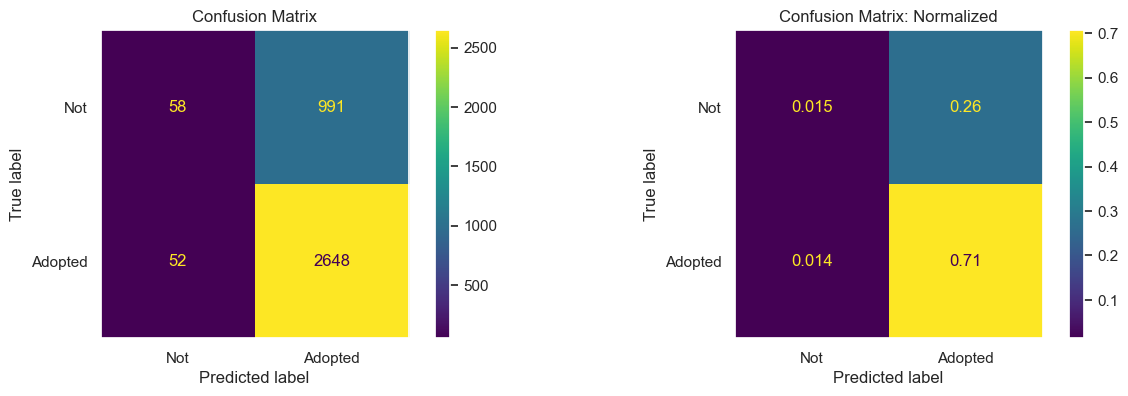

In [59]:
print("Test Confusion Matrix:\n")
conf_matrix(y_test,lr_test_pred)

In [60]:
#Printing out Test data classification report with scores 
print("Train Classification Report:\n", classification_report(y_train,lr_train_pred))
print("Test Classification Report:\n", classification_report(y_test, lr_test_pred))

Train Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.05      0.09      3148
           1       0.73      0.98      0.84      8096

    accuracy                           0.72     11244
   macro avg       0.63      0.52      0.46     11244
weighted avg       0.67      0.72      0.63     11244

Test Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.06      0.10      1049
           1       0.73      0.98      0.84      2700

    accuracy                           0.72      3749
   macro avg       0.63      0.52      0.47      3749
weighted avg       0.67      0.72      0.63      3749



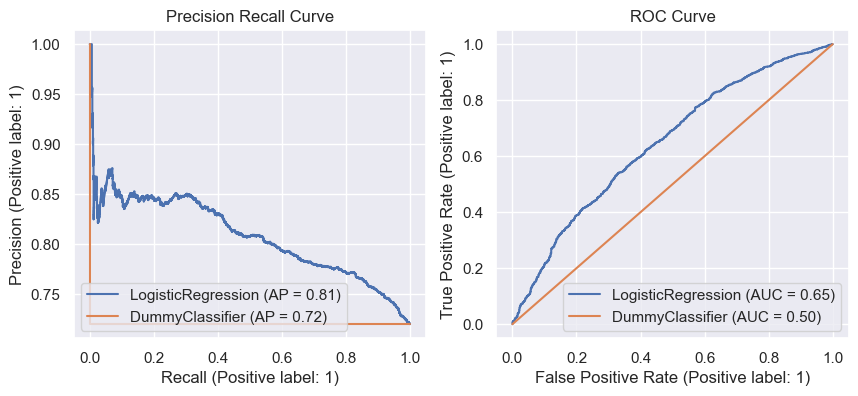

In [61]:
#Print Precision/Recall and AUC Score
plot_curves(lr_simple,X_test,y_test)

**Model Evaluation**
- They both have an average of 26% FP rate from the Confusion Matrix.
- Test and training precision metrics of 73% are very similar.
- The model performs better (81%) than the base Dummy Classifier (~72%)

### Baseline KNN


In [62]:
#Plotting kNN https://towardsdatascience.com/knn-visualization-in-just-13-lines-of-code-32820d72c6b6


In [63]:
#Scale Data for KNN
#Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X_train.columns)
scaled_df_test = pd.DataFrame(scaled_data_test, columns=X_test.columns)

In [64]:
#Instantiate
knn_simple = KNeighborsClassifier()
#Fit and Predict
knn_train_pred,_,knn_test_pred,_=fit_pred(knn_simple,scaled_df_train,scaled_df_test)

In [65]:
#Metrics
print("Train Metrics: ")
calc_metrics(y_train,knn_train_pred)

Train Metrics: 
The Precision mean score is: 0.82
The Recall mean score is: 0.93
The F1  score is: 0.87
The Accuracy mean score is: 0.8




(0.8160531474624265,
 0.9255187747035574,
 0.8673457576108345,
 0.7961579509071505)

Train Confusion Matrices:



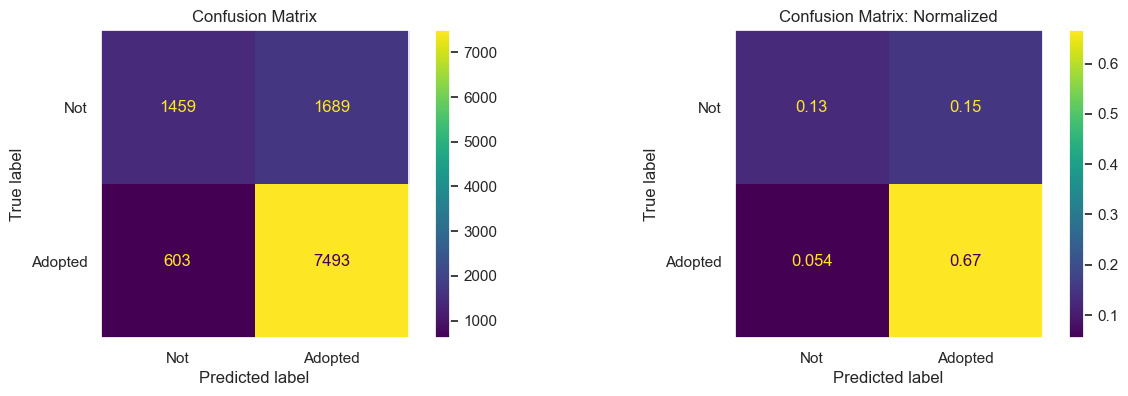

In [66]:
#Confusion Matrix
print("Train Confusion Matrices:\n")
conf_matrix(y_train,knn_train_pred)


Test Confusion Matrices:



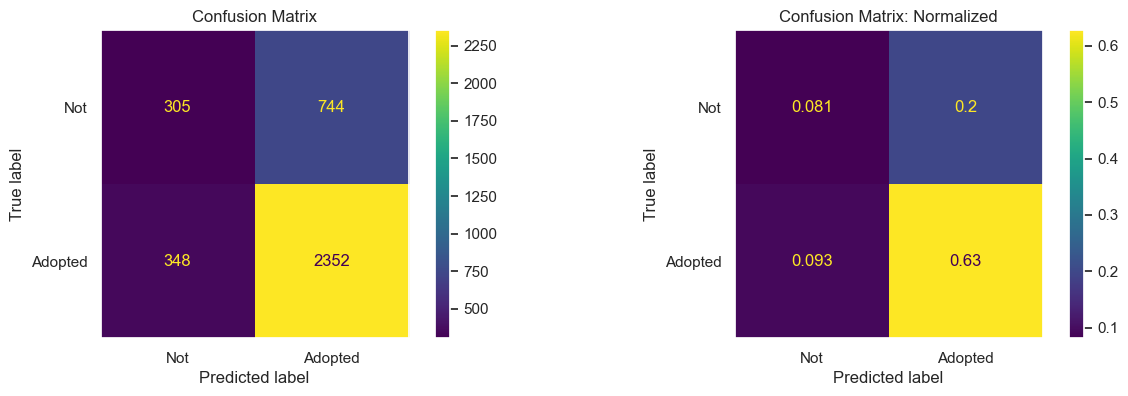

In [67]:
print("Test Confusion Matrices:\n")
conf_matrix(y_test,knn_test_pred)

In [68]:
#Printing out Test data classification report with scores 
print("Train Classification Report:\n", classification_report(y_train,knn_train_pred))
print("Test Classification Report:\n", classification_report(y_test, knn_test_pred))

Train Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.46      0.56      3148
           1       0.82      0.93      0.87      8096

    accuracy                           0.80     11244
   macro avg       0.76      0.69      0.71     11244
weighted avg       0.79      0.80      0.78     11244

Test Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.29      0.36      1049
           1       0.76      0.87      0.81      2700

    accuracy                           0.71      3749
   macro avg       0.61      0.58      0.58      3749
weighted avg       0.68      0.71      0.68      3749



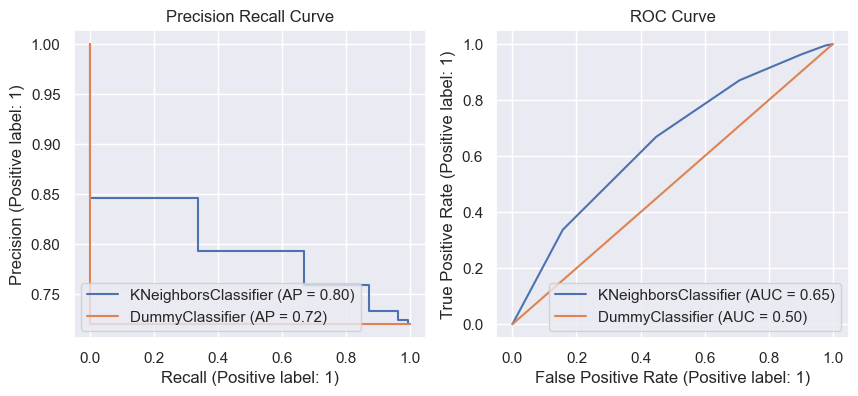

In [69]:
#Print Precision/Recall and AUC Score
plot_curves(knn_simple,scaled_df_test,y_test)

**Model Evaluation**
- Test  20% FP rate, with training 9% FP rate from the Confusion Matrix.
- Test 76% and training 82% precision metrics. Slowly improving from prior model
- The model performs better (80%) than the base Dummy Classifier (~72%). 

### Baseline XGBoost

Baseline XGBoost #https://github.com/learn-co-curriculum/dsc-pca-and-pipelines-v2-1/tree/solution

In [70]:
#Instantiate
xgb_simple = XGBClassifier(random_state = 42)

#Fit and Predict
xgb_train_pred,_,xgb_test_pred,_= fit_pred(xgb_simple)

In [71]:
#Metrics
calc_metrics(y_train,xgb_train_pred)

The Precision mean score is: 0.87
The Recall mean score is: 0.96
The F1  score is: 0.92
The Accuracy mean score is: 0.87




(0.8748732965424034,
 0.9594861660079052,
 0.9152282768777614,
 0.8720206332266097)

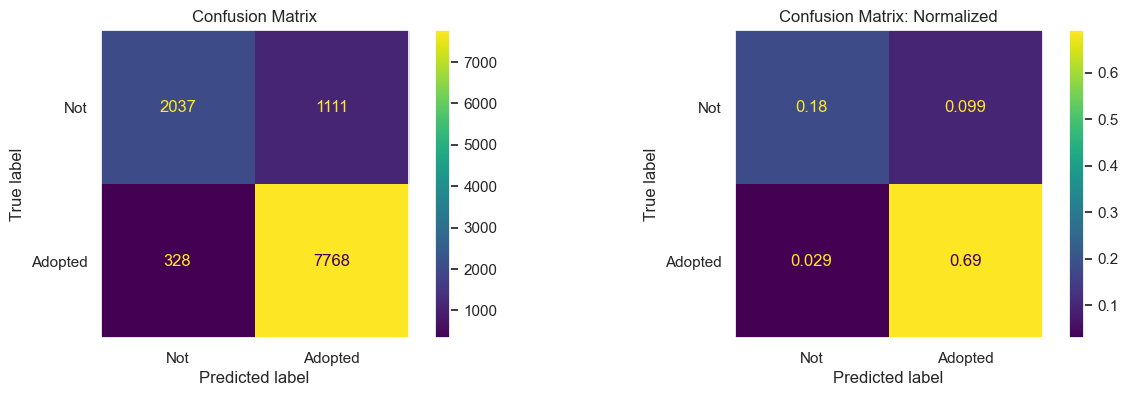

In [72]:
#Confusion Matrix
conf_matrix(y_train,xgb_train_pred)

Train Confusion Matrices:



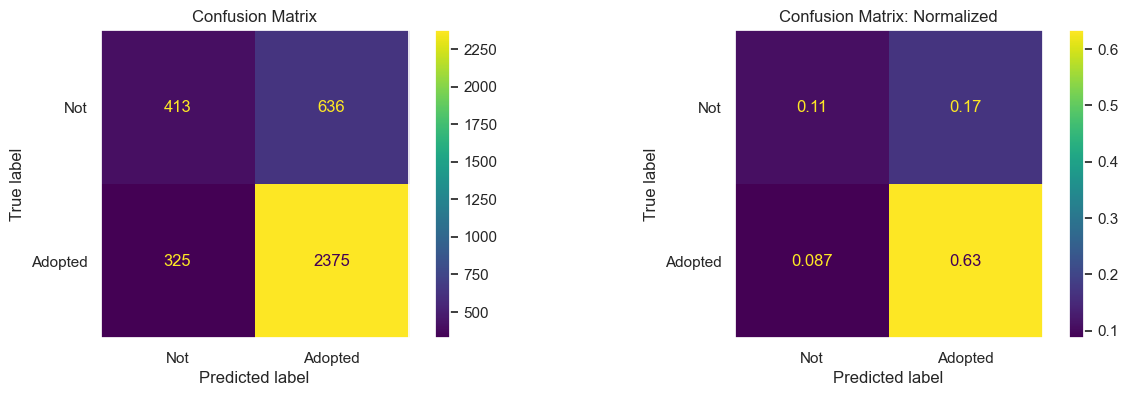

In [73]:
#Confusion Matrix
print("Train Confusion Matrices:\n")
conf_matrix(y_test,xgb_test_pred)


Test Confusion Matrices:



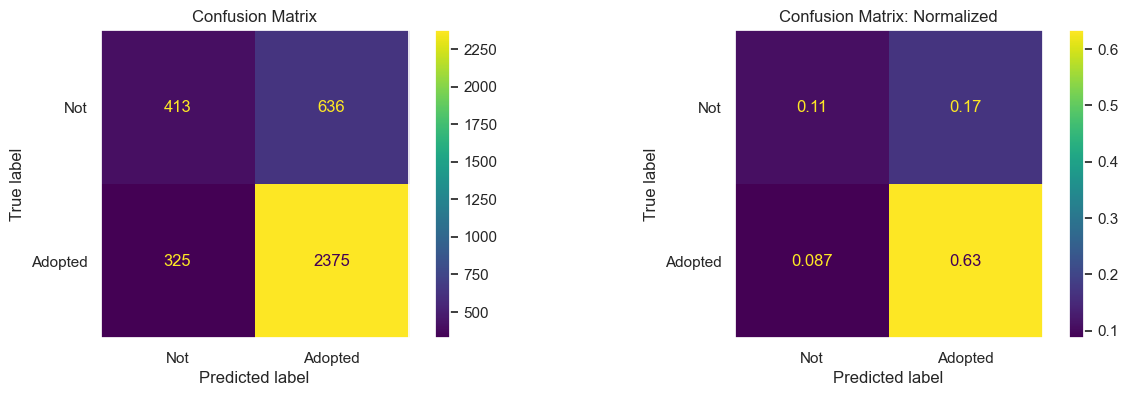

In [74]:
print("Test Confusion Matrices:\n")
conf_matrix(y_test,xgb_test_pred)

In [75]:
#Printing out Test data classification report with scores 
print("Train Classification Report:\n", classification_report(y_train,xgb_train_pred))
print("Test Classification Report:\n", classification_report(y_test, xgb_test_pred))

Train Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.65      0.74      3148
           1       0.87      0.96      0.92      8096

    accuracy                           0.87     11244
   macro avg       0.87      0.80      0.83     11244
weighted avg       0.87      0.87      0.87     11244

Test Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.39      0.46      1049
           1       0.79      0.88      0.83      2700

    accuracy                           0.74      3749
   macro avg       0.67      0.64      0.65      3749
weighted avg       0.72      0.74      0.73      3749



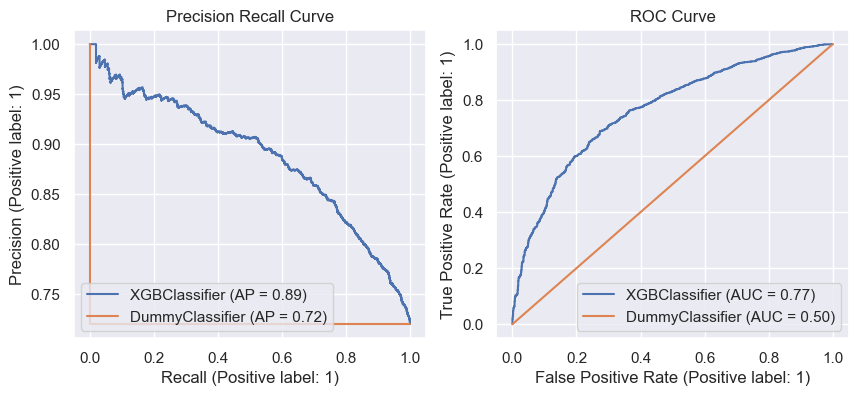

In [76]:
#Print Precision/Recall and AUC Score
plot_curves(xgb_simple,X_test,y_test)

**Model Evaluation**
- Test  17% FP rate, with training 10% FP rate from the Confusion Matrix.
- Test 79% and training 87% precision metrics. 
- The model performs better (89%) than the base Dummy Classifier (~72%). 
- Slowly improving precision and accuracy from prior model.

### Random Forest Baseline


In [77]:
#Instantiate
rf_simple = RandomForestClassifier(random_state = 42) 

#Fit and Predict
rf_train_pred,_,rf_test_pred,_= fit_pred(rf_simple)

In [78]:
#Metrics
calc_metrics(y_test,rf_test_pred)

The Precision mean score is: 0.79
The Recall mean score is: 0.9
The F1  score is: 0.84
The Accuracy mean score is: 0.75




(0.7850919651500484,
 0.9011111111111111,
 0.8391101914123125,
 0.7511336356361696)

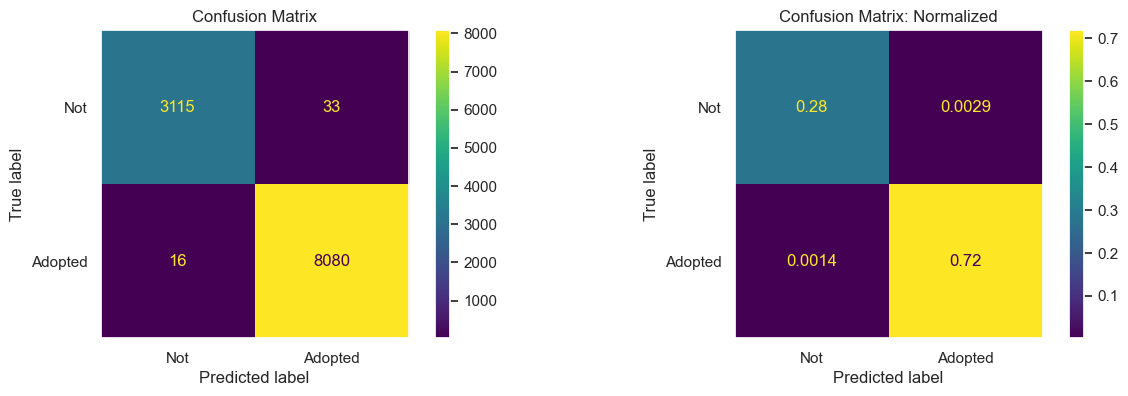

In [79]:
#Confusion Matrix
conf_matrix(y_train,rf_train_pred)

Test Confusion Matrices:



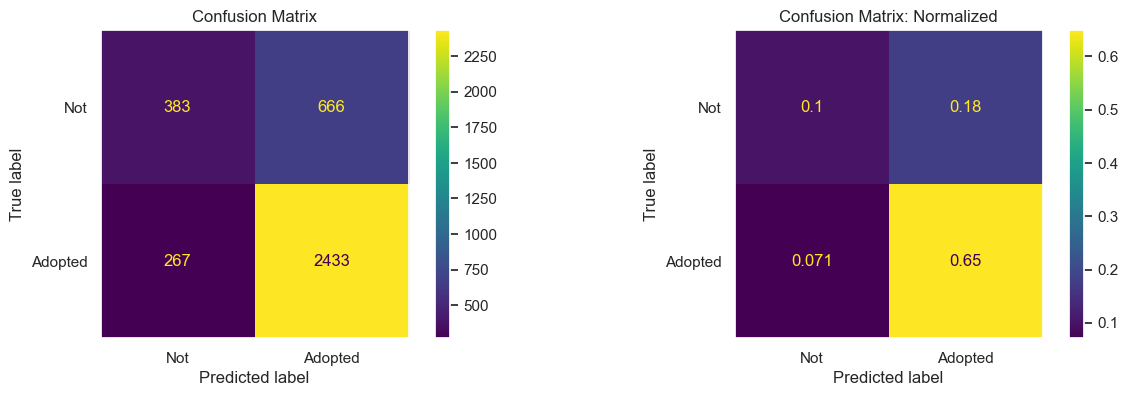

In [80]:
print("Test Confusion Matrices:\n")
conf_matrix(y_test,rf_test_pred)

In [81]:
#Printing out Test data classification report with scores 
print("Train Classification Report:\n", classification_report(y_train,rf_train_pred))
print("Test Classification Report:\n", classification_report(y_test, rf_test_pred))

Train Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3148
           1       1.00      1.00      1.00      8096

    accuracy                           1.00     11244
   macro avg       1.00      0.99      0.99     11244
weighted avg       1.00      1.00      1.00     11244

Test Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.37      0.45      1049
           1       0.79      0.90      0.84      2700

    accuracy                           0.75      3749
   macro avg       0.69      0.63      0.64      3749
weighted avg       0.73      0.75      0.73      3749



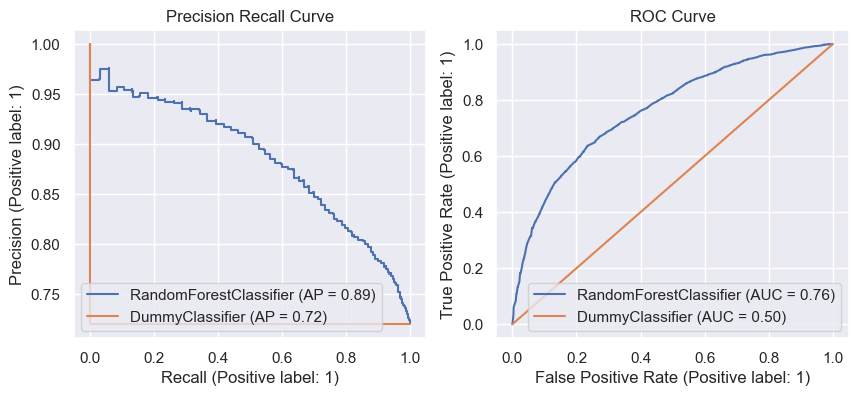

In [82]:
#Print Precision/Recall and AUC Score
plot_curves(rf_simple,X_test,y_test)

**Model Evaluation**
- Test  18% FP rate, with training 1% FP rate from the Confusion Matrix.
- Test 79% and training 100% precision metrics. 
- The model performs better (89%) than the base Dummy Classifier (~72%). 
- Similar but slightly less accurate than the GXBoost model. Training data performs better on the tree algorithms.

### Recurrent Neural Net Baseline

In [83]:
# Use scaled data from KNN
scaled_df_train.shape

(11244, 19)

In [84]:
nn_model = Sequential([
Dense(5, activation='tanh', input_shape=(19,)),
Dense(1, activation='sigmoid')])

Metal device set to: Apple M2 Max


2023-04-06 04:12:47.469626: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-06 04:12:47.469746: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [85]:
nn_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc',"Recall","Precision"])

In [86]:
nn_results = nn_model.fit(scaled_df_train, y_train, epochs=15, batch_size=250, validation_split=0.2)

Epoch 1/15


2023-04-06 04:12:47.581467: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 1/36 [..............................] - ETA: 13s - loss: 0.8095 - acc: 0.5080 - recall: 0.5028 - precision: 0.7339

2023-04-06 04:12:47.805716: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 1s 17ms/step - loss: 0.7485 - acc: 0.5570 - recall: 0.5640 - precision: 0.7575 - val_loss: 0.7329 - val_acc: 0.5687 - val_recall: 0.5901 - val_precision: 0.7619
Epoch 2/15
 1/36 [..............................] - ETA: 0s - loss: 0.7600 - acc: 0.5360 - recall: 0.5691 - precision: 0.7305

2023-04-06 04:12:48.400827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 0s 8ms/step - loss: 0.7141 - acc: 0.5752 - recall: 0.6037 - precision: 0.7561 - val_loss: 0.7012 - val_acc: 0.5945 - val_recall: 0.6348 - val_precision: 0.7663
Epoch 3/15
36/36 [==============================] - 0s 8ms/step - loss: 0.6868 - acc: 0.5909 - recall: 0.6406 - precision: 0.7532 - val_loss: 0.6760 - val_acc: 0.6083 - val_recall: 0.6679 - val_precision: 0.7628
Epoch 4/15
36/36 [==============================] - 0s 8ms/step - loss: 0.6650 - acc: 0.6105 - recall: 0.6805 - precision: 0.7535 - val_loss: 0.6559 - val_acc: 0.6274 - val_recall: 0.7053 - val_precision: 0.7633
Epoch 5/15
36/36 [==============================] - 0s 8ms/step - loss: 0.6477 - acc: 0.6262 - recall: 0.7184 - precision: 0.7507 - val_loss: 0.6398 - val_acc: 0.6456 - val_recall: 0.7420 - val_precision: 0.7631
Epoch 6/15
36/36 [==============================] - 0s 8ms/step - loss: 0.6337 - acc: 0.6390 - recall: 0.7460 - precision: 0.7503 - val_loss: 0.6269 - val_acc: 0.6

In [87]:
#Getting prediction results
nn_train_pred = nn_model.predict(scaled_df_train)
nn_test_pred = nn_model.predict(scaled_df_test)

141/352 [===========>..................] - ETA: 0s

2023-04-06 04:12:52.946968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


118/118 [==============================] - 0s 1ms/step


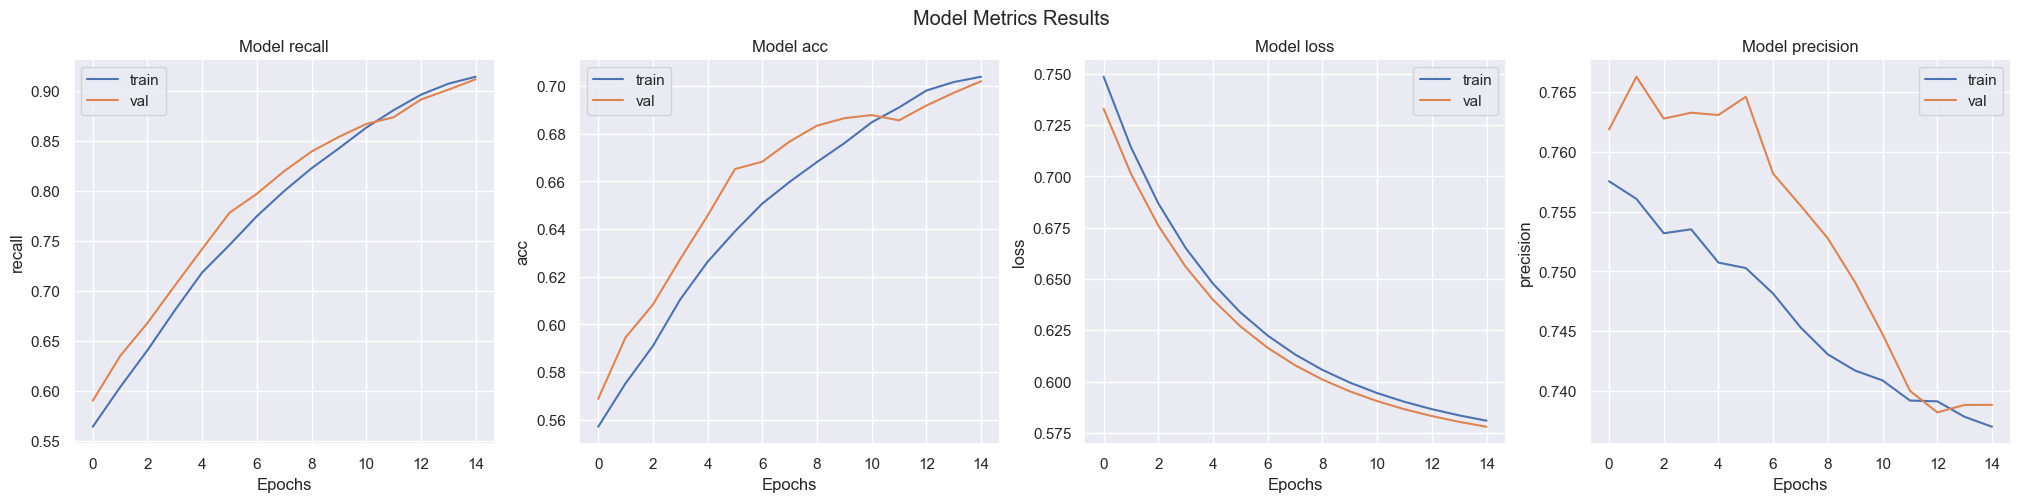

In [88]:
#Plotting Recall, Precision, F1 and Accuracy of Training and Validation
nn_eval_metrics(nn_results)

In [89]:
#Metrics
calc_metrics(y_train,nn_train_pred)

The Precision mean score is: 0.74
The Recall mean score is: 0.92
The F1  score is: 0.82
The Accuracy mean score is: 0.71




(0.7371343579573624, 0.9182312252964426, 0.817776799955998, 0.7053539665599431)

In [90]:
#Metrics
calc_metrics(y_test,nn_test_pred)

The Precision mean score is: 0.74
The Recall mean score is: 0.92
The F1  score is: 0.82
The Accuracy mean score is: 0.71




(0.7374218517415898, 0.9174074074074074, 0.817626671067833, 0.7052547345958923)

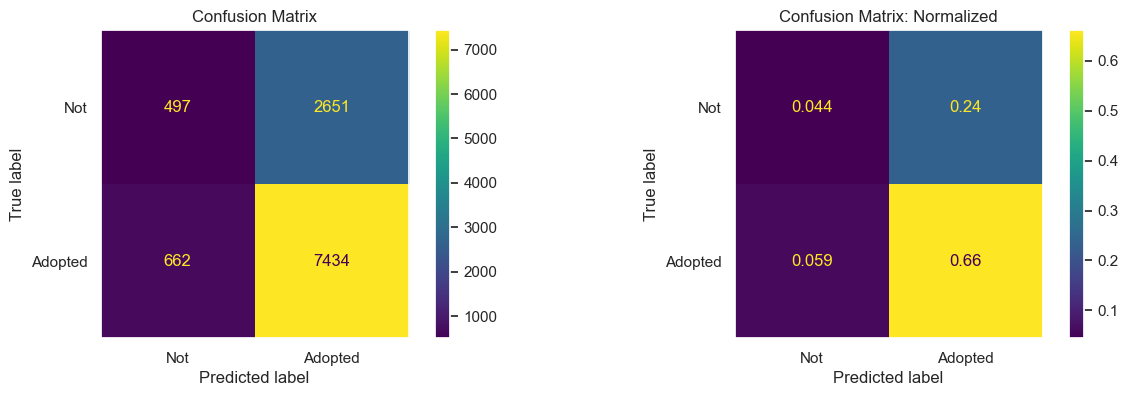

In [91]:
#Confusion Matrix
conf_matrix(y_train,nn_train_pred)

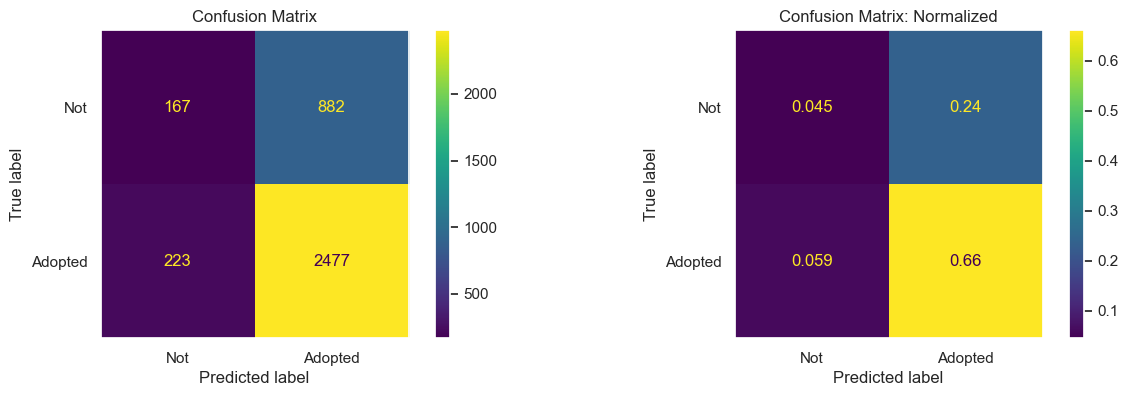

In [92]:
#Confusion Matrix
conf_matrix(y_test,nn_test_pred)

In [93]:
#Printing out Test data classification report with scores 
print("Train Classification Report:\n", classification_report(y_train,np.round(nn_train_pred,0)))
print("Test Classification Report:\n", classification_report(y_test, np.round(nn_test_pred,0)))

Train Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.16      0.23      3148
           1       0.74      0.92      0.82      8096

    accuracy                           0.71     11244
   macro avg       0.58      0.54      0.52     11244
weighted avg       0.65      0.71      0.65     11244

Test Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.16      0.23      1049
           1       0.74      0.92      0.82      2700

    accuracy                           0.71      3749
   macro avg       0.58      0.54      0.52      3749
weighted avg       0.65      0.71      0.65      3749



**Model Evaluation**
- Test  27% FP rate, with training 27% FP rate from the Confusion Matrix.
- Test 72% and training 72% precision metrics. 
- The test model performs better than the training model.
- The results are better than the KNN and LogRegression but not as good as the tree classifiers. Hypertuning would support this model peforming better than the others.

## Model Iteration 2 Hypertuning w/ SMOTE


Creating a scoring dictionary for the gridsearch.

In [94]:
#Creation of of scoring dictionary for the gridsearch scoring multimetrics
cus_rec = make_scorer(recall_score) 
cus_prec = make_scorer(precision_score)
cus_f1 =  make_scorer(f1_score)
cus_acc =  make_scorer(accuracy_score)
scoring = {"Precision":cus_prec,"Rec": cus_rec,"F1":cus_f1,"Accuracy":cus_acc}

### Logistic Regression GridsearchCV





- SMOTE Paramters: <br>
    - Sampling Strategy: Wanted to sample to increase the values for the minority class ("Not Adopted"). Chose various values for the hyperparameters that support this. <br>
- Logistic Regression:  <br>
    - Logistic Parameters Paramters Chosen:  <br>
        - Penalty:[None,"l1",'l2', 'elasticnet'] <br>
        - Sovler:["liblinear", "saga","lbfgs"]<br>
- GridSearchCV Parameters:  <br>
    - Refit: "Precision"
    - Scoring: [Precision, Recall, Accuracy]
    - n_jobs: The local computer running on 64GB of RAM, it was enough to run multiple jobs in parallel. This is part of the reason  multiple hyperparameters and values were chosen.  <br>

In [95]:
#Create pipelines with Scaling, SMOTE
lr_imb_pipe = ImPipeline(steps=[('ct', StandardScaler()),
                    ('sm', SMOTE( random_state=42)),
                    ("lr", LogisticRegression(random_state=42))])
    
#fitting the pipeline on the training data
_,_,_,_=fit_pred(lr_imb_pipe)

In [96]:
#Logistic Regression parameters and GridSearch instantiation
parameters = {"sm__sampling_strategy":["minority",.2,.6],
                      'lr__penalty': [None,"l1",'l2', 'elasticnet'],
                      'lr__solver': ["liblinear", "saga","lbfgs"]}


In [97]:
#Create pipelines with Scaling, SMOTE
lr_imb_pipe = ImPipeline(steps=[('ct', StandardScaler()),
                    ('sm', SMOTE( random_state=42)),
                    ("lr", LogisticRegression(random_state=42))])
    

In [98]:
gs_lr = GridSearchCV(lr_imb_pipe,param_grid=parameters,
                           refit = "Precision",n_jobs=-1,
                            scoring=scoring, return_train_score = True )
start = time.time()
gs_lr.fit(X_train, y_train)
end = time.time()
print("Sklearn Fit Time:", end - start)
print(gs_lr.best_params_)

Sklearn Fit Time: 2.2351489067077637
{'lr__penalty': 'l1', 'lr__solver': 'liblinear', 'sm__sampling_strategy': 'minority'}


In [99]:
gs_lr_train_pred,_,gs_lr_test_pred,_=fit_pred(gs_lr.best_estimator_,)

**Smote value count**

Retrieveing the new value counts of y_train when applying SMOTE. These will be the same for all models using gridsearch except the neural net.

In [100]:
#Getting new value counts of of y_train when using SMOTE to oversample.  
X_resample, y_resample = lr_imb_pipe.steps[1][1].fit_resample(X_train,y_train)


In [101]:
#Old Vs New Value Counts
print("Original Value Counts:\n",y_train.value_counts())
print("\n")
print("New Value Counts:\n",y_resample.value_counts())
#Equal 

Original Value Counts:
 1    8096
0    3148
Name: AdoptionSpeed, dtype: int64


New Value Counts:
 1    8096
0    8096
Name: AdoptionSpeed, dtype: int64


In [102]:
#Printing out Test data classification report with scores 
print("Train Classification Report:\n", classification_report(y_train,gs_lr_train_pred))
print("Test Classification Report:\n", classification_report(y_test, gs_lr_test_pred))

Train Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.63      0.48      3148
           1       0.81      0.62      0.70      8096

    accuracy                           0.62     11244
   macro avg       0.60      0.62      0.59     11244
weighted avg       0.69      0.62      0.64     11244

Test Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.62      0.47      1049
           1       0.81      0.61      0.70      2700

    accuracy                           0.62      3749
   macro avg       0.60      0.62      0.59      3749
weighted avg       0.69      0.62      0.63      3749



Train Confusion Matrix:



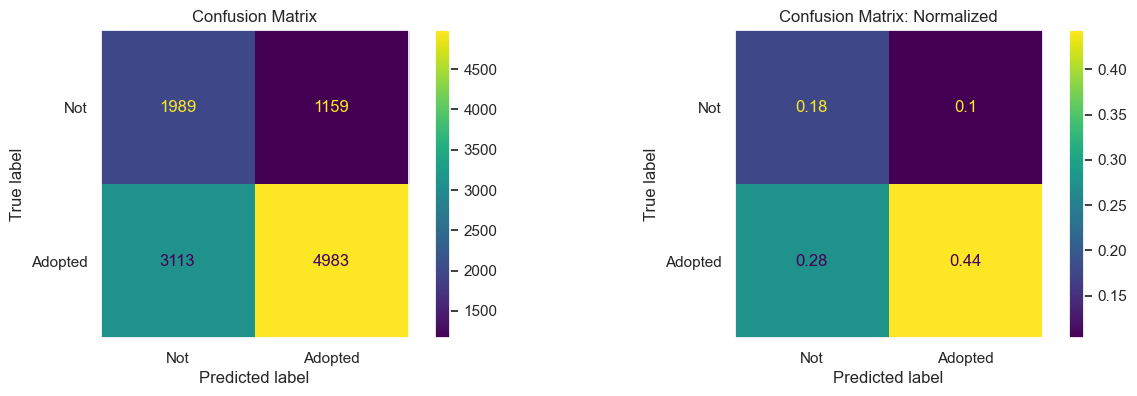

In [103]:
#Confusion Matrix
print("Train Confusion Matrix:\n")
conf_matrix(y_train,gs_lr_train_pred )


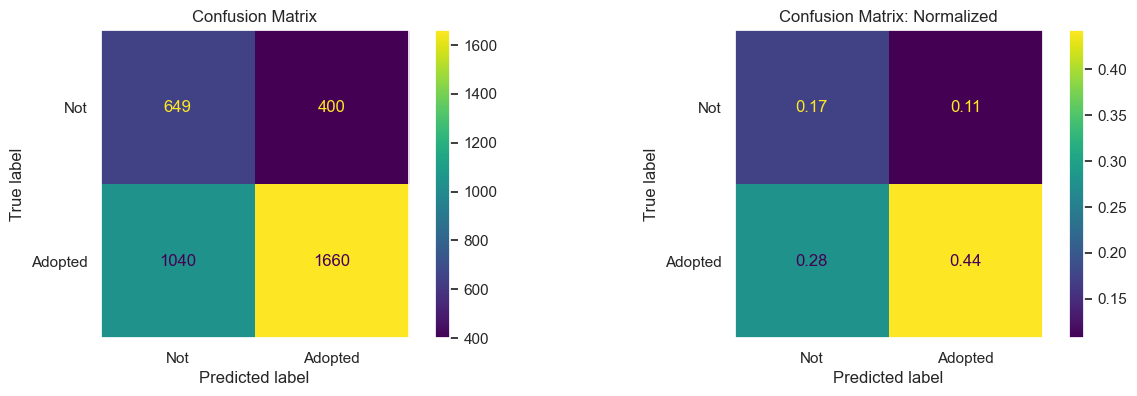

In [104]:
#Confusion Matrix
conf_matrix(y_test,gs_lr_test_pred)

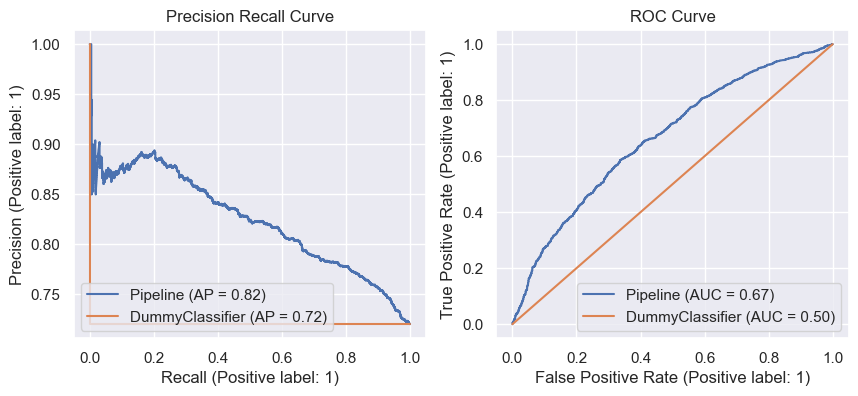

In [105]:
#Print Precision/Recall and AUC Score
plot_curves(gs_lr.best_estimator_,X_test,y_test)

**Model Evaluation**
- They both have an average of 11% FP rate from the Confusion Matrix. This is a decreaseD FP from baseline.
- Test and training precision metrics of 73% are very similar.
- The model performs better (82%) than the base Dummy Classifier (~72%)
- One of the bestmodes, based on performance and FP percentage

### KNN GridsearchCV

[Best KNN Parameters,ARUNIM SAMUDRA,2020](https://www.kaggle.com/code/arunimsamudra/k-nn-with-hyperparameter-tuning)

- SMOTE Paramters: <br>
    - Sampling Strategy: Wanted to sample to increase the values for the minority class ("Not Adopted"). Chose various values for the hyperparameters that support this. <br>
- KNN:  <br>
    -  Hyperparameters Chosen:  <br>
        - N-neighbors: [5,10,15]
        - Weights:["uniform", "distance" ] <br>
        - Metrics:['minkowski','euclidean']<br>
- GridSearchCV Parameters :  <br>
    - Refit: "Precision"
    - Scoring: [Precision, Recall, Accuracy]
    - n_jobs: The local computer running on 64GB of RAM, it was enough to run multiple jobs in parallel. This is part of the reason  multiple hyperparameters and values were chosen.  <br>

In [106]:
#Create pipelines with Scaling, SMOTE
knn_imb_pipe = ImPipeline(steps=[('ct', StandardScaler()),
                    ('sm', SMOTE( random_state=42)),
                    ("knn", KNeighborsClassifier())])

In [107]:
#Logistic Regression parameters and GridSearch instantiation
parameters = {"sm__sampling_strategy":["minority",.2,.6],
                      'knn__n_neighbors': [5,10,15],
                      'knn__weights': ["uniform", "distance" ],
                      'knn__metric': ['minkowski','euclidean']}

gs_knn = GridSearchCV(knn_imb_pipe,param_grid=parameters,
                           refit = "Precision",
                            scoring=scoring, return_train_score = True )

In [108]:
start = time.time()
gs_knn.fit(X_train, y_train)
end = time.time()
print("Sklearn Fit Time:", end - start)
print(gs_knn.best_params_)

Sklearn Fit Time: 22.074202060699463
{'knn__metric': 'minkowski', 'knn__n_neighbors': 10, 'knn__weights': 'uniform', 'sm__sampling_strategy': 'minority'}


In [109]:
gs_knn_train_pred,_,gs_knn_test_pred,_=fit_pred(gs_knn.best_estimator_,)

In [110]:
#Printing out Test data classification report with scores 
print("Train Classification Report:\n", classification_report(y_train,gs_knn_train_pred))
print("Test Classification Report:\n", classification_report(y_test, gs_knn_test_pred))

Train Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.85      0.61      3148
           1       0.92      0.63      0.74      8096

    accuracy                           0.69     11244
   macro avg       0.69      0.74      0.68     11244
weighted avg       0.79      0.69      0.71     11244

Test Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.68      0.48      1049
           1       0.82      0.55      0.66      2700

    accuracy                           0.59      3749
   macro avg       0.60      0.62      0.57      3749
weighted avg       0.69      0.59      0.61      3749



Train Confusion Matrix:



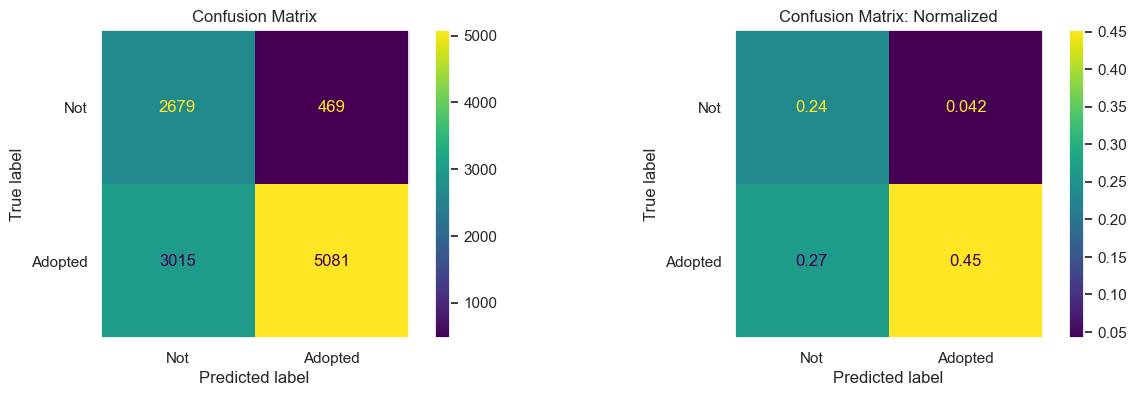

In [111]:
#Confusion Matrix
print("Train Confusion Matrix:\n")
conf_matrix(y_train,gs_knn_train_pred )

Test Confusion Matrix:



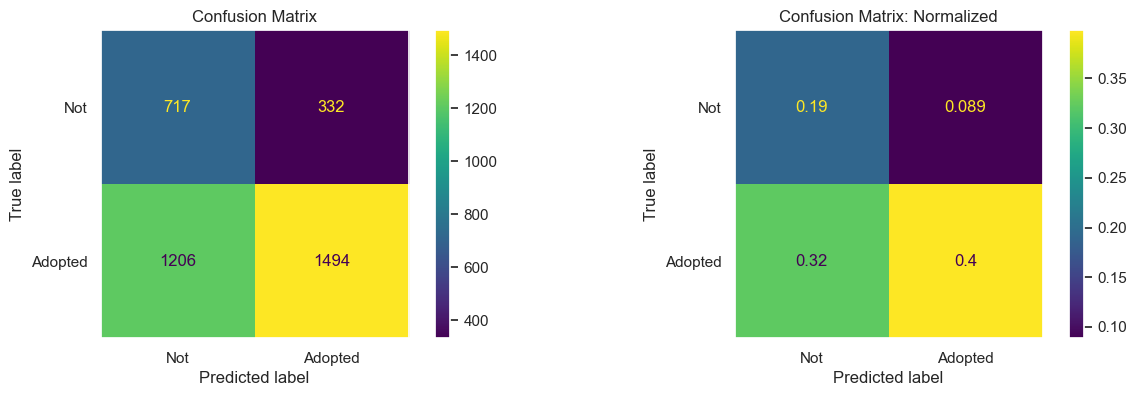

In [112]:
#Confusion Matrix
print("Test Confusion Matrix:\n")
conf_matrix(y_test,gs_knn_test_pred)

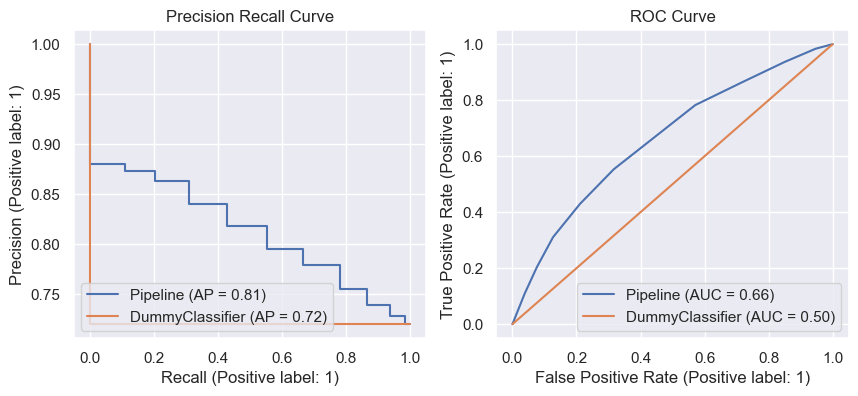

In [113]:
#Print Precision/Recall and AUC Curve
plot_curves(gs_knn.best_estimator_,X_test,y_test)

**Model Evaluation**
- They both have an average of 11% FP rate from the Confusion Matrix. This is a decrease FP from baseline.
- Test and training precision metrics of 73% are very similar.
- The model performs better (82%) than the base Dummy Classifier (~72%)


### XGBoost GridsearchCV

[XGBoost Hyp, Mahbubul Alam,2021](https://towardsdatascience.com/a-guide-to-xgboost-hyperparameters-87980c7f44a9)

- SMOTE Paramters: <br>
    - Sampling Strategy: Wanted to sample to increase the values for the minority class ("Not Adopted"). Chose various values for the hyperparameters that support this. <br>
- XGBoost:  <br>
    - Hyperparameters Chosen:  <br>
        - N-estimators: [20,40,120]<br>
        - Max_depth:[6,9,12,]<br>
        - Learning_rate:[.01,.1,] <br>
        - Gamma:[3,5,6]<br>
- GridSearchCV Parameters :  <br>
    - Refit: "Precision"
    - Scoring: [Precision, Recall, Accuracy]
    - n_jobs: The local computer running on 64GB of RAM, it was enough to run multiple jobs in parallel. This is part of the reason  multiple hyperparameters and values were chosen.  <br>

In [114]:
#Create pipelines with Scaling, SMOTE
xgb_imb_pipe = ImPipeline(steps=[('ct', StandardScaler()),
                    ('sm', SMOTE( random_state=42)),
                    ("xgb", XGBClassifier(random_state=42))])

In [115]:
#Logistic Regression parameters and GridSearch instantiation
parameters = {"sm__sampling_strategy":["minority",.2],
                      'xgb__n_estimators': [20,40,120],
                      'xgb__max_depth': [6,9,12,],
                      'xgb__learning_rate': [.01,.1,],
                      'xgb__gamma': [3,5,6]}

gs_xgb = GridSearchCV(xgb_imb_pipe,param_grid=parameters,
                           refit = "Precision",n_jobs=-1,
                            scoring=scoring, return_train_score = True )

In [116]:
start = time.time()
gs_xgb.fit(X_train, y_train)
end = time.time()
print("Sklearn Fit Time:", end - start)
print(gs_xgb.best_params_)

Sklearn Fit Time: 38.52939009666443
{'sm__sampling_strategy': 'minority', 'xgb__gamma': 3, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 6, 'xgb__n_estimators': 120}


In [117]:
gs_xgb_train_pred,_,gs_xgb_test_pred,_=fit_pred(gs_xgb.best_estimator_,)

In [118]:
#Printing out Test data classification report with scores 
print("Train Classification Report:\n", classification_report(y_train,gs_xgb_train_pred))
print("Test Classification Report:\n", classification_report(y_test, gs_xgb_test_pred))

Train Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.58      0.55      3148
           1       0.83      0.80      0.81      8096

    accuracy                           0.74     11244
   macro avg       0.68      0.69      0.68     11244
weighted avg       0.74      0.74      0.74     11244

Test Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.53      0.51      1049
           1       0.81      0.78      0.80      2700

    accuracy                           0.71      3749
   macro avg       0.65      0.66      0.65      3749
weighted avg       0.72      0.71      0.72      3749



Train Confusion Matrix:



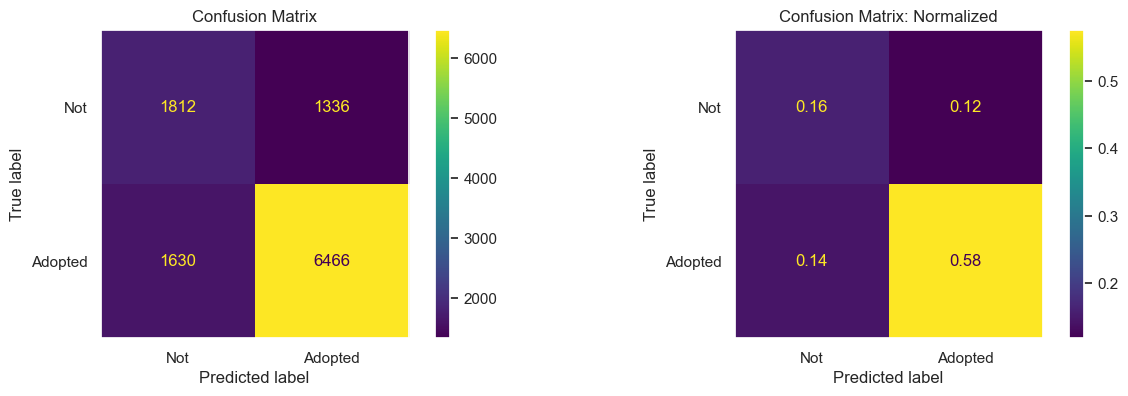

In [119]:
#Confusion Matrix
print("Train Confusion Matrix:\n")
conf_matrix(y_train,gs_xgb_train_pred )

Test Confusion Matrix:



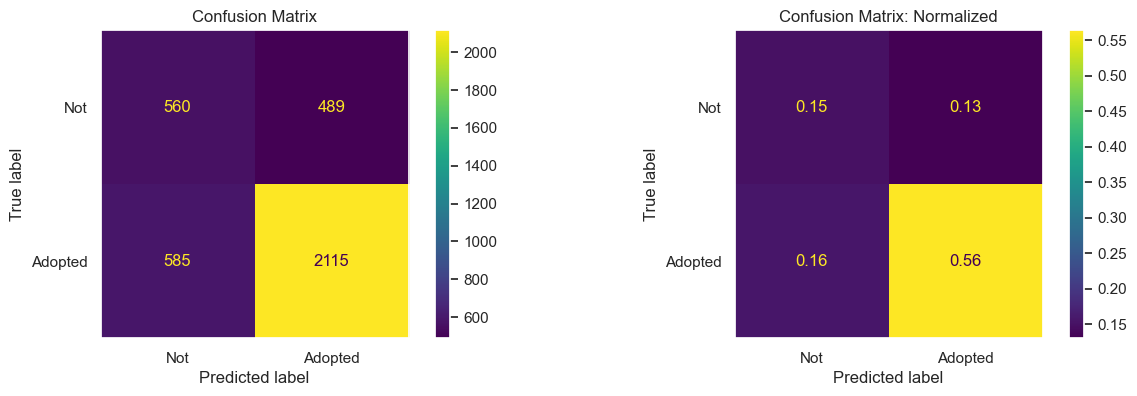

In [120]:
#Confusion Matrix
print("Test Confusion Matrix:\n")
conf_matrix(y_test,gs_xgb_test_pred)

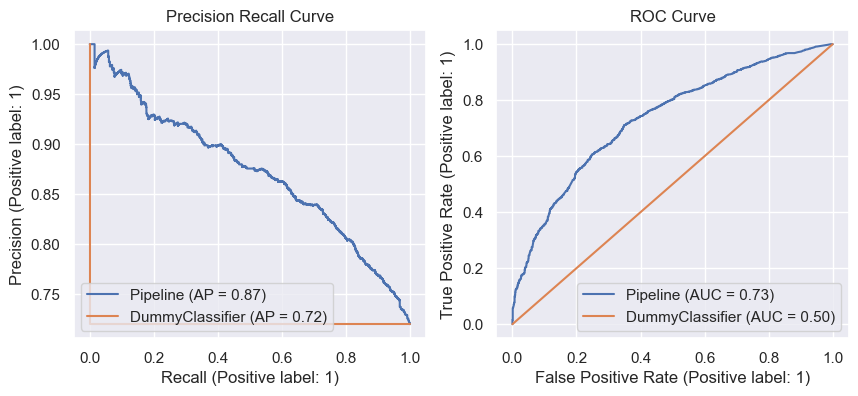

In [121]:
#Print Precision/Recall and AUC Curve
plot_curves(gs_xgb.best_estimator_,X_test,y_test)

**Model Evaluation**
- They both have an average of ~12% FP rate from the Confusion Matrix. This is a decreased FP from baseline.
- Test and training precision metrics of ~81% and 82% respectively
- The model performs better (87%) than the base Dummy Classifier (~72%)
- The best modeol based on performance and FP and FN percentage  

### Random Forest GridsearchCV

- SMOTE Paramters: <br>
    - Sampling Strategy: Wanted to sample to increase the values for the minority class ("Not Adopted"). Chose various values for the hyperparameters that support this. <br>
- Random Forest:  <br>
    - Logistic Parameters Paramters Chosen:  <br>
        - N-estimators: [5,10,25,50]<br>
        - Criterion:["gini", "entropy"]<br>
        - Max_depth:[None, 5,15,25] <br>
        - Min_sample_leaf:[5,7]<br>
- GridSearchCV Parameters :  <br>
    - Refit: "Precision"
    - Scoring: [Precision, Recall, Accuracy]
    - n_jobs: The local computer running on 64GB of RAM, it was enough to run multiple jobs in parallel. This is part of the reason  multiple hyperparameters and values were chosen.  <br>

In [122]:
#Create pipelines with Scaling, SMOTE
rf_imb_pipe = ImPipeline(steps=[('ct', StandardScaler()),
                    ('sm', SMOTE( random_state=42)),
                    ("rf", RandomForestClassifier(random_state=42))])

In [123]:
#Random Forest parameters and GridSearch instantiation
parameters = {"sm__sampling_strategy":["minority",.2,.6],
                      'rf__n_estimators': [5,10,25,50],
                      'rf__criterion': ["gini", "entropy"],
                      'rf__max_depth': [None, 5,15,25],
                      'rf__min_samples_leaf': [5,7]}


gs_rf = GridSearchCV(rf_imb_pipe,param_grid=parameters,
                           refit = "Precision",n_jobs=-1,
                            scoring=scoring, return_train_score = True )

In [124]:
start = time.time()
gs_rf.fit(X_train, y_train)
end = time.time()
print(" Fit Time:", end - start)
print(gs_rf.best_params_)

 Fit Time: 13.532716751098633
{'rf__criterion': 'gini', 'rf__max_depth': 5, 'rf__min_samples_leaf': 5, 'rf__n_estimators': 10, 'sm__sampling_strategy': 'minority'}


In [125]:
gs_rf_train_pred,_,gs_rf_test_pred,_=fit_pred(gs_rf.best_estimator_)

In [126]:
#Printing out Test data classification report with scores 
print("Train Classification Report:\n", classification_report(y_train,gs_rf_train_pred))
print("Test Classification Report:\n", classification_report(y_test, gs_rf_test_pred))

Train Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.60      0.53      3148
           1       0.83      0.74      0.78      8096

    accuracy                           0.70     11244
   macro avg       0.65      0.67      0.65     11244
weighted avg       0.73      0.70      0.71     11244

Test Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.59      0.51      1049
           1       0.82      0.73      0.77      2700

    accuracy                           0.69      3749
   macro avg       0.64      0.66      0.64      3749
weighted avg       0.72      0.69      0.70      3749



Train Confusion Matrix:



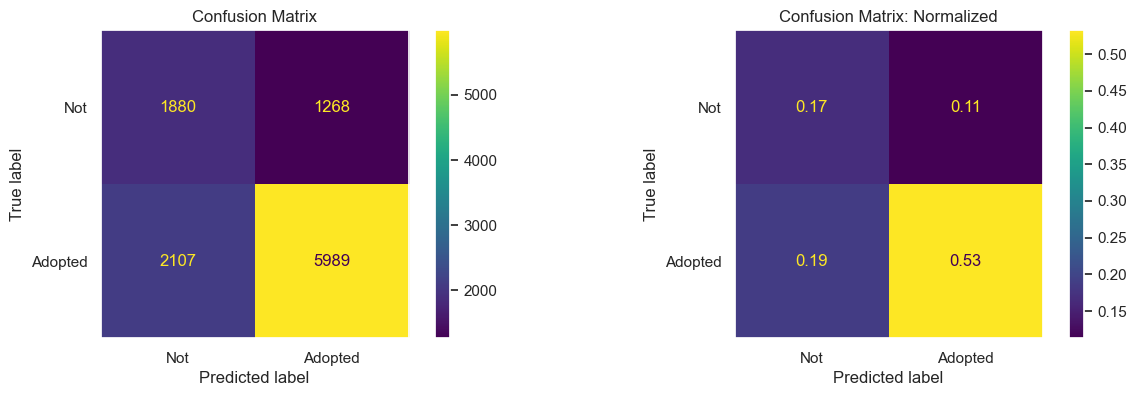

In [127]:
#Confusion Matrix
print("Train Confusion Matrix:\n")
conf_matrix(y_train,gs_rf_train_pred )

Test Confusion Matrix:



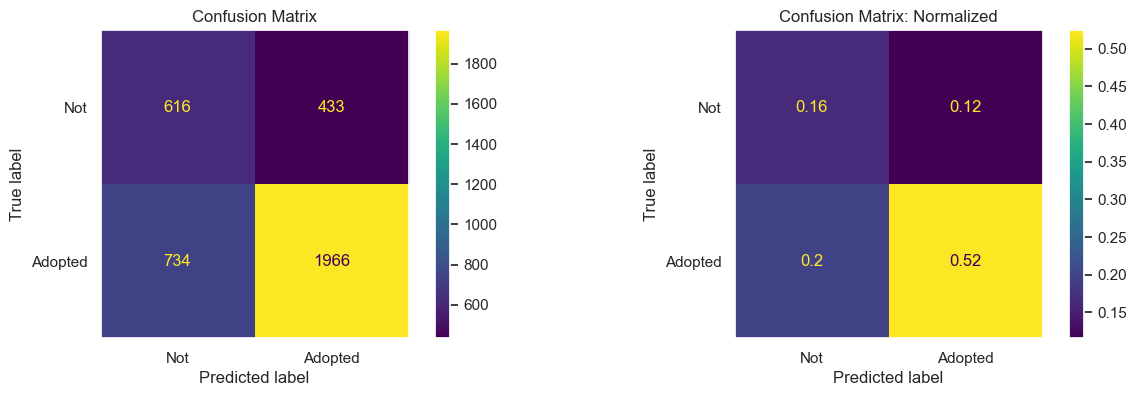

In [128]:
#Confusion Matrix
print("Test Confusion Matrix:\n")
conf_matrix(y_test,gs_rf_test_pred)

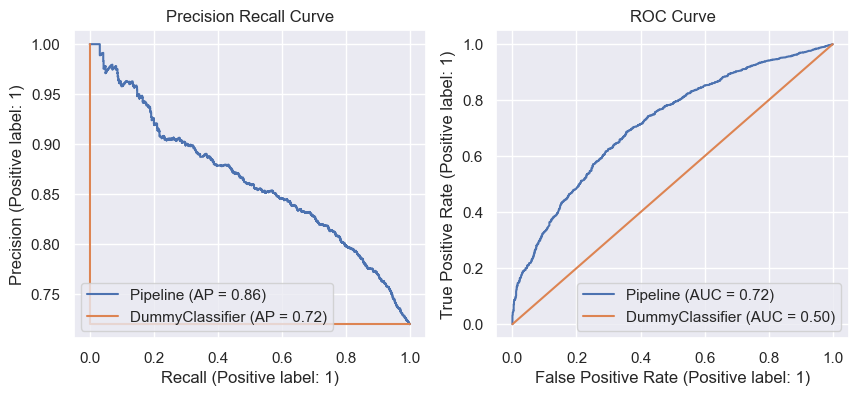

In [129]:
#Print Precision/Recall and AUC Curve
plot_curves(gs_rf.best_estimator_,X_test,y_test)

**Model Evaluation**
- They both have an average of ~12% FP rate from the Confusion Matrix. This is a decrease FP from baseline.
- Test and training precision metrics of ~82% and 83% respectively
- The model performs better (75%) than the base Dummy Classifier (~72%)
- The baseline Random Forest model performs better. This is only a little better than the Dummy Classifier. 

### Neural Net GridsearchCV


[Gridsearch Keras, Jason Brownlee, 2022](https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/)<br>
[Gridsearch NN,AARYN DHOR, 2020](https://www.kaggle.com/code/aaryandhore/neural-network-gridsearchcv-explanations/notebook) <br>
[Hyperparamters, Rukshan Pramoditha, 2022](https://towardsdatascience.com/classification-of-neural-network-hyperparameters-c7991b6937c3)

- SMOTE Parameters: No SMOTE was used here. Class_Weight:{1: 0.6944169960474308, 0: 1.7858958068614994}<br>
- Neural Net:  <br>
    - Layers:
        - Dense Layer (10)
            - Activation: "tanh"
        - Dense Layer (10)
            - Activation: "relu"
        - Dense Layer (10)
            - Activation: "sigmoid"
    - Hyperparamters Chosen:  <br>
        - Dropout_rate: [.3,.5]<br>
        - learning_rate:  [.0001,.001]<br>
        - Epoch: [None, 5,15,25] <br>
        - BatchSize:[5,7]<br>
        - Optimizer: SGD <br>
        - Loss: Binary Cross Entropy <br>
        - Metrics: ["acc","Recall","Precision"]
- GridSearchCV Parameters :  <br>
    - Refit: "Acc"
    - Scoring: "Accuracy"
    - n_jobs: The local computer running on 64GB of RAM, it was enough to run multiple jobs in parallel. This is part of the reason  multiple hyperparameters and values were chosen.  <br>

In [130]:
def buildModel(dropout_rate,learning_rate):
    model = models.Sequential(
        [
    Dense(10, activation='tanh',input_shape=(19,)),
    Dropout(dropout_rate),
    Dense(10, activation='relu'),
    Dropout(dropout_rate),
    Dense(1, activation='sigmoid')
        ]
    )
    
    model.compile(loss='binary_crossentropy',
                    optimizer= SGD(learning_rate = learning_rate),
                    metrics=["acc","Recall","Precision"]
                     )
    return model

In [131]:
#Hyperparameters for GridsearchCV
dropout_rate = [.3,.5]
learning_rate = [.0001,.001]

#Creating a dictionary to use as parameters
parameters = dict(dropout_rate=dropout_rate , learning_rate=learning_rate )
parameters

{'dropout_rate': [0.3, 0.5], 'learning_rate': [0.0001, 0.001]}

In [132]:
classes = [1,0]
weights = compute_class_weight(class_weight='balanced', classes=classes,  y=y_train)
class_weights = dict(zip(classes, weights))
class_weights

{1: 0.6944169960474308, 0: 1.7858958068614994}

In [133]:
#Creating a wrapped classifier
classifier = KerasClassifier(build_fn=buildModel, class_weight = class_weights,epochs=45, batch_size = 100)

#Gridsearch Creation
gs_nn = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           refit = "Acc",
                           scoring = "accuracy",n_jobs=-1,

                     cv = 3,return_train_score=True)
#Gridsearch Fitting
start = time.time()
gs_nn.fit(scaled_data_train, y_train,)
end = time.time()
print("Gridsearch Fit Time:", end - start)
print(gs_nn.best_params_)

Metal device set to: Apple M2 Max
Metal device set to: Apple M2 Max
Metal device set to: Apple M2 Max
Metal device set to: Apple M2 Max


2023-04-06 04:14:17.808585: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-06 04:14:17.808711: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-04-06 04:14:17.833844: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-06 04:14:17.833999: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL,

Epoch 1/45
Epoch 1/45
Metal device set to: Apple M2 Max
Metal device set to: Apple M2 Max
Epoch 1/45
Epoch 1/45
Metal device set to: Apple M2 Max
Metal device set to: Apple M2 Max
Metal device set to: Apple M2 Max
Metal device set to: Apple M2 Max
Metal device set to: Apple M2 Max
Metal device set to: Apple M2 Max
Epoch 1/45
Epoch 1/45


2023-04-06 04:14:18.257718: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-06 04:14:18.257851: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-04-06 04:14:18.284339: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-06 04:14:18.284477: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL,

Epoch 1/45
Epoch 1/45
Epoch 1/45
Epoch 1/45


2023-04-06 04:14:18.498730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-06 04:14:18.532776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-06 04:14:18.534871: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-06 04:14:18.608876: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-06 04:14:18.643677: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-06 04:14:18.656808: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-06 04:14:18.681267: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/45
Epoch 1/45
 1/75 [..............................] - ETA: 50s - loss: 1.0791 - acc: 0.4800 - recall: 0.5588 - precision: 0.6333

2023-04-06 04:14:18.753975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-06 04:14:18.835335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


15/75 [=====>........................] - ETA: 1s - loss: 0.8188 - acc: 0.5440 - recall: 0.6053 - precision: 0.7093

2023-04-06 04:14:18.980710: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-06 04:14:18.988312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-06 04:14:19.051589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-06 04:14:19.139526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-06 04:14:19.157077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-06 04:14:19.165218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 2s 22ms/step - loss: 0.8249 - acc: 0.5680 - recall: 0.6492 - precision: 0.7231
Epoch 2/45
75/75 [==============================] - 3s 24ms/step - loss: 0.8294 - acc: 0.5366 - recall: 0.5954 - precision: 0.7108
Epoch 2/45
75/75 [==============================] - 3s 25ms/step - loss: 1.0865 - acc: 0.4907 - recall: 0.5316 - precision: 0.6868
Epoch 2/45
75/75 [==============================] - 3s 37ms/step - loss: 0.8264 - acc: 0.5776 - recall: 0.6568 - precision: 0.7316
Epoch 2/45
75/75 [==============================] - 3s 35ms/step - loss: 0.8275 - acc: 0.5735 - recall: 0.6477 - precision: 0.7272
Epoch 2/45
75/75 [==============================] - 4s 35ms/step - loss: 0.9340 - acc: 0.5511 - recall: 0.5983 - precision: 0.7318
Epoch 2/45
75/75 [==============================] - 3s 34ms/step - loss: 0.9398 - acc: 0.5332 - recall: 0.5574 - precision: 0.7310
Epoch 2/45
75/75 [==============================] - 2s 23ms/step - loss: 0.8165 - acc: 0.5303 

75/75 [==============================] - 2s 26ms/step - loss: 0.8009 - acc: 0.5264 - recall: 0.5649 - precision: 0.7144
Epoch 6/45
75/75 [==============================] - 2s 25ms/step - loss: 0.9023 - acc: 0.5120 - recall: 0.5483 - precision: 0.7106
Epoch 5/45
75/75 [==============================] - 2s 27ms/step - loss: 0.8188 - acc: 0.5732 - recall: 0.6449 - precision: 0.7283
Epoch 6/45
75/75 [==============================] - 2s 27ms/step - loss: 0.8969 - acc: 0.5260 - recall: 0.5476 - precision: 0.7273
Epoch 6/45
75/75 [==============================] - 2s 29ms/step - loss: 0.9434 - acc: 0.5519 - recall: 0.6010 - precision: 0.7313
Epoch 6/45
75/75 [==============================] - 2s 28ms/step - loss: 0.9075 - acc: 0.5060 - recall: 0.5377 - precision: 0.7087
Epoch 6/45
75/75 [==============================] - 2s 29ms/step - loss: 1.0042 - acc: 0.5460 - recall: 0.5870 - precision: 0.7268
Epoch 6/45
75/75 [==============================] - 2s 27ms/step - loss: 0.8056 - acc: 0.5772 

75/75 [==============================] - 2s 28ms/step - loss: 0.8152 - acc: 0.5679 - recall: 0.6501 - precision: 0.7225
Epoch 10/45
75/75 [==============================] - 2s 28ms/step - loss: 0.8141 - acc: 0.5778 - recall: 0.6509 - precision: 0.7348
Epoch 9/45
75/75 [==============================] - 2s 27ms/step - loss: 0.9637 - acc: 0.5245 - recall: 0.5681 - precision: 0.7137
Epoch 10/45
75/75 [==============================] - 2s 29ms/step - loss: 0.9413 - acc: 0.5471 - recall: 0.5964 - precision: 0.7279
Epoch 9/45
75/75 [==============================] - 2s 29ms/step - loss: 0.7765 - acc: 0.5362 - recall: 0.5684 - precision: 0.7302
Epoch 10/45
Epoch 9/45
75/75 [==============================] - 2s 28ms/step - loss: 0.9165 - acc: 0.4692 - recall: 0.4833 - precision: 0.6832
Epoch 10/45
75/75 [==============================] - 2s 27ms/step - loss: 0.8699 - acc: 0.5035 - recall: 0.5292 - precision: 0.7101
Epoch 9/45
75/75 [==============================] - 2s 26ms/step - loss: 0.9644

75/75 [==============================] - 2s 33ms/step - loss: 0.8110 - acc: 0.5700 - recall: 0.6392 - precision: 0.7276
Epoch 13/45
75/75 [==============================] - 2s 30ms/step - loss: 0.7645 - acc: 0.5315 - recall: 0.5471 - precision: 0.7370
Epoch 13/45
75/75 [==============================] - 3s 34ms/step - loss: 0.8296 - acc: 0.5011 - recall: 0.5139 - precision: 0.7158
Epoch 13/45
75/75 [==============================] - 2s 26ms/step - loss: 0.8098 - acc: 0.5728 - recall: 0.6516 - precision: 0.7273
Epoch 15/45
75/75 [==============================] - 2s 27ms/step - loss: 0.8131 - acc: 0.5608 - recall: 0.6286 - precision: 0.7224
Epoch 14/45
75/75 [==============================] - 2s 27ms/step - loss: 0.8241 - acc: 0.5100 - recall: 0.5085 - precision: 0.7296
Epoch 14/45
75/75 [==============================] - 2s 29ms/step - loss: 0.9972 - acc: 0.5463 - recall: 0.5880 - precision: 0.7266
Epoch 14/45
75/75 [==============================] - 2s 27ms/step - loss: 0.7607 - acc: 

75/75 [==============================] - 2s 27ms/step - loss: 0.8197 - acc: 0.5687 - recall: 0.6403 - precision: 0.7299
Epoch 16/45
75/75 [==============================] - 2s 28ms/step - loss: 0.9876 - acc: 0.5391 - recall: 0.5781 - precision: 0.7231
Epoch 15/45
75/75 [==============================] - 2s 27ms/step - loss: 0.7648 - acc: 0.5023 - recall: 0.5098 - precision: 0.7138
Epoch 17/45
75/75 [==============================] - 2s 28ms/step - loss: 0.9282 - acc: 0.5476 - recall: 0.5907 - precision: 0.7318
Epoch 16/45
75/75 [==============================] - 2s 29ms/step - loss: 0.8470 - acc: 0.4636 - recall: 0.4563 - precision: 0.6900
Epoch 17/45
75/75 [==============================] - 2s 29ms/step - loss: 0.7559 - acc: 0.5247 - recall: 0.5447 - precision: 0.7292
Epoch 16/45
75/75 [==============================] - 2s 27ms/step - loss: 0.7557 - acc: 0.5057 - recall: 0.5057 - precision: 0.7212
Epoch 18/45
75/75 [==============================] - 2s 29ms/step - loss: 0.8084 - acc: 

75/75 [==============================] - 2s 30ms/step - loss: 0.7463 - acc: 0.5400 - recall: 0.5594 - precision: 0.7389
Epoch 19/45
75/75 [==============================] - 2s 26ms/step - loss: 0.7388 - acc: 0.5402 - recall: 0.5468 - precision: 0.7494
Epoch 19/45
75/75 [==============================] - 2s 26ms/step - loss: 0.8113 - acc: 0.5666 - recall: 0.6448 - precision: 0.7237
Epoch 21/45
75/75 [==============================] - 2s 29ms/step - loss: 0.7998 - acc: 0.4899 - recall: 0.4949 - precision: 0.7116
Epoch 19/45
75/75 [==============================] - 2s 27ms/step - loss: 0.9788 - acc: 0.5334 - recall: 0.5749 - precision: 0.7176
Epoch 19/45
75/75 [==============================] - 2s 28ms/step - loss: 0.8071 - acc: 0.5696 - recall: 0.6372 - precision: 0.7327
Epoch 20/45
75/75 [==============================] - 2s 29ms/step - loss: 0.8111 - acc: 0.5572 - recall: 0.6206 - precision: 0.7224
Epoch 20/45
75/75 [==============================] - 2s 29ms/step - loss: 0.8241 - acc: 

75/75 [==============================] - 3s 34ms/step - loss: 0.7860 - acc: 0.4933 - recall: 0.4885 - precision: 0.7207
Epoch 22/45
75/75 [==============================] - 2s 29ms/step - loss: 0.9278 - acc: 0.5412 - recall: 0.5817 - precision: 0.7290
Epoch 23/45
75/75 [==============================] - 2s 27ms/step - loss: 0.7820 - acc: 0.5031 - recall: 0.4876 - precision: 0.7335
Epoch 23/45
75/75 [==============================] - 2s 26ms/step - loss: 0.7437 - acc: 0.4965 - recall: 0.4869 - precision: 0.7198
Epoch 25/45
75/75 [==============================] - 2s 26ms/step - loss: 0.7873 - acc: 0.4836 - recall: 0.4798 - precision: 0.7119
Epoch 23/45
75/75 [==============================] - 2s 25ms/step - loss: 0.9588 - acc: 0.5380 - recall: 0.5818 - precision: 0.7197
Epoch 23/45
75/75 [==============================] - 2s 25ms/step - loss: 0.7968 - acc: 0.4516 - recall: 0.4245 - precision: 0.6909
Epoch 25/45
75/75 [==============================] - 2s 24ms/step - loss: 0.9131 - acc: 

75/75 [==============================] - 2s 28ms/step - loss: 0.7432 - acc: 0.4996 - recall: 0.4876 - precision: 0.7239
Epoch 28/45
75/75 [==============================] - 2s 28ms/step - loss: 0.7304 - acc: 0.5470 - recall: 0.5585 - precision: 0.7490
Epoch 26/45
75/75 [==============================] - 2s 27ms/step - loss: 0.8144 - acc: 0.5515 - recall: 0.6137 - precision: 0.7192
Epoch 26/45
75/75 [==============================] - 2s 27ms/step - loss: 0.7951 - acc: 0.4536 - recall: 0.4262 - precision: 0.6930
Epoch 28/45
75/75 [==============================] - 2s 31ms/step - loss: 0.8037 - acc: 0.5642 - recall: 0.6387 - precision: 0.7240
Epoch 29/45
75/75 [==============================] - 2s 31ms/step - loss: 0.9624 - acc: 0.5371 - recall: 0.5762 - precision: 0.7216
Epoch 29/45
Epoch 26/45
59/75 [======================>.......] - ETA: 0s - loss: 0.7750 - acc: 0.4534 - recall: 0.4171 - precision: 0.7040Epoch 27/45
Epoch 27/45
75/75 [==============================] - 2s 33ms/step - lo

75/75 [==============================] - 2s 29ms/step - loss: 0.7252 - acc: 0.5168 - recall: 0.5154 - precision: 0.7371
Epoch 29/45
75/75 [==============================] - 2s 24ms/step - loss: 0.8092 - acc: 0.5604 - recall: 0.6346 - precision: 0.7218
Epoch 32/45
75/75 [==============================] - 2s 30ms/step - loss: 0.9248 - acc: 0.5320 - recall: 0.5711 - precision: 0.7233
Epoch 30/45
75/75 [==============================] - 2s 27ms/step - loss: 0.7445 - acc: 0.4908 - recall: 0.4804 - precision: 0.7155
Epoch 32/45
75/75 [==============================] - 2s 27ms/step - loss: 0.8088 - acc: 0.5622 - recall: 0.6289 - precision: 0.7238
Epoch 30/45
75/75 [==============================] - 2s 24ms/step - loss: 0.7788 - acc: 0.4358 - recall: 0.3984 - precision: 0.6820
Epoch 32/45
75/75 [==============================] - 2s 31ms/step - loss: 0.7620 - acc: 0.4900 - recall: 0.4689 - precision: 0.7264
Epoch 30/45
75/75 [==============================] - 2s 26ms/step - loss: 0.7278 - acc: 

75/75 [==============================] - 2s 25ms/step - loss: 0.7986 - acc: 0.5718 - recall: 0.6346 - precision: 0.7366
Epoch 33/45
75/75 [==============================] - 2s 28ms/step - loss: 0.8018 - acc: 0.5642 - recall: 0.6337 - precision: 0.7266
Epoch 36/45
75/75 [==============================] - 2s 30ms/step - loss: 0.7471 - acc: 0.5100 - recall: 0.4854 - precision: 0.7459
Epoch 33/45
75/75 [==============================] - 2s 27ms/step - loss: 0.9427 - acc: 0.5152 - recall: 0.5476 - precision: 0.7131
Epoch 36/45
75/75 [==============================] - 2s 27ms/step - loss: 0.7300 - acc: 0.4961 - recall: 0.4809 - precision: 0.7231
Epoch 36/45
75/75 [==============================] - 2s 28ms/step - loss: 0.7636 - acc: 0.4772 - recall: 0.4626 - precision: 0.7134
Epoch 33/45
75/75 [==============================] - 2s 27ms/step - loss: 0.7569 - acc: 0.4428 - recall: 0.3951 - precision: 0.6957
Epoch 36/45
75/75 [==============================] - 2s 28ms/step - loss: 0.8000 - acc: 

75/75 [==============================] - 2s 27ms/step - loss: 0.8014 - acc: 0.5607 - recall: 0.6166 - precision: 0.7286
Epoch 37/45
75/75 [==============================] - 2s 27ms/step - loss: 0.8025 - acc: 0.5703 - recall: 0.6344 - precision: 0.7349
Epoch 37/45
75/75 [==============================] - 2s 25ms/step - loss: 0.7905 - acc: 0.5636 - recall: 0.6324 - precision: 0.7267
Epoch 40/45
75/75 [==============================] - 2s 26ms/step - loss: 0.7338 - acc: 0.4895 - recall: 0.4718 - precision: 0.7191
Epoch 40/45
75/75 [==============================] - 2s 28ms/step - loss: 0.9298 - acc: 0.5334 - recall: 0.5701 - precision: 0.7203
Epoch 37/45
75/75 [==============================] - 2s 29ms/step - loss: 0.8054 - acc: 0.5487 - recall: 0.6094 - precision: 0.7181
Epoch 38/45
75/75 [==============================] - 2s 28ms/step - loss: 0.7908 - acc: 0.5694 - recall: 0.6362 - precision: 0.7313
Epoch 41/45
Epoch 41/45
75/75 [==============================] - 2s 27ms/step - loss: 0.

75/75 [==============================] - 2s 28ms/step - loss: 0.7164 - acc: 0.5243 - recall: 0.5165 - precision: 0.7452
Epoch 40/45
75/75 [==============================] - 2s 29ms/step - loss: 0.7114 - acc: 0.5207 - recall: 0.5123 - precision: 0.7450
Epoch 40/45
75/75 [==============================] - 2s 29ms/step - loss: 0.8777 - acc: 0.5388 - recall: 0.5691 - precision: 0.7332
Epoch 41/45
75/75 [==============================] - 3s 33ms/step - loss: 0.7954 - acc: 0.5686 - recall: 0.6269 - precision: 0.7370
Epoch 41/45
75/75 [==============================] - 2s 28ms/step - loss: 0.8977 - acc: 0.5131 - recall: 0.5385 - precision: 0.7154
Epoch 44/45
75/75 [==============================] - 2s 31ms/step - loss: 0.7949 - acc: 0.5548 - recall: 0.6218 - precision: 0.7219
Epoch 44/45
75/75 [==============================] - 2s 32ms/step - loss: 0.7132 - acc: 0.5340 - recall: 0.5318 - precision: 0.7488
Epoch 41/45
75/75 [==============================] - 2s 31ms/step - loss: 0.7360 - acc: 

2023-04-06 04:15:51.144403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 2s 28ms/step - loss: 0.7931 - acc: 0.5626 - recall: 0.6204 - precision: 0.7334
Epoch 43/45
59/75 [======================>.......] - ETA: 0s - loss: 0.8817 - acc: 0.5403 - recall: 0.5729 - precision: 0.7324

2023-04-06 04:15:51.646354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-06 04:15:51.676701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 2s 26ms/step - loss: 0.7405 - acc: 0.4831 - recall: 0.4575 - precision: 0.7261
Epoch 43/45
75/75 [==============================] - 2s 28ms/step - loss: 0.7091 - acc: 0.5223 - recall: 0.5101 - precision: 0.7491
Epoch 43/45
129/235 [===============>..............] - ETA: 0s loss: 0.9365 - acc: 0.5315 - recall: 0.5607 - precision: 0.72

2023-04-06 04:15:52.449981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


42/75 [===============>..............] - ETA: 0s - loss: 0.7958 - acc: 0.5655 - recall: 0.6241 - precision: 0.7360
systemMemory: 64.00 GB
maxCacheSize: 24.00 GB

36/75 [=============>................] - ETA: 1s - loss: 0.7336 - acc: 0.4678 - recall: 0.4419 - precision: 0.7230
systemMemory: 64.00 GB
maxCacheSize: 24.00 GB

75/75 [==============================] - 2s 26ms/step - loss: 0.9372 - acc: 0.5367 - recall: 0.5701 - precision: 0.7246
Epoch 43/45
75/75 [==============================] - 2s 26ms/step - loss: 0.7988 - acc: 0.5578 - recall: 0.6178 - precision: 0.7245
Epoch 44/45
75/75 [==============================] - 2s 23ms/step - loss: 0.7403 - acc: 0.4844 - recall: 0.4498 - precision: 0.7313
Epoch 44/45
235/235 [==============================] - 1s 4ms/steps: 0.7449 - acc: 0.4800 - recall: 0.4289 - precision: 0.7300

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB

75/75 [==============================] - 2s 25ms/step - loss: 0.7140 - acc: 0.5264 - recall: 0.5189 - precision: 0.74

2023-04-06 04:15:55.586909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 1s 18ms/step - loss: 0.9432 - acc: 0.5383 - recall: 0.5727 - precision: 0.7251
Epoch 45/45
75/75 [==============================] - 1s 19ms/step - loss: 0.7902 - acc: 0.5610 - recall: 0.6109 - precision: 0.7320


2023-04-06 04:15:56.568386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


48/75 [==================>...........] - ETA: 0s - loss: 0.7130 - acc: 0.5210 - recall: 0.5088 - precision: 0.7462

2023-04-06 04:15:56.964043: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-06 04:15:57.062039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-06 04:15:57.102981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


118/118 [==============================] - 1s 3ms/steps: 0.9333 - acc: 0.5383 - recall: 0.5704 - precision: 0.72


2023-04-06 04:15:57.220037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-06 04:15:57.329878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/75 [===========================>..] - ETA: 0s - loss: 0.9369 - acc: 0.5337 - recall: 0.5632 - precision: 0.7253
systemMemory: 64.00 GB
maxCacheSize: 24.00 GB

235/235 [==============================] - 1s 2ms/step


2023-04-06 04:15:57.836236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 34/235 [===>..........................] - ETA: 0s
systemMemory: 64.00 GB
maxCacheSize: 24.00 GB

235/235 [==============================] - 0s 1ms/step

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB


systemMemory: 64.00 GB
maxCacheSize: 24.00 GB


systemMemory: 64.00 GB
maxCacheSize: 24.00 GB


systemMemory: 64.00 GB
maxCacheSize: 24.00 GB


systemMemory: 64.00 GB
maxCacheSize: 24.00 GB


systemMemory: 64.00 GB
maxCacheSize: 24.00 GB

Epoch 1/45
  1/113 [..............................] - ETA: 48s - loss: 0.9688 - acc: 0.5000 - recall: 0.5972 - precision: 0.6719

2023-04-06 04:16:00.398379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


113/113 [==============================] - 1s 9ms/step - loss: 0.8920 - acc: 0.5471 - recall: 0.6183 - precision: 0.7143
Epoch 2/45
113/113 [==============================] - 1s 8ms/step - loss: 0.8883 - acc: 0.5438 - recall: 0.6143 - precision: 0.7125
Epoch 3/45
113/113 [==============================] - 1s 8ms/step - loss: 0.8954 - acc: 0.5386 - recall: 0.6092 - precision: 0.7090
Epoch 4/45
113/113 [==============================] - 1s 8ms/step - loss: 0.8896 - acc: 0.5442 - recall: 0.6112 - precision: 0.7145
Epoch 5/45
113/113 [==============================] - 1s 8ms/step - loss: 0.8874 - acc: 0.5396 - recall: 0.6093 - precision: 0.7101
Epoch 6/45
113/113 [==============================] - 1s 8ms/step - loss: 0.8857 - acc: 0.5385 - recall: 0.6096 - precision: 0.7087
Epoch 7/45
113/113 [==============================] - 1s 8ms/step - loss: 0.8834 - acc: 0.5402 - recall: 0.6082 - precision: 0.7114
Epoch 8/45
113/113 [==============================] - 1s 10ms/step - loss: 0.8854 - acc

In [134]:
print("Best: %f using %s" % (gs_nn.best_score_, gs_nn.best_params_))

Best: 0.568570 using {'dropout_rate': 0.3, 'learning_rate': 0.0001}


In [135]:
#Getting Prediction Values
gs_nn_train_pred,_,gs_nn_test_pred,_=fit_pred(gs_nn.best_estimator_,scaled_df_train,scaled_df_test)

Epoch 1/45
  1/113 [..............................] - ETA: 45s - loss: 1.1708 - acc: 0.4100 - recall: 0.5077 - precision: 0.5500

2023-04-06 04:16:40.981112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


113/113 [==============================] - 1s 9ms/step - loss: 0.8927 - acc: 0.5479 - recall: 0.6196 - precision: 0.7146
Epoch 2/45
113/113 [==============================] - 1s 8ms/step - loss: 0.8950 - acc: 0.5462 - recall: 0.6214 - precision: 0.7118
Epoch 3/45
113/113 [==============================] - 1s 8ms/step - loss: 0.8905 - acc: 0.5471 - recall: 0.6160 - precision: 0.7155
Epoch 4/45
113/113 [==============================] - 1s 8ms/step - loss: 0.8778 - acc: 0.5466 - recall: 0.6128 - precision: 0.7165
Epoch 5/45
113/113 [==============================] - 1s 8ms/step - loss: 0.8820 - acc: 0.5451 - recall: 0.6129 - precision: 0.7147
Epoch 6/45
113/113 [==============================] - 1s 8ms/step - loss: 0.8889 - acc: 0.5385 - recall: 0.6087 - precision: 0.7092
Epoch 7/45
113/113 [==============================] - 1s 8ms/step - loss: 0.8799 - acc: 0.5440 - recall: 0.6086 - precision: 0.7156
Epoch 8/45
113/113 [==============================] - 1s 10ms/step - loss: 0.8748 - acc

2023-04-06 04:17:22.935105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


118/118 [==============================] - 0s 1ms/step


In [136]:
start = time.time()
gs_nn_results = gs_nn.best_estimator_.model.fit(scaled_df_train, y_train, epochs=45, batch_size=100, validation_split=0.2)
end = time.time()
print("Neural Net Fit Time:", end - start)
print(gs_rf.best_params_)

Epoch 1/45
 1/90 [..............................] - ETA: 27s - loss: 0.7712 - acc: 0.4700 - recall: 0.4722 - precision: 0.6939

2023-04-06 04:17:24.395105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


90/90 [==============================] - ETA: 0s - loss: 0.7713 - acc: 0.5288 - recall: 0.5722 - precision: 0.7152

2023-04-06 04:17:25.590768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


90/90 [==============================] - 2s 15ms/step - loss: 0.7713 - acc: 0.5288 - recall: 0.5722 - precision: 0.7152 - val_loss: 0.7466 - val_acc: 0.5176 - val_recall: 0.5527 - val_precision: 0.7176
Epoch 2/45
90/90 [==============================] - 1s 9ms/step - loss: 0.7678 - acc: 0.5301 - recall: 0.5732 - precision: 0.7162 - val_loss: 0.7454 - val_acc: 0.5185 - val_recall: 0.5558 - val_precision: 0.7170
Epoch 3/45
90/90 [==============================] - 1s 9ms/step - loss: 0.7704 - acc: 0.5302 - recall: 0.5774 - precision: 0.7141 - val_loss: 0.7443 - val_acc: 0.5193 - val_recall: 0.5570 - val_precision: 0.7174
Epoch 4/45
90/90 [==============================] - 1s 9ms/step - loss: 0.7657 - acc: 0.5277 - recall: 0.5732 - precision: 0.7133 - val_loss: 0.7431 - val_acc: 0.5189 - val_recall: 0.5594 - val_precision: 0.7155
Epoch 5/45
90/90 [==============================] - 1s 9ms/step - loss: 0.7642 - acc: 0.5324 - recall: 0.5809 - precision: 0.7150 - val_loss: 0.7420 - val_acc: 0.

90/90 [==============================] - 1s 8ms/step - loss: 0.7291 - acc: 0.5666 - recall: 0.6553 - precision: 0.7172 - val_loss: 0.7097 - val_acc: 0.5531 - val_recall: 0.6311 - val_precision: 0.7188
Epoch 40/45
90/90 [==============================] - 1s 8ms/step - loss: 0.7285 - acc: 0.5771 - recall: 0.6702 - precision: 0.7215 - val_loss: 0.7089 - val_acc: 0.5536 - val_recall: 0.6324 - val_precision: 0.7187
Epoch 41/45
90/90 [==============================] - 1s 8ms/step - loss: 0.7268 - acc: 0.5764 - recall: 0.6689 - precision: 0.7214 - val_loss: 0.7081 - val_acc: 0.5540 - val_recall: 0.6330 - val_precision: 0.7189
Epoch 42/45
90/90 [==============================] - 1s 9ms/step - loss: 0.7266 - acc: 0.5741 - recall: 0.6646 - precision: 0.7209 - val_loss: 0.7073 - val_acc: 0.5545 - val_recall: 0.6354 - val_precision: 0.7181
Epoch 43/45
90/90 [==============================] - 1s 8ms/step - loss: 0.7262 - acc: 0.5712 - recall: 0.6632 - precision: 0.7185 - val_loss: 0.7066 - val_acc:

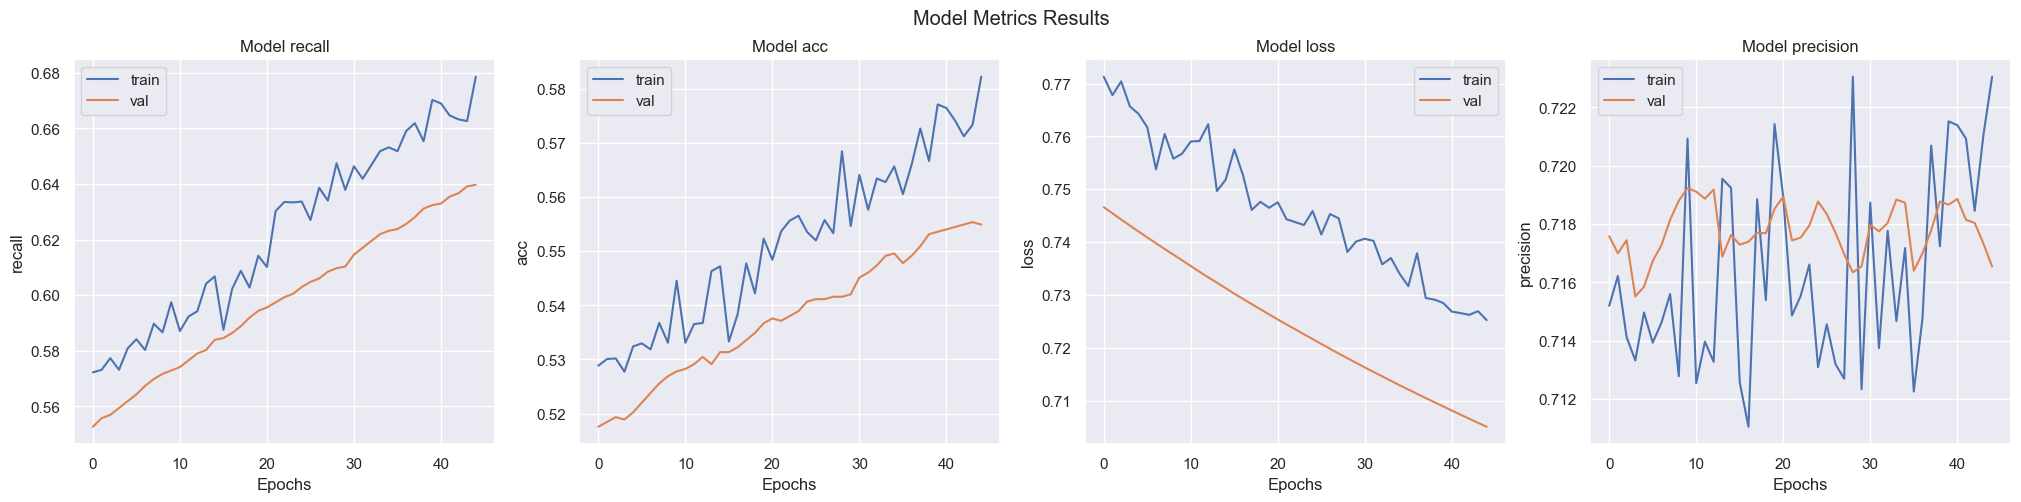

In [137]:
nn_eval_metrics(gs_nn_results )

In [138]:
#Printing out Test data classification report with scores 
print("Train Classification Report:\n", classification_report(y_train,gs_nn_train_pred))
print("Test Classification Report:\n", classification_report(y_test, gs_nn_test_pred))

Train Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.44      0.34      3148
           1       0.72      0.55      0.63      8096

    accuracy                           0.52     11244
   macro avg       0.50      0.50      0.48     11244
weighted avg       0.60      0.52      0.55     11244

Test Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.43      0.33      1049
           1       0.71      0.54      0.61      2700

    accuracy                           0.51      3749
   macro avg       0.49      0.48      0.47      3749
weighted avg       0.59      0.51      0.53      3749



Train Confusion Matrix:



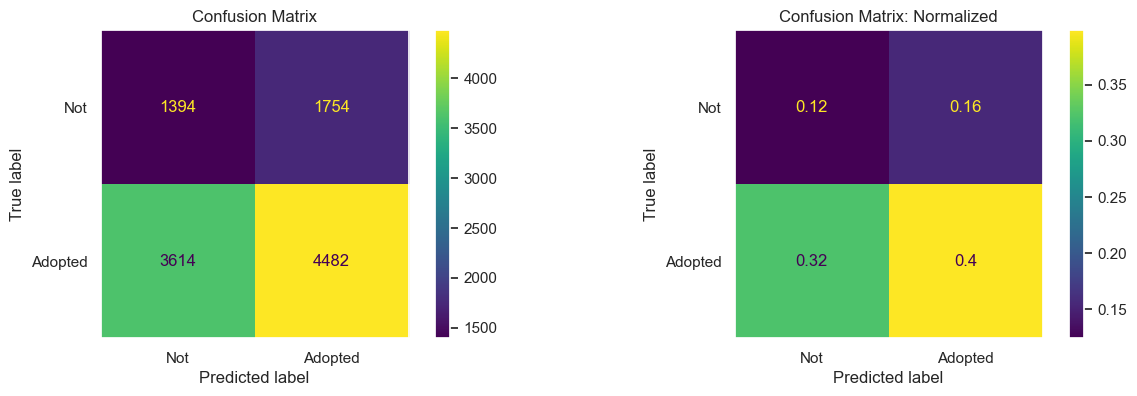

In [139]:
#Confusion Matrix
print("Train Confusion Matrix:\n")
conf_matrix(y_train,gs_nn_train_pred )

Test Confusion Matrix:



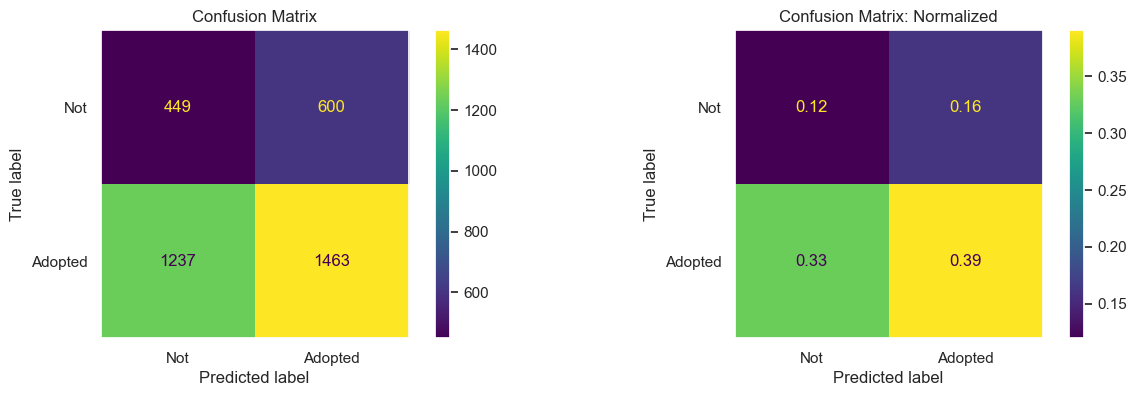

In [140]:
#Confusion Matrix
print("Test Confusion Matrix:\n")
conf_matrix(y_test,gs_nn_test_pred)

**Model Evaluation**
- They both have an average of ~16% FP rate from the Confusion Matrix. However the TP is low and the FN is high. 
- The precision score were about 71%. This is one of the lowest out of all the models
- This model has a lot of variation and a bit overfit.
- The baseline Neural Net performed better. There should be more hyperparameter tuning to get a better model. The tuning made the model worse.

## Best Estimator

The XGB Model with the hyperparamters tuned during gridsearch was the best model. This estimator beat the Random Forest model as the best due to the slightly better **F1 Score**, **True Positive and False Negative rate**.  

In [141]:
#Printing Metrics
calc_metrics(y_test,gs_xgb_test_pred)

The Precision mean score is: 0.81
The Recall mean score is: 0.78
The F1  score is: 0.8
The Accuracy mean score is: 0.71




(0.8122119815668203, 0.7833333333333333, 0.7975113122171946, 0.713523606295012)

In [142]:
#Chosen paramters
print(gs_xgb.best_params_)

{'sm__sampling_strategy': 'minority', 'xgb__gamma': 3, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 6, 'xgb__n_estimators': 120}


In [143]:
#Display Best Estimator
gs_xgb.best_estimator_

Pipeline(steps=[('ct', StandardScaler()),
                ('sm', SMOTE(random_state=42, sampling_strategy='minority')),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=3, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=120,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, ...))])

In [144]:
#Printing out Test data classification report with scores 
print("Test Classification Report:\n", classification_report(y_test, gs_xgb_test_pred))

Test Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.53      0.51      1049
           1       0.81      0.78      0.80      2700

    accuracy                           0.71      3749
   macro avg       0.65      0.66      0.65      3749
weighted avg       0.72      0.71      0.72      3749



Test Confusion Matrix:



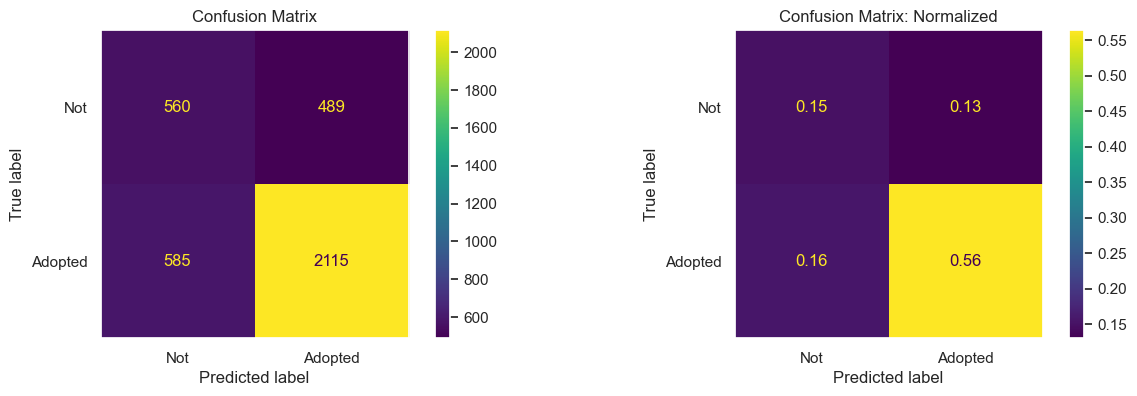

In [145]:
#Confusion Matrix
print("Test Confusion Matrix:\n")
conf_matrix(y_test,gs_xgb_test_pred)

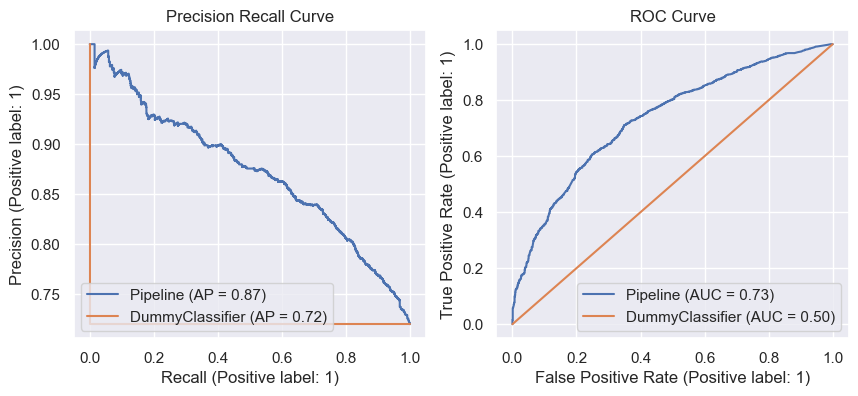

In [146]:
#Print Precision/Recall and AUC Curve
plot_curves(gs_xgb.best_estimator_,X_test,y_test)

## Feature Importance

<B> Feature Importance shows us what were the most impactful features in the data for the specific classifer.
Before the start of modeling the data was correlated (including the target value) and evaluated to see the most correlated features. The is notebook will just get to understand the most important features without further modeling. 

In [147]:
#Get the best features from the best  model
best_model = gs_xgb.best_estimator_
feat_importance = best_model.steps[2][1].feature_importances_

In [148]:
#Getting the current feature names
columns = X_train.columns

<B> Creating a sorted dataframe of the most important features  by name and importance level. Sorting the data allows for easier plotting.

In [149]:
#Creating a dataframe for feature importance
xgb_imp_features  = pd.DataFrame({"Features": columns,"Importance_Level": feat_importance}) #Dataframe creation
xgb_imp_features = xgb_imp_features.sort_values(by = "Importance_Level",axis = 0, ascending=False, ignore_index = True) #Sorting datafram
xgb_imp_features

Features  Importance_Level
0            Age          0.233659
1         Breed1          0.102191
2         Color1          0.089552
3       PhotoAmt          0.070355
4         Gender          0.069488
5      FurLength          0.064154
6       Quantity          0.064148
7   MaturitySize          0.052747
8           Type          0.049836
9          State          0.043807
10    Sterilized          0.033758
11        Breed2          0.020655
12        Health          0.020540
13    Vaccinated          0.017548
14           Fee          0.015769
15        Color2          0.014807
16      Dewormed          0.014274
17        Color3          0.012772
18      VideoAmt          0.009939

<B> Plotting the feature importance

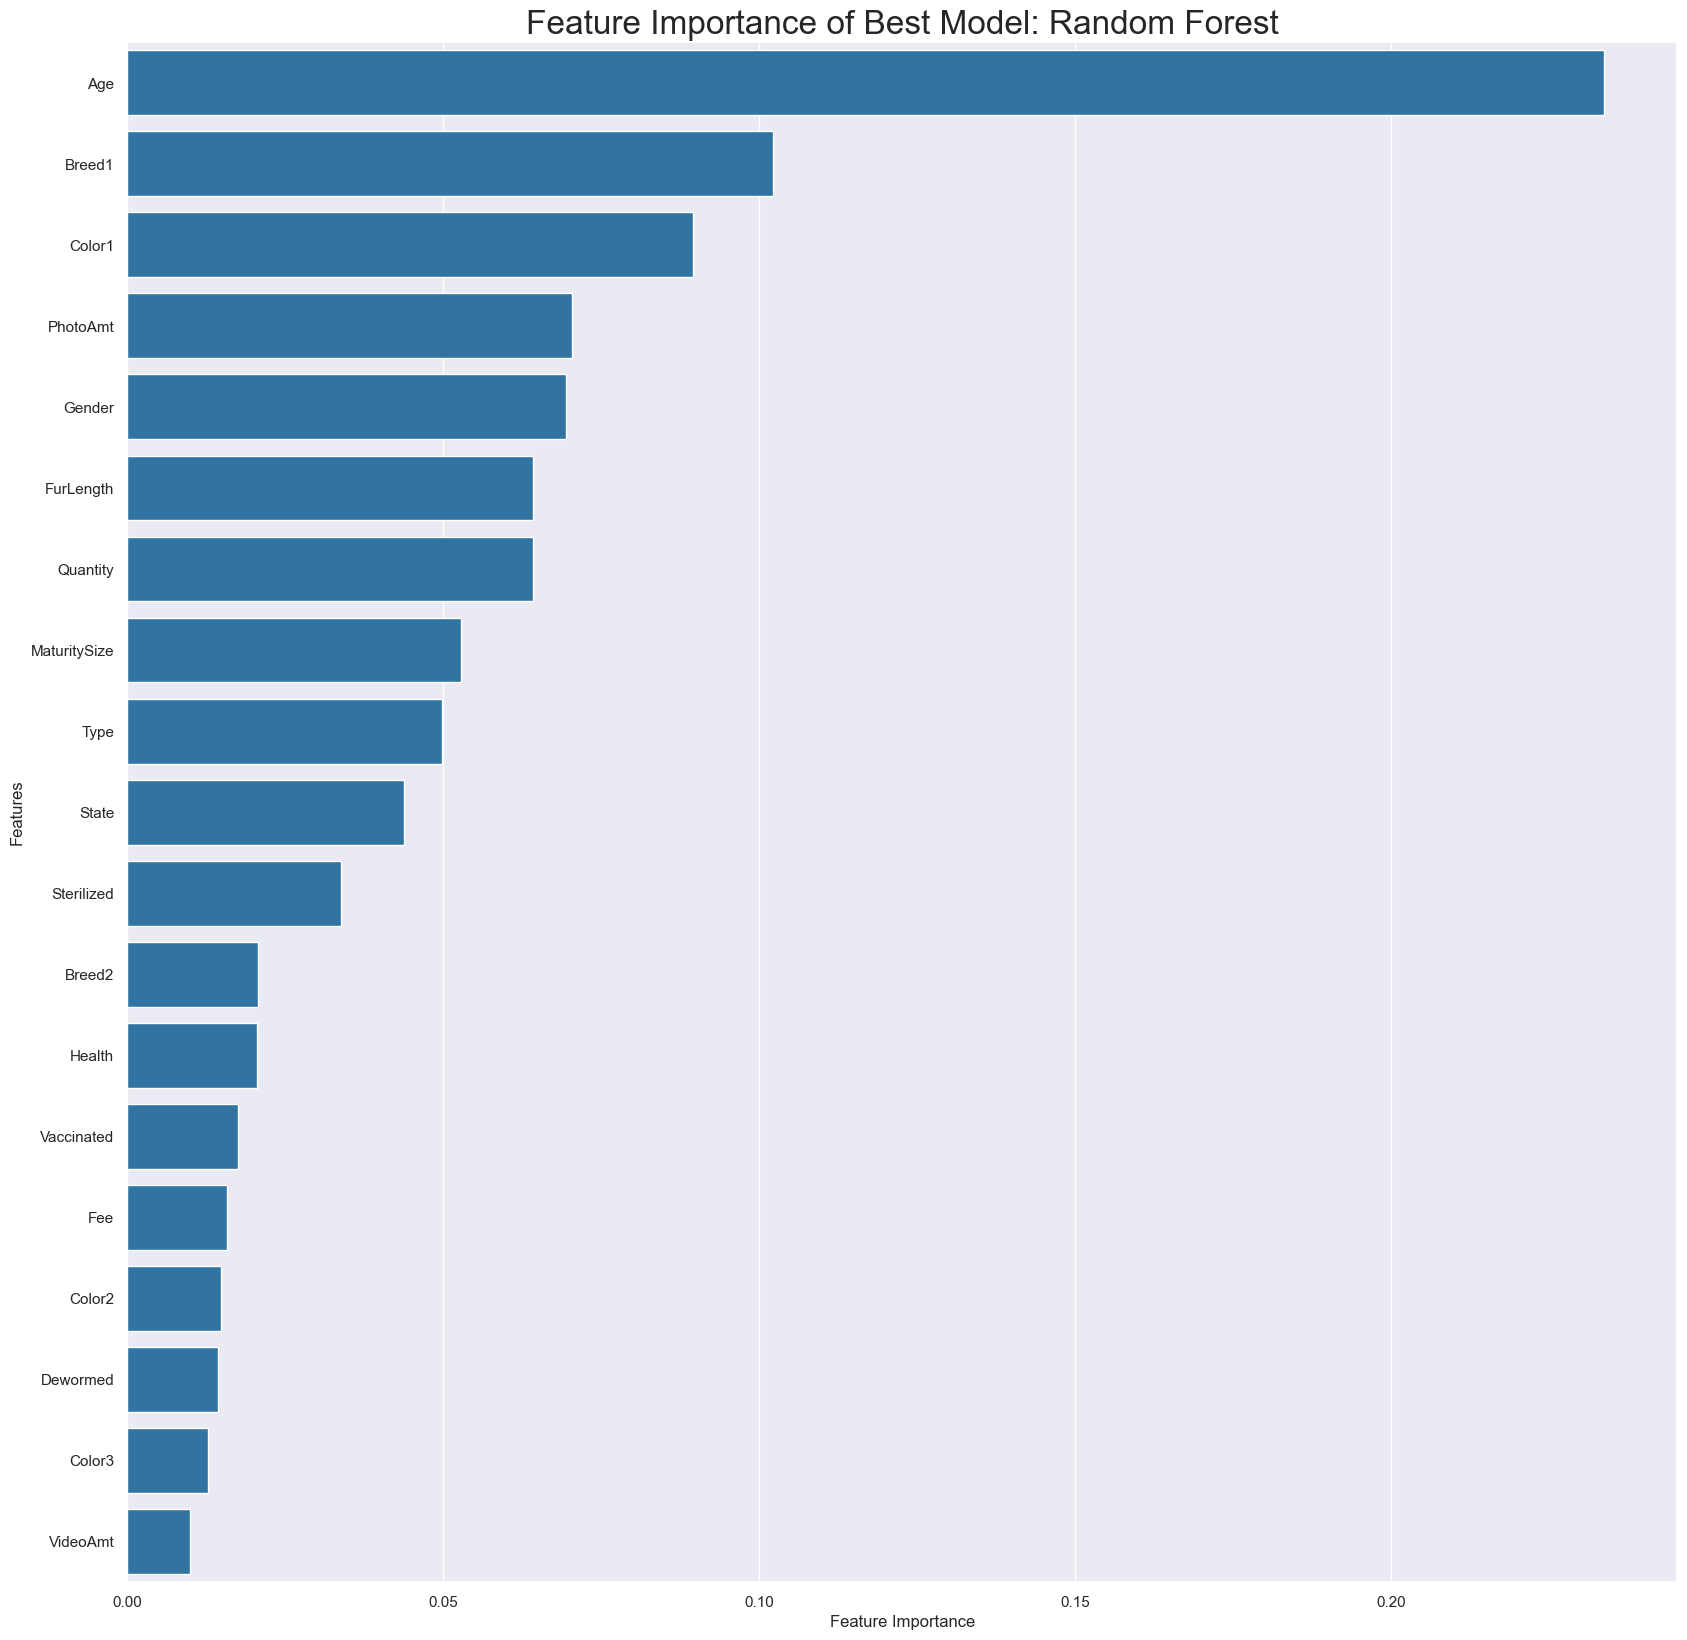

<Figure size 3000x2000 with 0 Axes>

In [150]:
#Plotting Importance from Best Model
sns.barplot(x = feat_importance, 
            y = columns, 
            data = xgb_imp_features,
            color = 'tab:blue',
            order=xgb_imp_features["Features"],
            orient = 'h')
sns.set(rc={'figure.figsize':(30,20)},font_scale= 2)
plt.title("Feature Importance of Best Model: Random Forest",)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()
plt.savefig("images/feat_imp.png")

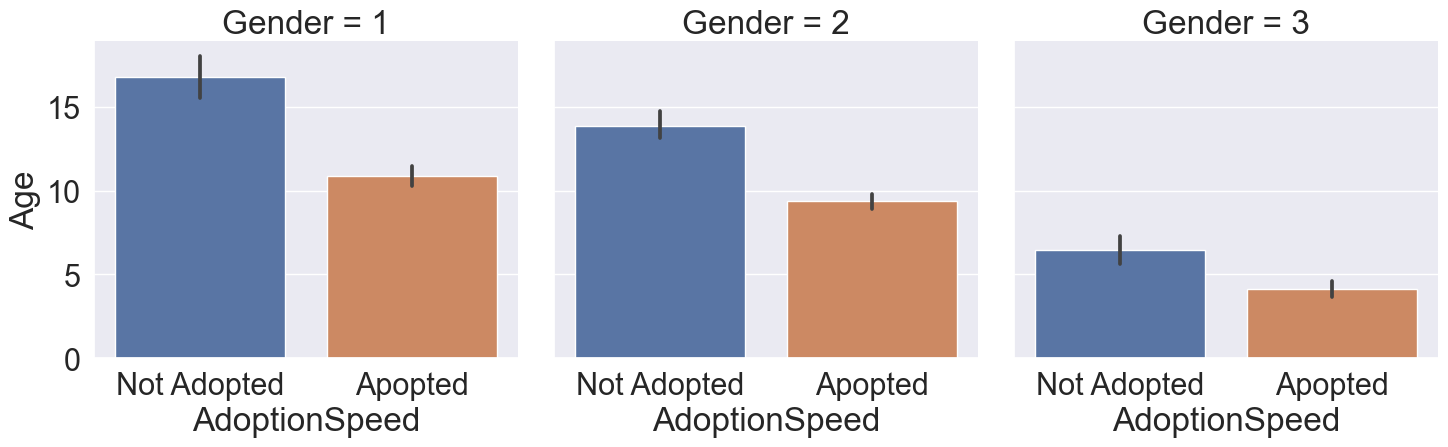

In [151]:
#Age, Type, Gender
ag = sns.catplot(data = main_df, y = "Age", x = "AdoptionSpeed", col = "Gender", kind = "bar")
ag.set_xticklabels(["Not Adopted","Apopted"])

<B> Choosing the top 5 features from the sorted feature importance list

In [152]:
#Top 5 Features
xgb_imp_features[0:5]

Features  Importance_Level
0       Age          0.233659
1    Breed1          0.102191
2    Color1          0.089552
3  PhotoAmt          0.070355
4    Gender          0.069488

- The top two features are the same as the results from the initial correlation
- PhotoAmt and Color were initial weakly correlated to the Adoption Speed
- The Breed would help understand the animal without the Type explicitly known
- Knowing the photoAmt may help us to know that animals with photos and possibly multiple may have an easier time being adopted

# Conclusion

### Reccomendations
- Use model with an experienced rescuer
- Prioritize adoption form attributes
    - The feature importance shows with are the driving factors to understand if a animal will be adopted
- Plan cost with ~16% margin
- Acquire photos of all rescues

### Limitations

- Deeper explantion of attributes
- Target Class imbalance
- Synthetic Data used
- HW Resources: Hyperparamter tuning resource intensive
- Time for more hypertuning
- Analysis on numerical tabular attributes only

### Future Next Steps
- Photo Analysis ( Image Classification)
- Textual Analysis (Natural Language Processing )
- Recommend specific attributes to rescue first